In [1]:
#Top 5 DP problems patterns
#https://www.youtube.com/watch?v=mBNrRy2_hVs

In [4]:
import os
os.getcwd()

'C:\\Users\\avi\\Practice_Folder\\LeetCode_DSA'

In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#### 

#### 

#### 

#### 

Memoization is an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again. (Source: wikipedia)

Back to our Fibonacci function F(n). We could use a hash table to keep track of the result of each F(n) with n as the key. The hash table serves as a cache that saves us from duplicate calculations. The memoization technique is a good example that demonstrates how one can reduce compute time in exchange for some additional space.

In [3]:
from functools import cache

@cache
def fib(n):
    if n==0:
        return 0
    if n==1:
        return 1
    
    mem[n] = fib(n-1)+fib(n-2)
    
    return(mem[n])

mem = {}


for i in range(10):
    print(fib(i)) 

0
1
1
2
3
5
8
13
21
34


When should I consider using DP?

Problems that should be solved with DP usually have two main characteristics:

1.The problem will be asking for an optimal value (max or min) of something or the number of ways to do something.
    What is the minimum cost of doing ...
    What is the maximum profit of ...
    How many ways are there to ...
    What is the longest possible ...

2. At each step, you need to make a "decision", and decisions affect future decisions.
    A decision could be picking between two elements
    Decisions affecting future decisions could be something like "if you take an element x, then you can't take an element y in the future"

Note on the first characteristic: not all problems that are in these formats are meant to be solved with DP, and not all DP problems are in one of those formats. However, for a general guideline, these characteristics hold up very well.

When we talked about trees, we said that each function call to dfs would return the answer to the original problem as if the state passed to the call was the input. With DP, it's the same. A call to dp(state) should return the answer to the original problem as if state was the input.


The following are common state variables that you should think about:

    An index along an input string, array, or number. This is the most common state variable and will be a state variable in almost all problems, and is frequently the only state variable. With Fibonacci, the "index" refers to the current Fibonacci number. If you are dealing with an array or string, then this variable will represent the array/string up to and including this index. For example, if you had nums = [0, 1, 2, 3, 4] and you had a state variable i = 2, then it would be like if nums = [0, 1, 2] was the input.
    A second index along an input string or array. Sometimes, you need another index variable to represent the right bound of the array. Again, if you had nums = [0, 1, 2, 3, 4] and two state variables along the input, let's say i = 1 and j = 3, then it would be like nums = [1, 2, 3] - we are only considering the input between and including i and j.
    Explicit numerical constraints given in the problem. This will usually be given in the input as k. For example, "you are allowed to remove k obstacles". This state variable would represent how many more obstacles we are allowed to remove.
    A boolean to describe a status. For example, "true if currently holding a package, false if not".
    
The number of state variables used is the dimensionality of an algorithm. For example, if an algorithm uses only one variable like i, then it is one dimensional. If a problem has multiple state variables, it is multi-dimensional. Some problems might require as many as five dimensions.



#### Min Cost Climbing Stairs

You are given an integer array cost where cost[i] is the cost of the ith step on a staircase. Once you pay the cost, you can either climb one or two steps. You can either start from the step with index 0, or the step with index 1. Return the minimum cost to reach the top of the floor (outside the array, not the last index of cost).

In [4]:
# The framework

# To create any DP algorithm, there are 3 main components



# 1. A function or data structure that will compute/contain the answer to the problem for any given state

# Since we're starting with top-down, we will be talking about a function here. This involves two parts. 
# First, we need to decide what the function is returning. Second, we need to decide on what arguments the function should take 
# (state variables).
# The problem is asking for the minimum cost to climb the stairs. 
# So, let's define a function dp(state) that returns the minimum cost to climb the stairs for a given state.
# What state variables do we need? The only relevant state variable would be an index along the input, let's call it i.

In [5]:
# A good way to think about state variables is to imagine if the problem was a real-life scenario. 
# What information do you need to 100% describe a scenario? We certainly need to know what step 
# we're on - that's where i comes in. What about the color of your socks? 
# Standing on the 5th step with green socks is technically a different state than standing on the 5th step with red socks,
# but it doesn't change the cost of the steps, or anything relevant.

# Therefore, let's have a function dp(i) that returns the minimum cost to climb the stairs up to the ith step - i.e. 
# if the input was the subarray from index 0 up to and including i.

In [6]:
# 2. A recurrence relation to transition between states
# A recurrence relation is an equation used to calculate states. With Fibonacci, the recurrence relation was 
# Fn=Fn−1+Fn−2

# In this problem, let's say we wanted to figure out the minimum cost of climbing to the 100th step.
# The problem states that at each step, we are allowed to take one or two steps. That means, to get to the 100th step, 
# we must have arrived from the 99th or 98th step. Therefore, the minimum cost of climbing to the 100th step is 
# either the minimum cost of getting to the 99th step + the cost of the 99th step, or the minimum cost of getting 
# to the 98th step + the cost of the 98th step.

# dp(100) = min(dp(99) + cost[99], dp(98) + cost[98])

In [7]:
# Because of how we defined dp in the previous step, dp(99) gives us the minimum cost of getting to the 
# 99th step, and dp(98) gives us the minimum cost of getting to the 98th step.

# Or more generally:

# dp(i) = min(dp(i - 1) + cost[i - 1], dp(i - 2) + cost[i - 2])

# Which is the recurrence relation of this problem. 
# Typically, finding the recurrence relation is the hardest part of constructing a DP algorithm. 
# This one is relatively straightforward, but we'll see later that recurrence relations can be much more complicated.

In [8]:
# 3. Base cases
# The recurrence relation is useless on its own. We still can't figure out dp(100) because we don't know dp(99) or dp(98). 
# If we try to find them, we have the same problem - how can we know dp(98) if we don't know dp(97) or dp(96)? 
# By itself, the recurrence relation will continue forever until dp(-infinity).

# We need base cases so that our function eventually returns actual values. 
# The problem states that we can start at steps 0 or 1. Therefore, the base cases are:

# dp(0) = dp(1) = 0

# With these base cases, we can find dp(2). With dp(2), we can find dp(3), 
# and so on until we have dp(98) and dp(99), then we can finally find dp(100).

In [9]:
#Top Down Approach
class Solution:
    def minCostClimbingStairs(self, cost) -> int:
        # 1. A function that returns the answer
        def dp(i):
            if i <= 1:
                # 3. Base cases
                return 0
            
            if i in memo:
                return memo[i]
            
            # 2. Recurrence relation
            memo[i] = min(dp(i - 1) + cost[i - 1], dp(i - 2) + cost[i - 2])
            return memo[i]
        
        memo = {}
        return dp(len(cost))
    


In [10]:
cost = [1,100,1,1,1,100,1,1,100,1]
Solution().minCostClimbingStairs(cost)

6

In [3]:
#Bottom Up approach using arrays
class Solution:
    def minCostClimbingStairs(self, cost) -> int:
        n = len(cost)
        # Step 2
        dp = [0] * (n + 1)
        
        # Step 3: Base cases are implicitly defined as they are 0

        # Step 4
        for i in range(2, n + 1):
            # Step 5
            dp[i] = min(dp[i - 1] + cost[i - 1], dp[i - 2] + cost[i - 2])
        
        # Step 6
        return dp[n]

#### House Robber

The second characteristic is usually what differentiates greedy and DP. The idea behind greedy is that local decisions do not affect other decisions. Let's say we had nums = [2,7,9,3,1], and we wanted to be greedy. Iterating along the array, the first decision is to take the 2 or the 7, since we can't have both. If we were greedy, we would take the 7. However, now we can no longer take the 9. In fact, the optimal answer involves taking 2, 9, 1. As you can see, being greedy in our decisions affected future decisions which lead us to the wrong answer.

In [5]:
# You are planning to rob houses along a street. The ith house has nums[i] money. 
# If you rob two houses beside each other, the alarm system will trigger and alert the police. 
# What is the most money you can rob without alerting the police?

In [6]:
cost = [2,7,9,3,1]
#Watch Video
# the idea with dynamic programming is we are only considering a part of the input at any given time.

# These are our base cases
# suppose if you only have input at i= 0, you will rob it
# if you have 2 inputs at i = 0 and i = 1, you will rob max 


# nums = [2,7,9,3,1]
#what will the function return? --> What input will it take? --> 
#What is recurrence relation? -->  max(dp(i-1), cost[i] + dp(i-2))
#What is the base case? --> defined above

# if i=0 return max(nums[0], nums[1]), if you do this, its greedy approach becoz if you select 7 you will
# have to take 3 later on and max sum you will reach is 10.
# if i = 0, 
# if i =1, 

In [7]:
# think of dp function --> input is just the current step, 

# recurrence relation --> top-down: 

# condition 1: you have a chance to rob last house only if you haven't robbed house before 
# condition 2: if not at the last house : you will rob this house , if the next house house has smaller value 
# and you haven't robbed the house next to this one

# base case --> if at the 0th index house you will rob if you haven't robbed house next to it



In [5]:
# Watch Video

def rob(cost) -> int:
        # 1. A function that returns the answer
        def dp(i):
            # 3. Base cases 
            
            if i == 0:
                              
                return cost[i]           
            
            if i==1:
                return(max(cost[:i+1]))
            
            if i in memo:
                return memo[i]              
            
            # 2. Recurrence relation            
            memo[i] = max(dp(i - 1), dp(i - 2) + cost[i])
            
            return memo[i]
        
        memo = {}
        return dp(len(cost)-1)

In [6]:
cost = [2,7,9,3,1]
rob(cost)

12

In [3]:
from functools import cache

class Solution:
    def rob(self, nums) -> int:
        @cache
        def dp(i):
            # Base cases
            if i == 0:
                return nums[0]
            if i == 1:
                return max(nums[0], nums[1])

            # Recurrence relation
            return max(dp(i - 1), dp(i - 2) + nums[i])

        return dp(len(nums) - 1)

In [7]:
Solution().rob(cost)

12

In [ ]:
#Bottom Up Approach
class Solution:
    def rob(self, nums: List[int]) -> int:
        # To avoid out of bounds error from setting base case
        if len(nums) == 1:
            return nums[0]
        
        n = len(nums)
        dp = [0] * n
        
        # Base cases
        dp[0] = nums[0]
        dp[1] = max(nums[0], nums[1])
        
        for i in range(2, n):
            # Recurrence relation
            dp[i] = max(dp[i - 1], dp[i - 2] + nums[i])
        
        return dp[n - 1]

In [8]:
Solution().rob(cost)

12

Improving the space complexity

Actually, we can do better than O(n) space. When we are at state i, we only care about the previous two states. To get to state 100, we needed to go through 2 - 99, but once we're actually at 100, we don't care about 2 - 97. In the bottom-up implementation, we can replace the array with two variables that just keep track of the previous two states. arr[0] becomes obsolete once we get to arr[3] etc.

In [10]:
class Solution:
    def rob(self, nums) -> int:
        # To avoid out of bounds error from setting base case
        if len(nums) == 1:
            return nums[0]
        
        n = len(nums)

        # Base cases
        back_two = nums[0]
        back_one = max(nums[0], nums[1])
        
        for i in range(2, n):
            # back_two becomes back_one, and back_one gets updated
            back_one, back_two = max(back_one, back_two + nums[i]), back_one

        return back_one

In [11]:
Solution().rob(cost)

12

#### Maximum Number of Events that can be attended

You are given an array of events where events[i] = [startDayi, endDayi]. Every event i starts at startDayi and ends at endDayi.

You can attend an event i at any day d where startTimei <= d <= endTimei. You can only attend one event at any time d.

Return the maximum number of events you can attend.

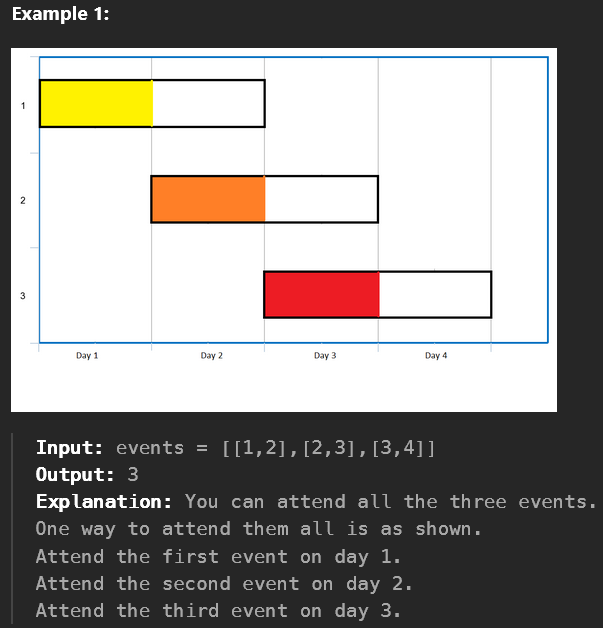
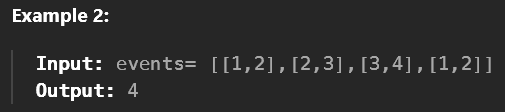

#### Hard: Longest Increasing Subsequence 

In [ ]:
# Example 2: 300. Longest Increasing Subsequence
# Given an integer array nums, return the length of the longest strictly increasing subsequence

In [1]:
# Example 1:

# Input: nums = [10,9,2,5,3,7,101,18]
# Output: 4
# Explanation: The longest increasing subsequence is [2,3,7,101], therefore the length is 4.

# Input: nums = [0,1,0,3,2,3]
# Output: 4

# Example 3:

# Input: nums = [7,7,7,7,7,7,7]
# Output: 1


How can we tell that this problem should be solved with DP? First, it asks for a maximum length. Second, whenever we decide to take an element as part of a subsequence, it changes the numbers that we can take in the future. If we have nums = [1, 2, 5, 3, 4] and iterate from left to right, how do we decide if we should take the 5 or not? If we take it, our length increases which is what we want, but then it stops us from taking the 3 and 4.

In [ ]:
#gave wrong answer, thought was that we compare each new element added with the previous recorded increasing sequence end point
#the problem is we are making one sequence sacrosanct and then deciding if we can build on it or not
#rather on inclusion of new element you keep moving back and check if with new element added you find decreasing elements and if
#count of such monotinc decreasing series is greater than previous max length

from functools import cache
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        @cache
        def dp(n):
            #base condition
            if n== 0: return (1, nums[n])
            
            if n==1:
                prev = nums[0]
                if prev <nums[n]:
                    return (2, nums[n])
                else: return (1, min(nums[:n+1]))
            
            prev_count , prev_large = dp(n-1)
            if prev_large <nums[n]:
                return(prev_count +1, nums[n])
            else: 
                return(prev_count, min(prev_large, nums[n]))
                
        ans, prev_large = dp(len(nums)-1) 
        return  ans


In [ ]:
# What will function return--> length of subsequence behind it, input variables--> ith value ?
# What is recurrence relation -->  
# What is the base case --> for i = 0, return 1, for i = 1, return 2, if arr[1]>arr[0]

In [5]:
def dp(i):
#     base cases
    if i==0: return 1
    if i==1:
        if nums[i] > nums[i-1]: return 2
        else : return 1
    
    mem[i] = dp(i-1) + (--(nums[i] > nums[i-1]))
    
    return(mem[i])

# nums = [10,9,2,5,3,7,101,18]
# nums = [7,7,7,7]
nums = [0,1,0,3,2,3]

mem = {}
ans = []
for i in range(len(nums)):
    ans.append(dp(i))


ans = sorted(ans, reverse= True)
ans[0]

4

In [3]:
# dict(sorted(mem.items(), key = lambda item: item[1], reverse = True))

In [15]:
#Also this is O(N^2) solution, this got TLE on HackerRank

from functools import cache
class Solution:
    def lengthOfLIS(self, nums) -> int:
        @cache
        def dp(i):#each time function returns with the current element included in sequence what's longest length
            ans = 1 # Base case

            # Recurrence relation
            for j in range(i):
                if nums[i] > nums[j]:
                    
                    ans = max(ans, dp(j) + 1)
            
            return ans

        return max([dp(i) for i in range(len(nums))])   

In [16]:
nums = [1, 3, 0, 2]

In [17]:
Solution().lengthOfLIS(nums),  nums

(2, [1, 3, 0, 2])

In [13]:
#This solution is wrong too as it just compares 2 elements at a time and increments the counter
from typing import List
from functools import cache
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        @cache
        def dp(n):
            #base condition
            if n==0:return 1
            
            if n==1:
                prev = nums[0]
                if prev < nums[n]:
                    return (2)
                else: return (1)
            
            prev_length = dp(n-1)
            
            count = 1
            check_element = nums[n]
            
            for j in range(n-1, -1, -1):
                if check_element > nums[j]: 
                    count+=1
                check_element = nums[j]
                
                

            
            return max(prev_length, count)
        
        ans = dp(len(nums)-1) 
        return  ans

# nums = [0,1,0,3,2,3] #Expected ans = 4
# nums = [7,7,7,7] #Expected ans = 1
# nums = [10,9,2,5,3,7,101,18] #Expected ans = 4
nums = [4,10,4,3,8,9] #Expected ans = 3, output for this is wrong its 4
Solution().lengthOfLIS(nums)

4

#### Solving Questions With Brainpower

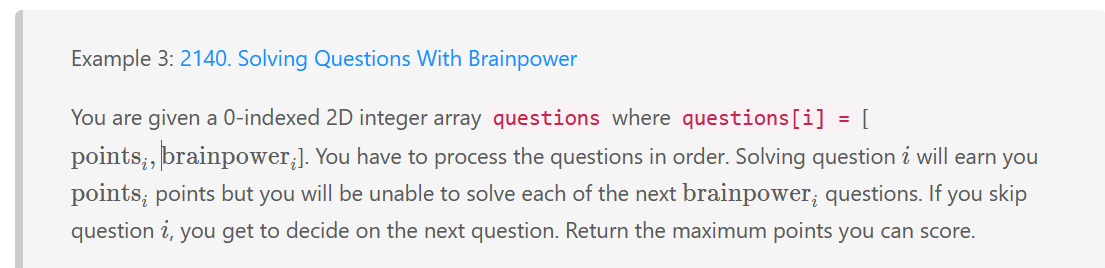

For example, given questions = [[3, 2], [4, 3], [4, 4], [2, 5]]:
        If question 0 is solved, you will earn 3 points but you will be unable to solve questions 1 and 2.
        If instead, question 0 is skipped and question 1 is solved, you will earn 4 points but you will be unable to solve questions 2 and 3.

Return the maximum points you can earn for the exam.

In [33]:
# Example 1:

# Input: questions = [[3,2],[4,3],[4,4],[2,5]]
# Output: 5
# Explanation: The maximum points can be earned by solving questions 0 and 3.
# - Solve question 0: Earn 3 points, will be unable to solve the next 2 questions
# - Unable to solve questions 1 and 2
# - Solve question 3: Earn 2 points
# Total points earned: 3 + 2 = 5. There is no other way to earn 5 or more points.


In [34]:
# Example 2:

# Input: questions = [[1,1],[2,2],[3,3],[4,4],[5,5]]
# Output: 7
# Explanation: The maximum points can be earned by solving questions 1 and 4.
# - Skip question 0
# - Solve question 1: Earn 2 points, will be unable to solve the next 2 questions
# - Unable to solve questions 2 and 3
# - Solve question 4: Earn 5 points
# Total points earned: 2 + 5 = 7. There is no other way to earn 7 or more points.


In [ ]:
# What should the function return ? What should be the input variable?
# What should be the recurrence relation?
# What are the base cases? 


How can we tell this problem should be solved with DP? First, it is asking for a maximum score. Second, at every question we need to make a decision: take or skip, and these decisions affect future decisions. If we decide to take a question, it prevents us from taking some future questions.

As you may expect by now, we can define a function dp that returns the maximum score we can achieve. What information do we need at each state (other than an index variable i to indicate the current question we are on)? We could include an integer that represents how many more questions we need to skip until we can start solving questions again, but similar to with house robber, we can encode this information in our recurrence relation, so we'll just stick with dp(i) returning the maximum score.

In [ ]:
# what will function return? what is its input? 
# what is recuurence relation? 
# what are base cases? i = 0, return 1, i = 1, either you take 1+1 steps of 2 steps together so 2 ways

#points, questions to skip
# questions = [[3, 2], [4, 3], [4, 4], [2, 5]]
# the idea with dynamic programming is we are only considering a part of the input at any given time.

# if you have just one input, ot makes sense to take the points.
# if you have 2 inputs, you can take max input if first input have a skip question >=1.
# now suppose inputs are 3, you can take this if previous input of skips allows you to take this one
# [3,2] doesn't allow you to take [4,4] and [4,3] also doesn't allow. so you take this if its max, else you 
# keep the max available from previous state. So should we run an iteration. 


In [3]:
from functools import cache
class Solution:
    def lengthOfLIS(self, nums) -> int:
        @cache
        def dp(i):
            ans = questions[0][0] # Base case

            # Recurrence relation
            for j in range(i):
                if (i-questions[j][1]) > 0:
                    ans = max(ans, dp(j) + questions[i][0])
                    
            
            return ans

        return max(dp(i) for i in range(len(nums)))   

In [4]:
#repeatedly been thinking on similar lines, but the given solution should be seen to get a different line of thought

questions = [[3, 2], [4, 3], [4, 4], [2, 5]]
questions = [[1,1],[2,2],[3,3],[4,4],[5,5]]
questions = [[12,46],[78,19],[63,15],[79,62],[13,10]]

ans = 0

@cache
def dp(i, ans):
    if i==0:
        ans = questions[0][0] # Base case
    if i==1:
        ans = max(questions[0][0],questions[1][0])  # Base case

    # Recurrence relation
    for j in range(i):
        if (i-j) > questions[j][1]:
            ans = max(ans, dp(j, ans) + questions[i][0])
            print(i,j, questions[j], ans)


    return ans

In [5]:
ans = 0
dp(len(questions)-1, ans)

0

In [6]:
#### very very neat soltion.


class Solution:
    def mostPoints(self, questions) -> int:
        @cache
        def dp(i):
            
            #if out of bounds we dont have more questions to solve
            if i >= len(questions):
                return 0
            
            #next question that can be solved if you consider current question is at j
            j = i + questions[i][1] + 1
            
            #if we decide to skip this question we move onto next
            return max(questions[i][0] + dp(j), dp(i + 1))
    
        return dp(0)
    
Solution().mostPoints(questions)

79

#### Longest Common Sequence

In [2]:
# Given two strings text1 and text2, return the length of their longest common subsequence. If there is no common subsequence, return 0.

# A subsequence of a string is a new string generated from the original string with some characters (can be none) deleted without changing the relative order of the remaining characters.

#     For example, "ace" is a subsequence of "abcde".

# A common subsequence of two strings is a subsequence that is common to both strings.

 

# Example 1:

# Input: text1 = "abcde", text2 = "ace" 
# Output: 3  
# Explanation: The longest common subsequence is "ace" and its length is 3.

# Example 2:

# Input: text1 = "abc", text2 = "abc"
# Output: 3
# Explanation: The longest common subsequence is "abc" and its length is 3.

# Example 3:

# Input: text1 = "abc", text2 = "def"
# Output: 0
# Explanation: There is no such common subsequence, so the result is 0.


In [17]:
from functools import cache
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        @cache
        def dp(i, j):
            if i == len(text1) or j == len(text2):
                return 0
            
            if text1[i] == text2[j]:
                return 1 + dp(i + 1, j + 1)
            
            return max(dp(i + 1, j), dp(i, j + 1))
        
        return dp(0, 0)

        

In [31]:
#NeetCode Solution : https://www.youtube.com/watch?v=Ua0GhsJSlWM
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        dp = [[0 for j in range(len(text2)+1)] for i in range(len(text1)+1)]
        
        for i in range(len(text1)-1, -1, -1):
            for j in range(len(text2)-1, -1, -1):
                
                if text1[i]==text2[j]:
                    dp[i][j]= 1 + dp[i+1][j+1]
                else:
                    dp[i][j]= max(dp[i+1][j], dp[i][j+1])
        
        return dp[0][0]
Solution().longestCommonSubsequence(text1 = "abcde", text2 = "ace" )            
        

3

In [30]:
text1 = "abcde"
text2 = "ace"
dp = [[0 for j in range(len(text2)+1)] for i in range(len(text1)+1)]
        
for i in range(len(text1)-1, -1, -1):
    for j in range(len(text2)-1, -1, -1):

        if text1[i]==text2[j]:
            
            dp[i][j]= 1 + dp[i+1][j+1]
        else:
            dp[i][j]= max(dp[i+1][j], dp[i][j+1])
dp[0][0]

3

#### Climbing Stairs

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

1 <= n <= 45

In [29]:
# Example 1:
# Input: n = 2
# Output: 2
# Explanation: There are two ways to climb to the top.
# 1. 1 step + 1 step
# 2. 2 steps

# Example 2:
# Input: n = 3
# Output: 3
# Explanation: There are three ways to climb to the top.
# 1. 1 step + 1 step + 1 step
# 2. 1 step + 2 steps
# 3. 2 steps + 1 step

In [30]:
# No of distinct ways to climb to the top
# base case: 
# if n = 1, return 1
# if n = 2, return 2

# recurrence relation, to reach the nth step , either you will reach from n-2 step or n-1 step. 
# from n-2 to n you can reach in 2 ways
# from n-1 to nth step you will reach in 1 way

# recurrence relation = dp(n-2) + 2
    

In [31]:

def climbstairs(n):
    if n == 1: return 1
    if n == 2: return 2
    
    
    mem[n] = climbstairs(n-2)+2 
    return mem[n]

mem = {}
climbstairs(3)

3

In [ ]:
One can reach ith step in one of the two ways:

    Taking a single step from (i−1)th step.

    Taking a step of 2 from (i−2)th step.

So, the total number of ways to reach ith is equal to sum of ways of reaching (i−1)th step and ways of reaching (i−2)th step.

Let dp[i] denotes the number of ways to reach on ith step:

dp[i] = dp[i−1] + dp[i−2]

In [ ]:
if n = 2, you can take 2 steps or 1+1 step. so 2 ways
if n=3, if you are at step 1, you can either take 2 steps to reach 3, or 1+1 step to reach 3 , so the combination is 
1+1+1, 1+2, what about 2+1 ?
if n = 4, from step 2 you can take 2 steps or 1+1 step so these are 2 ways , plus to reach step 2 you can do it in 2 ways, 
also you can first reach 3 and take 1 step. but there is some overlap.
so total 5--> 1+1+1+1, 1+1+2, 2+1+1, 2+2, 1+2+1
th last step above is part of reaching the 3rd step and taking another 1 step.




In [38]:

def climbstairs(n):
    if n == 1: return 1
    if n == 2: return 2
    
    #both are exclusive outcomes so even if overlap happens , its fine since number of ways
    #to achieve different outcomes is different, even if pattern of steps taken overlap
    
    mem[n] = climbstairs(n-2)+climbstairs(n-1)
    return mem[n]

mem = {}
climbstairs(5)

8

In [ ]:
import math
class Solution:
    
    def climbStairs(self, n: int) -> int:
        
#         count, count_2 = 0, int(n/2)
#         if(n<2):return(1)
        
#         else:
#             for i in range(1,count_2+1,1):
#                  count_1 = n-(i)*2
#                  count = count+math.factorial(count_1 + i)/(math.factorial(i)*math.factorial(count_1))
#             return(int(count+1))

        
        def dp(n):
            if n == 1: return 1
            if n == 2: return 2

            if n in mem:
                    return mem[n]
            #both are exclusive outcomes so even if overlap happens , its fine since number of ways
            #to achieve different outcomes is different, even if pattern of steps taken overlap
            
            mem[n] = dp(n-2) + dp(n-1) 
            
            return mem[n]
        
        mem = {}
        return(dp(n))

#### Coin Change

You are given an integer array coins representing coins of different denominations and an integer amount representing a total amount of money.

Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

You may assume that you have an infinite number of each kind of coin.

In [39]:
# Input: coins = [1,2,5], amount = 11
# Output: 3
# Explanation: 11 = 5 + 5 + 1

# Input: coins = [2], amount = 3
# Output: -1

# Input: coins = [1], amount = 0
# Output: 0



In [ ]:
# What will dp function return ? ---> coin count incremented value
# and what will be its input state ?---> current amount 
# A recurrence relation to transition between states ? 
# current_count + dp[current_amount-max(coin value less than current amount)]
# base cases ? amount<= 0, return 0

#Trying if we keep reducing the amount by max coin value <=amount
# the above method worked for few sample inputs but failed for 
# coins = sorted([186,419,83,408]), amount = 6249


In [6]:
import bisect
count=0
coins = sorted([1, 2, 5])
curr_amt = 11

# coins = sorted([1])
# curr_amt = 0

# coins = sorted([2])
# curr_amt = 3

coins = sorted([186,419,83,408])
curr_amt = amount = 6249

class Solution:
    def coinChange(self, coins, amount) -> int:
        count = 0
        mem = []
        coins = sorted(coins)

        def dp(curr_amt, count):
            if curr_amt == 0 : 
                return 0    
            if curr_amt <0 : 
                mem.append(-1) 
                return -1
#             print(count, curr_amt, coins[bisect.bisect_right(coins,curr_amt)-1])
            count += 1
            curr_amt = curr_amt - coins[bisect.bisect_right(coins,curr_amt)-1]
            mem.append(count)
            
            dp(curr_amt, count)
            
            return
        dp(amount, count)
        if len(mem)==0:
            return 0
        else: return(mem[-1])
        
Solution().coinChange(coins, curr_amt)

-1

In [53]:
# coins = sorted([186,419,83,408])
# curr_amt = 82
# coins[bisect.bisect_right(coins,curr_amt)-1], coins

In [59]:
# dp(11,0)---11-5=6 & count=1,6-5=1 & count=2, 1-1=0,  

In [60]:
dp(6, 1)  

(2, 1)

In [61]:
dp(1,2) 

(3, 0)

In [62]:
dp(0,3) 

In [7]:
[2,5][bisect.bisect_right([2,5],1)]

2

In [68]:
bisect.bisect_right([2,5],1)

0

In [ ]:

# Input: coins = [1,2,5], amount = 11
# Output: 3
# Explanation: 11 = 5 + 5 + 1

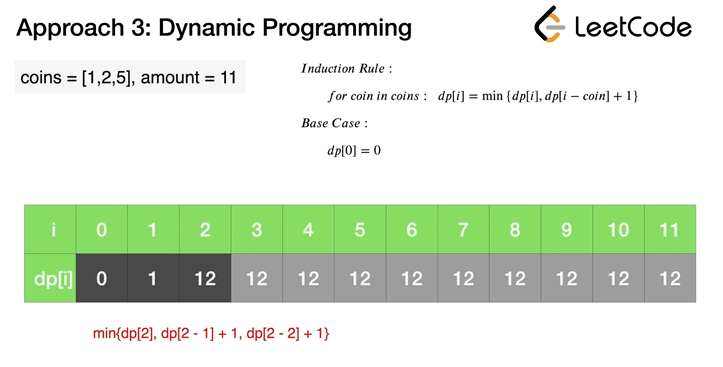

<!-- #See Video in the editorial section of problem -->
We note that this problem has an optimal substructure property, which is the key piece in solving any Dynamic Programming problems. In other words, the optimal solution can be constructed from optimal solutions of its subproblems.
How to split the problem into subproblems? Let's assume that we know F(S) where some change val1​,val2​,… for S which is optimal and the last coin's denomination is C.
Then the following equation should be true because of optimal substructure of the problem:

F(S)=F(S−C)+1

But we don't know which is the denomination of the last coin C. We compute F(S−ci​) for each possible denomination c0​,c1​,c2​…cn−1​ and choose the minimum among them. The following recurrence relation holds:

F(S)=mini=0...n−1​F(S−ci​)+1subject to  S−ci​≥0

In [11]:
class Solution:
    def coinChange(self, coins, amount: int) -> int:

        @cache
        def dfs(rem):
            if rem < 0:
                return -1
            if rem == 0:
                return 0
            
            min_cost = float('inf')
            
            for coin in coins:
                res = dfs(rem - coin)

                if res != -1:                    
                    
                    min_cost = min(min_cost, res + 1)
                  
                    
            return min_cost if min_cost != float('inf') else -1

        return dfs(amount)

In [17]:
coins = [2,5]
amount = 6
Solution().coinChange(coins, amount)

3

In [5]:
#### Bottom Up Approach

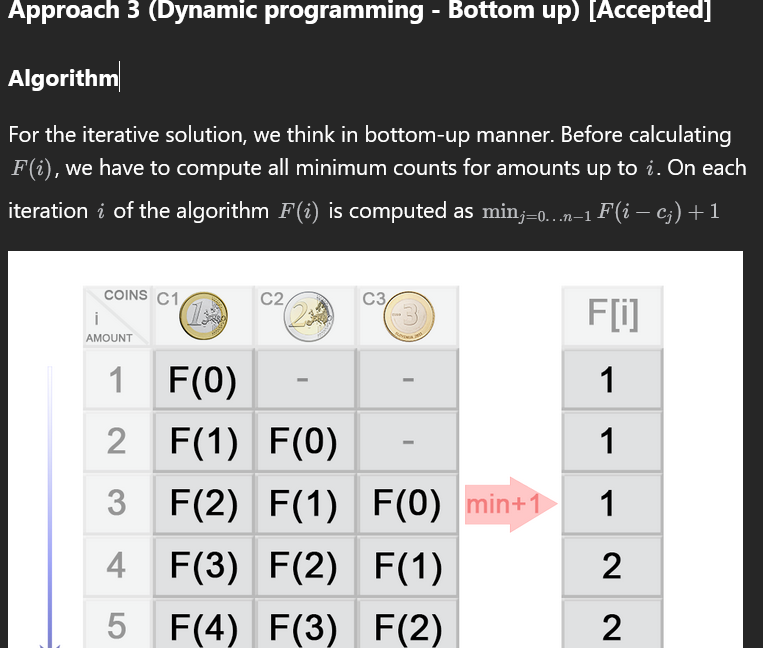

In [11]:
from typing import List
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [float('inf')] * (amount + 1)
        dp[0] = 0
        
        for coin in coins:
            for x in range(coin, amount + 1):
                dp[x] = min(dp[x], dp[x - coin] + 1)
                print(dp)
        return dp[amount] if dp[amount] != float('inf') else -1
    
Solution().coinChange([1,2,5], 11)

[0, 1, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[0, 1, 2, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[0, 1, 2, 3, inf, inf, inf, inf, inf, inf, inf, inf]
[0, 1, 2, 3, 4, inf, inf, inf, inf, inf, inf, inf]
[0, 1, 2, 3, 4, 5, inf, inf, inf, inf, inf, inf]
[0, 1, 2, 3, 4, 5, 6, inf, inf, inf, inf, inf]
[0, 1, 2, 3, 4, 5, 6, 7, inf, inf, inf, inf]
[0, 1, 2, 3, 4, 5, 6, 7, 8, inf, inf, inf]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, inf, inf]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, inf]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 1, 2, 2, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 1, 2, 2, 3, 6, 7, 8, 9, 10, 11]
[0, 1, 1, 2, 2, 3, 3, 7, 8, 9, 10, 11]
[0, 1, 1, 2, 2, 3, 3, 4, 8, 9, 10, 11]
[0, 1, 1, 2, 2, 3, 3, 4, 4, 9, 10, 11]
[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 10, 11]
[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 11]
[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6]
[0, 1, 1, 2, 2, 1, 3, 4, 4, 5, 5, 6]
[0, 1, 1, 2, 2, 1, 2, 4, 4, 5, 5, 6]
[0, 1, 1, 2, 2, 1, 

3

In [3]:
# Backtracking got TLE

class Solution:
    def coinChange(self, coins, amount: int) -> int:

        target = amount
        coins.sort()
        
        def backtrack(path, start, curr):
            if curr == target:
                ans.append(path[:])
                return

            for i in range(start, len(coins)):
                coin = coins[i]
                if curr + coin <= target:
                    path.append(coin)
                    backtrack(path, i, curr + coin)
                    path.pop()     
        
        ans = []
        backtrack([], 0, 0)
        ans = [len(i) for i in ans]
        if(len(ans))==0:
            return -1
        
        return min(ans)
coins, amount  = [1, 2, 5], 11
Solution().coinChange(coins, amount)

3

In [10]:
#both this and the next problem can be solved using Bottom Up DP Solution
from typing import List
#O(N) memor complexity Solution but same time complexity solution O(n*m)
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        
        cache = [np.inf]*(amount + 1)
        cache[0]=0
        
        for coin in coins:
            for index in range(amount+1):
                if index-coin>=0:
                    cache[index] = min(1+cache[index-coin], cache[index])

        return cache[amount] if cache[amount]!=np.inf else -1

Solution().change(7, [1, 3, 4,5])



2

In [11]:
#Next Problem --> Coin Change 2
from typing import List
#O(N) memor complexity Solution but same time complexity solution O(n*m)
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        cache = [0]*(amount + 1)
        cache[0]=1
        for coin in coins:
            for index in range(amount+1):
                if index-coin>=0:
                    cache[index] += cache[index-coin]

        return cache[amount]

Solution().change(7, [1, 3, 4,5])

6

##### Variation - Coin Change 2

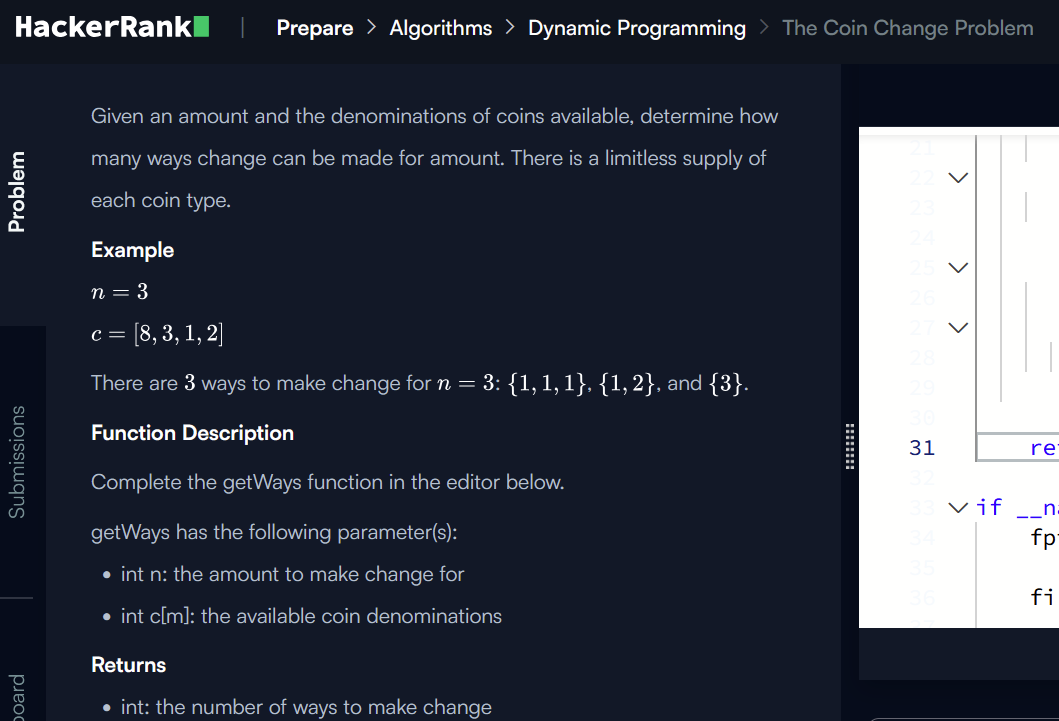

In [ ]:
# how can you break this problem into sub problems?
# suppose we are having target of 11: now if we are at F(S) = F(S-c)+1 where F(S-c) is number of ways we can arrive at sum (S-c)
# base case, amount = 0, return 0
# amount = 1, F(1-1)+1 

In [12]:
from functools import cache
class Solution:
    def coinChange_var(self, coins, amount: int) -> int:

        @cache
        def dfs(rem):
            
            if rem < 0:
                return -1
            if rem == 0:
                return 0       
            
            
            min_cost = 0
            
            for coin in coins:
                res = dfs(rem - coin)                
                
                
                if (res != -1) & ((rem - coin) > 1):
                    min_cost = max(min_cost, min_cost + res)
#                     print(res)
                
                if ((rem - coin)==0) & (coin>1) & (rem%coin==0):
                    min_cost = min_cost+1
                
                if ((rem-coin)==0) & (coin==1):
                    min_cost = res+1
#                     print(res+1)
                                       
                
            return min_cost 
        
        return dfs(amount)

In [14]:
coins, amount = [1,2, 5], 11
Solution().coinChange_var(coins, amount)

90

In [ ]:
# how can you break this problem into sub problems?
# suppose we are having target of 5: now if we are at F(S) = F(S-c)+1 where F(S-c) is number of ways we can arrive at sum (S-c)
# base case, amount = 0, return 0
# amount = 1, F(1-1)+1 
# Assume coins are [1,2]
1 = 1*1
2 = 1*2, 2*1
3 = 1*3, 2*1+1*1
4 = 1*4, 2*2, 2*1+1*2
5 = 1*5, 2*2+1, 2*1+1*3
6 = 1*6, 2*3, 2*2+1*2, 2*1+1*4
7 = 1*7, 2*3+1, 2*2+1*3, 2*1+1*5 

In [27]:
coins, amount = [8,3,1,2], 3

Solution().coinChange_var(coins, amount)+1




4

In [11]:
#Got TLE in the last case on leetcode, but got accepted on HackerRank
from typing import List
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        #coins.sort()
        @cache
        def backtrack(start, curr):
            ans = 0
            
            if curr == amount:               
                return 1

            for i in range(start, len(coins)):
                coin = coins[i]
                if curr + coin <= amount:
                    
                    ans += backtrack(i, curr + coin)
                     
            return ans

In [12]:
#Recursive Solution : O(N*m)
    

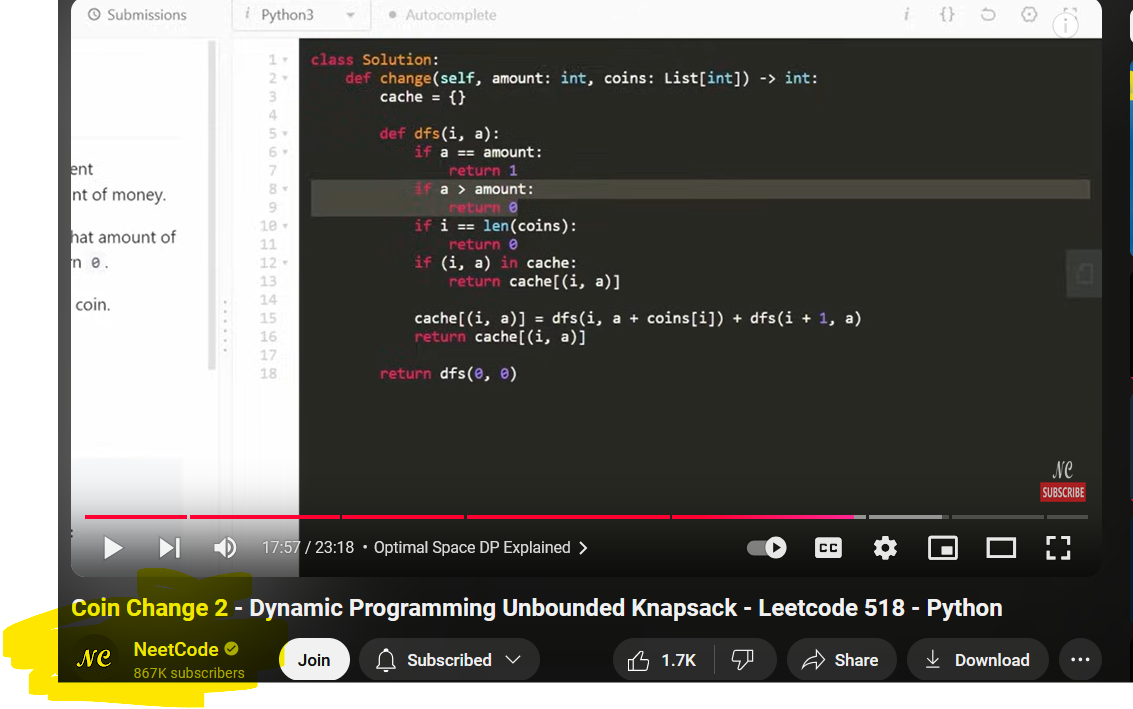

In [ ]:
#Take the DP Solution in second part of snip below for time complexity of O(N)

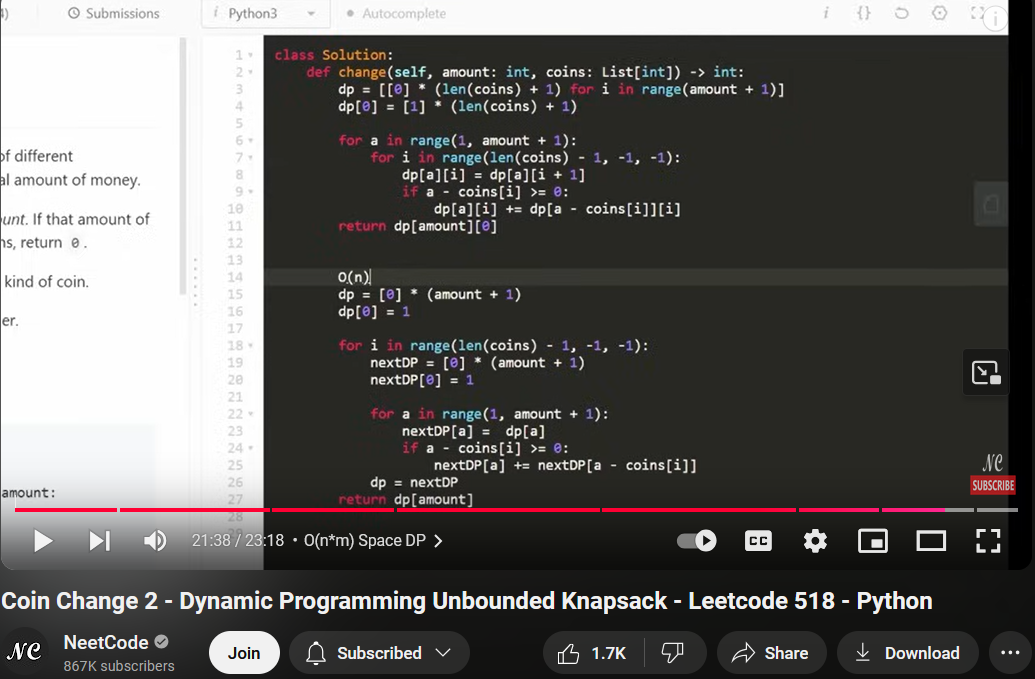

In [13]:
from typing import List
#O(N) memor complexity Solution but same time complexity solution O(n*m)
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        cache = [0]*(amount + 1)
        cache[0]=1
        for coin in coins:
            for index in range(amount+1):
                if index-coin>=0:
                    cache[index] += cache[index-coin]

        return cache[amount]

##### Partition Equal Subset Sum

Given an integer array nums, return true if you can partition the array into two subsets such that the sum of the elements in both subsets is equal or false otherwise.

In [1]:
# Example 1:

# Input: nums = [1,5,11,5]
# Output: true
# Explanation: The array can be partitioned as [1, 5, 5] and [11].

# Example 2:

# Input: nums = [1,2,3,5]
# Output: false
# Explanation: The array cannot be partitioned into equal sum subsets.

In [2]:
#https://leetcode.com/problems/partition-equal-subset-sum/submissions/1389650781/ 

In [6]:
# -----------------------------------> for this tried using backtracking TLE

In [7]:
nums = [1,5,11,5]

from functools import cache 
class Solution:
    def canPartition(self, nums):
        
        target_sum = sum(nums)
        if target_sum%2 !=0:
            return False
        
        else:            
            target_sum = target_sum/2            
            
            def backtrack(curr, i):
                
                if i > len(nums):
                    return
                if sum(curr)==target_sum:
                    # res = True
                    ans.append(curr[:])                        
                
                for j in range(i, len(nums)):
                    if len(ans)>0:
                        break
                        
                    curr.append(nums[j])
                    backtrack(curr, j+1)
                    curr.pop()

            
            ans = []   
            backtrack([], 0)
        
        return len(ans)>0

In [8]:
Solution().canPartition(nums)

True

#### Hard: Candy

There are n children standing in a line. Each child is assigned a rating value given in the integer array ratings.

You are giving candies to these children subjected to the following requirements:

    Each child must have at least one candy.
    Children with a higher rating get more candies than their neighbors.

Return the minimum number of candies you need to have to distribute the candies to the children.

In [3]:
# Example 1:

# Input: ratings = [1,0,2]
# Output: 5
# Explanation: You can allocate to the first, second and third child with 2, 1, 2 candies respectively.

# Example 2:

# Input: ratings = [1,2,2]
# Output: 4
# Explanation: You can allocate to the first, second and third child with 1, 2, 1 candies respectively.
# The third child gets 1 candy because it satisfies the above two conditions.



In [ ]:
# What should function return --> candy for the ith child, What should be input : index
# What is the recurrence relation --> 
# What is the base case --> if ratings[0]> ratings[1]: 2, else 1


In [23]:
ratings = [1,2,2]
# ratings = [1,0,2]
# ratings = [1,3,2,2,1]
ratings = [29,51,87,87,72,12]

mem = {}

def dp(i):
    #base case
    if i == 0:
        if ratings[i] > ratings[i+1]: return 2
        else: return 1
    
    
    prev = dp(i-1) 
    
    
    if ratings[i] > ratings[i-1]: 
        mem[i] = prev + 1
    
    elif ratings[i] == ratings[i-1]:
        if prev > 1:
            mem[i] = prev -1
        else : mem[i] = 1
    
    else:
        if prev > 1:
            mem[i] = prev - 1
        else:            
                    
            mem[i-1] += 1
            mem[i] = 1
            
    
    return mem[i]

total_candies = 0 
for i in range(len(ratings)):
    mem[i] = dp(i)
for i, j in mem.items():
    total_candies += j
mem   , total_candies 

({0: 1, 1: 2, 2: 3, 3: 2, 4: 2, 5: 1}, 11)

In [26]:
[29,51,87,87,72,12] = [1, 2, 3, 2, 2, 1]

In [27]:
total_candies = 0 
for i, j in mem.items():
    total_candies += j
    print (j, total_candies)

1 1
2 3
3 6
2 8
2 10
1 11


In [21]:
def dp(i):
    #base case
    if i == 0:
        if ratings[i] > ratings[i+1]: return 2
        else: return 1
    
    prev = dp(i-1)
    if ratings[i] > ratings[i-1]: 
        mem[i] = prev + 1
    
    elif ratings[i] == ratings[i-1]:
        if prev > 1:
            mem[i] = prev -1
        else : mem[i] = 1
    
    else:
        if prev > 1:
            mem[i] = prev - 1
        else:            
            mem[i-1] += 1
            mem[i] = 1
            
            for j in range(i-2, -1, -1):
                if (ratings[j] > ratings[j+1]) :
                    mem[j] = mem[j+1]+1  
#                 if (ratings[j] <= ratings[j+1]) & (mem[j]<=mem[j+1]):
                else:
                    break
                
    return(mem[i])



total_candies = 0
for i in range(len(ratings)):
    mem[i] = dp(i)
for i, j in mem.items():
    total_candies += j    
mem, total_candies    

({0: 1, 1: 2, 2: 3, 3: 3, 4: 2, 5: 1}, 12)

In [ ]:
[29,51,52,87,87,72,12, 11] = [1, 2, 3, 4, 3, 2, 1, 0] = [1, 2, 3, 4, 3, 3, 2, 1] 


[1,2,87,87,87,2,1] = [1, 2, 3, 2, 1, 1,1, 1] = [1, 2, 3, 2, 1, 1, 1, 1]

In [1]:
#Non DP Solution

def candy( r) -> int:
        ans = [1] * len(r)
        for i in range(1, len(r)):
            if r[i] > r[i-1]:
                ans[i] = ans[i-1]+1
        for j in range(len(r)-2, -1, -1):
            if r[j] > r[j+1]:
                ans[j] = max(ans[j], ans[j+1]+1)
        return sum(ans)

#### Matrix DP

##### Unique Paths

There is a robot on an m x n grid. The robot is initially located at the top-left corner and wants to move to the bottom-right corner. The robot can only move either down or right. Given m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

In [1]:
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        @cache
        def dp(row, col):
            if row + col == 0:
                return 1 # Base case
            ways = 0
            if row > 0:
                ways += dp(row - 1, col) #number of ways to reach at top of (row, col)
            if col > 0:
                ways += dp(row, col - 1) #number of ways to reach at left of (row, col)
            
            return ways
        
        return dp(m - 1, n - 1)


In [ ]:
#Bottom Up Approach
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        dp = [[0] * n for _ in range(m)]
        dp[0][0] = 1 #base case
        
        for row in range(m):
            for col in range(n):
                if row > 0:
                    dp[row][col] += dp[row - 1][col]
                if col > 0:
                    dp[row][col] += dp[row][col - 1]

        return dp[m - 1][n - 1]


In [2]:
#Optimized Bottom Up
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        dp = [0] * n
        dp[0] = 1
        
        for _ in range(m):
            next_row = [0] * n
            for col in range(n):
                next_row[col] += dp[col] #number of ways to reach at top of row, col
                if col > 0: 
                    next_row[col] += next_row[col - 1] #number of ways to reach at left of row, col
                
            dp = next_row

        return dp[n - 1]

##### Minimum Path Sum

Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right, which minimizes the sum of all numbers along its path. Return this sum. You can only move down or right.

In [ ]:
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:
        @cache
        def dp(row, col):
            
            if row + col == 0:
                return grid[0][0] # Base case
            
            cost = 0
            #we could either come from left or up if row, col are not at the edges
            if((row>0)&(col>0)):
                cost = min(grid[row][col] + dp(row - 1, col), grid[row][col] + dp(row, col - 1))
                
            
            #we could only come from left if we are at the top row (non starting point)
            elif((col > 0)&(row==0)):
                cost = grid[row][col] + dp(row , col-1)
                           
            
            #we could only come from top if we are at the left most col (non starting point)
            else:
                cost = grid[row][col] + dp(row-1, col)
                
            return cost
            
            

        m = len(grid) # number of rows
        n = len(grid[0]) # number of column

        return dp(m - 1, n - 1)

In [ ]:
class Solution: #O(m.n)
    def minPathSum(self, grid: List[List[int]]) -> int:
        @cache
        def dp(row, col):
            if row + col == 0:
                return grid[row][col]
            
            ans = float("inf")
            if row > 0:
                ans = min(ans, dp(row - 1, col))
            if col > 0:
                ans = min(ans, dp(row, col - 1))
            
            return grid[row][col] + ans
            
        m = len(grid)
        n = len(grid[0])
        return dp(m - 1, n - 1)

In [4]:
#Bottom up approach O(m.n)
from typing import List
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:
        m = len(grid)
        n = len(grid[0])
        dp = [[0] * n for _ in range(m)]
        dp[0][0] = grid[0][0]
        
        for row in range(m):
            for col in range(n):
                if row + col == 0:
                    continue
                
                ans = float("inf")
                if row > 0:
                    ans = min(ans, dp[row - 1][col])
                if col > 0:
                    ans = min(ans, dp[row][col - 1])
                
                dp[row][col] = grid[row][col] + ans
                
        
        return dp[m - 1][n - 1]

In [5]:
#Optimized Bottom up with O(N)
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:
        m = len(grid)
        n = len(grid[0])
        dp = [float("inf")] * n
        dp[0] = 0

        for row in range(m):
            next_row = [0] * n
            for col in range(n):
                next_row[col] = dp[col]
                if col > 0:
                    next_row[col] = min(next_row[col], next_row[col - 1])
                
                next_row[col] += grid[row][col]

            dp = next_row

        return dp[n - 1]

##### Unique Paths II

In [ ]:
# You are given an m x n integer array grid. There is a robot initially located at the top-left corner
# (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). 
# The robot can only move either down or right at any point in time.

# An obstacle and space are marked as 1 or 0 respectively in grid. 
# A path that the robot takes cannot include any square that is an obstacle.

# Return the number of possible unique paths that the robot can take to reach the bottom-right corner.
# The testcases are generated so that the answer will be less than or equal to 2 * 109.

In [ ]:
# Input: obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
# Output: 2
# Explanation: There is one obstacle in the middle of the 3x3 grid above.
# There are two ways to reach the bottom-right corner:
# 1. Right -> Right -> Down -> Down
# 2. Down -> Down -> Right -> Right


# Input: obstacleGrid = [[0,1],[0,0]]
# Output: 1

In [ ]:
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        
        
        def dp(row, col):
            if row + col==0:
                return 1 # Base case

            ways = 0
            if row > 0 and obstacleGrid[row][col]!=1:
                ways += dp(row-1, col)

            if col > 0 and obstacleGrid[row][col]!=1:
                ways += dp(row, col-1)

            return ways
        
        m = len(obstacleGrid)
        n = len(obstacleGrid[0])
        
        return(dp(m-1, n-1))
        

In [6]:
arr = [1, 2,3, -4, 9]
sum([i if i> 0 else 0 for i in arr])

15

##### Minimum Falling Path Sum

In [ ]:
# Given an n x n array of integers matrix, return the minimum sum of any falling path through matrix.

# A falling path starts at any element in the first row and chooses the element in the next row that is either
# directly below or diagonally left/right. Specifically, the next element from position (row, col) will be
# (row + 1, col - 1), (row + 1, col), or (row + 1, col + 1).

In [13]:
from functools import cache
class Solution:
    def minFallingPathSum(self, matrix: List[List[int]]) -> int:
        @cache
        def dp(row, col):
            if row==len(matrix)-1:
                return matrix[row][col]
            
            ans = 0
            
            if ((col > 0) & (col < len(matrix)-1)): #either come down or down diagonally right/left
                ans = min(dp(row + 1, col - 1),
                dp(row + 1, col),
                dp(row + 1, col + 1))
            
            elif col==0: #either come down or down diagonally right
                ans = min(
                dp(row + 1, col),
                dp(row + 1, col + 1)) 
            
            else:
                ans = min(dp(row + 1, col - 1), #either come down or down diagonally left
                dp(row + 1, col)
                )
                
            return ans + matrix[row][col]
        
        ans_array = []
        for i in range(len(matrix)):
            ans_array.append(dp(0,i))
        return min(ans_array)

##### Maximum sum path in a matrix from top-left to bottom-right

In [1]:
# https://www.geeksforgeeks.org/maximum-sum-path-in-a-matrix-from-top-left-to-bottom-right/

Given a matrix mat[][] of dimensions N * M, the task is to find the path from the top-left cell (0, 0) to the bottom-right cell (N – 1, M – 1) of the given matrix such that sum of the elements in the path is maximum. The only moves allowed from any cell (i, j) of the matrix are (i + 1, j) or (i, j + 1).

In [2]:
# grid = [[3, 7, 9, 2, 7],
#        [9, 8, 3, 5, 5],
#        [1, 7, 9, 8, 6],
#        [3, 8, 6, 4, 9],
#        [6, 3, 9, 7, 8]]
#expected output is 67

In [2]:
from functools import cache
from typing import List
class Solution:
    def maxPathSum(self, grid: List[List[int]]) -> int:
        @cache
        def dp(row, col):
            
            if row + col == 0:
                return grid[0][0] # Base case
            
            cost = 0
            #we could either come from left or up if row, col are not at the edges
            if((row>0)&(col>0)):
                cost = max(grid[row][col] + dp(row - 1, col), grid[row][col] + dp(row, col - 1))
                
            
            #we could only come from left if we are at the top row (non starting point)
            elif((col > 0)&(row==0)):
                cost = grid[row][col] + dp(row , col-1)
                           
            
            #we could only come from top if we are at the left most col (non starting point)
            else:
                cost = grid[row][col] + dp(row-1, col)
                
            return cost
            
            

        m = len(grid) # number of rows
        n = len(grid[0]) # number of column

        return dp(m - 1, n - 1)

In [3]:
grid = [[3, 7, 9, 2, 7],
       [9, 8, 3, 5, 5],
       [1, 7, 9, 8, 6],
       [3, 8, 6, 4, 9],
       [6, 3, 9, 7, 8]]
Solution().maxPathSum(grid)

67

##### Path with Maximum Gold

In a gold mine grid of size m x n, each cell in this mine has an integer representing the amount of gold in that cell, 0 if it is empty.

Return the maximum amount of gold you can collect under the conditions:

    Every time you are located in a cell you will collect all the gold in that cell.
    From your position, you can walk one step to the left, right, up, or down.
    You can't visit the same cell more than once.
    Never visit a cell with 0 gold.
    You can start and stop collecting gold from any position in the grid that has some gold.


In [4]:
class Solution:
    def getMaximumGold(self, grid: List[List[int]]) -> int:
        
        m, n = len(grid), len(grid[0])
        def valid(row, col):
            return( 0<=row < m and 0<=col < n and grid[row][col]!=0)                 

        
        def dfs(row, col):
            
            ans = grid[row][col]
            directions = [(0,1), (1,0), (0, -1),(-1, 0)]
            
            max_neighbor_sum =  0
            for dx, dy in directions:
                next_row = row + dy
                next_col = col + dx
                
                
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    max_neighbor_sum = max(max_neighbor_sum , dfs(next_row, next_col))
                
                
                    
            
            return ans + max_neighbor_sum
        
        ans_grid = [[0]*n for _ in range(m)]

        for i in range(m):
            for j in range(n):
                if valid(i, j):
                    seen = {(i, j)}
                    ans_grid[i][j] = dfs(i, j)
                    seen = {}
        
        return ans_grid

In [5]:
grid = [[1,0,7],
 [2,0,6],
 [3,4,5],
 [0,3,0],
 [9,0,20]]
Solution().getMaximumGold(grid)

[[28, 0, 28], [27, 0, 21], [25, 22, 18], [0, 25, 0], [9, 0, 20]]

In [6]:
grid = [[0,6,0],
 [5,8,7],
 [0,9,0]]
Solution().getMaximumGold(grid)

[[0, 23, 0], [22, 17, 24], [0, 24, 0]]

In [7]:
grid = [[1,0,7,0,0,0],
        [2,0,6,0,1,0],
        [3,5,6,7,4,2],
        [4,3,1,0,2,0],
        [3,0,5,0,20,0]]
Solution().getMaximumGold(grid)

[[53, 0, 52, 0, 0, 0],
 [52, 0, 45, 0, 37, 0],
 [50, 48, 39, 33, 36, 38],
 [47, 43, 40, 0, 38, 0],
 [50, 0, 45, 0, 58, 0]]

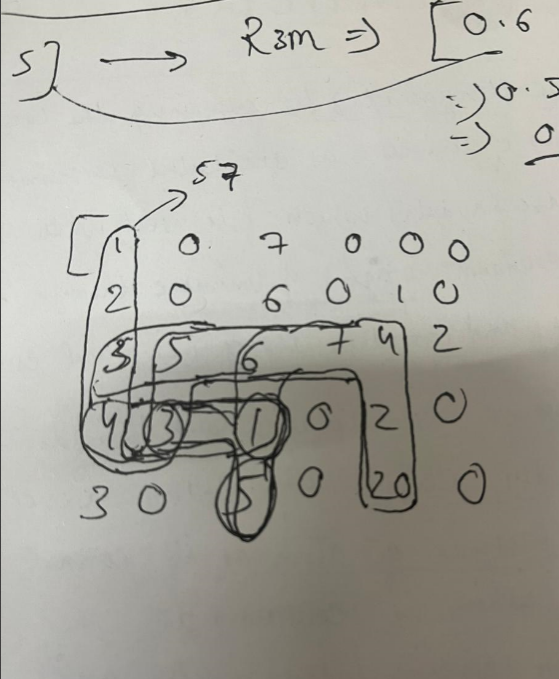

In [8]:
#in this case is you start at 5 in bottom most row, there are 2 overlapping paths: 5, 1, 6, 7, 4, 2, 20 and 
#5, 1, 3, 4, 3 ,5, 6, 7 ,4 ,2, 20. The answer corresponds to second path but in the logic above it will not be 
#taken

In [9]:
#Taken From Editorial of the problem
class Solution:
    def getMaximumGold(self, grid: List[List[int]]) -> int:
        DIRECTIONS = [0, 1, 0, -1, 0]
        rows = len(grid)
        cols = len(grid[0])
        max_gold = 0

        def dfs_backtrack(grid, rows, cols, row, col):
            # Base case: this cell is not in the matrix or has no gold
            if row < 0 or col < 0 or row == rows or col == cols or \
                    grid[row][col] == 0:
                return 0
            max_gold = 0

            # Mark the cell as visited and save the value
            original_val = grid[row][col]
            grid[row][col] = 0

            # Backtrack in each of the four directions
            for direction in range(4):
                max_gold = max(max_gold,
                               dfs_backtrack(grid, rows, cols, 
                                             DIRECTIONS[direction] + row,
                                             DIRECTIONS[direction + 1] + col))

            # Set the cell back to its original value
            grid[row][col] = original_val
            return max_gold + original_val

        # Search for the path with the maximum gold starting from each cell
        for row in range(rows):
            for col in range(cols):
                max_gold = max(max_gold, dfs_backtrack(grid, rows, cols, row, 
                                                       col))
        return max_gold

#### Multidimensional DP

##### Longest Common Subsequence

In [6]:
# Given two strings text1 and text2, return the length of their longest common subsequence.
# For example, given text1 = "abcde" and text2 = "ace", return 3. Both strings share "ace" as a subsequence.

At each pair (i, j) there are two possibilities:

    text1[i] = text2[j]. We found a match in characters and should use it to increase the length. After matching the characters, we need to move to the next character in both strings. dp(i, j) = 1 + dp(i + 1, j + 1). There is no point in not using a match because we can't increase our length by more than 1 at any given step, so when we have the opportunity to, we should always take it.

    text1[i] != text2[j]. Now, we need to make a decision. Either we can move to the next character in text1 or move to the next character in text2. We may as well try both - so in this case, dp(i, j) = max(dp(i + 1, j), dp(i, j + 1)).

    These 2 cases form our recurrence relation. What about base cases? If i = text1.length or j = text2.length, then one of the strings has been exhausted, and since no characters are remaining, there cannot be any common characters. Return 0.

In [7]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        @cache
        def dp(i, j):
            if i == len(text1) or j == len(text2):
                return 0
            
            if text1[i] == text2[j]:
                return 1 + dp(i + 1, j + 1)
            
            return max(dp(i + 1, j), dp(i, j + 1))
        
        return dp(0, 0)

##### Best Time to Buy and Sell Stock IV

You are given an integer array prices where prices[i] is the price of a given stock on the ith day, and an integer k. You can buy the stock and sell it, but you can only hold on to one unit of stock at any given time. Find the maximum profit you can achieve with at most k transactions.

In this problem, there are lots of decisions to make. Should you buy today? If you do, you can't buy tomorrow, or at all until you sell. Should you sell? If you do, you can't sell until you buy again. Also, every time you buy or sell, you are using one of your limited number of transactions. With all these decisions to make, DP is a clear choice.

Again, our dp function should return the answer - so let's have it return the maximum profit that can be achieved. What information do we need at each state? First, we of course need to know what day it is. We can use our usual index variable i to track this. Next, we need to know if we are currently holding any stock. Let's have holding be a boolean that represents if we are holding stock. Lastly, the problem has an explicit numerical constraint - the number of transactions we are allowed. Let's have an integer remain that represents how many transactions we have remaining.

We will have dp(i, holding, remain) return the maximum profit we can achieve if we are currently on day i with remain transactions remaining, and holding indicating if we currently hold stock. The answer will be dp(0, false, k) which will return the maximum profit we can achieve starting on day 0, not holding stock, with k transactions remaining.

At each state, what decisions do we have? If we are not holding stock, we can either buy today or skip. If we buy, then our profit is -prices[i] + dp(i + 1, true, remain). We spend prices[i] to buy the stock. Then we move to the next day (i + 1), we are now holding stock (true), and we haven't completed a transaction yet so remain stays the same. 

If we are holding stock, we can either sell today or skip. If we sell, then our profit is prices[i] + dp(i + 1, false, remain - 1). We gain prices[i] money. Then we move to the next day (i + 1), we are no longer holding stock (false), and we used up one of our transactions (remain - 1).

In both cases, if we decide to skip, then our profit is dp(i + 1, holding, remain). We just move to the next day without changing anything else. Therefore, our recurrence relation is:

dp(i, holding, remain) = max(skip, buy, sell) where

skip = dp(i + 1, holding, remain),

buy = -prices[i] + dp(i + 1, true, remain) and only considered if holding = false,

sell = prices[i] + dp(i + 1, false, remain - 1) and only considered if holding = true.

What are the base cases? If we reach the end of the input (i = prices.length), then we can't make any more transactions, so return 0. If we run out of transactions (k = 0), then we also cannot make any more transactions, so return 0.

In [8]:
# For holding, we can use 0 to represent false and 1 to represent true as well.

In [9]:
class Solution:
    def maxProfit(self, k: int, prices) -> int:
        @cache
        def dp(i, holding, remain):
            if i == len(prices) or remain == 0:
                return 0
            
            
            #skip
            ans = dp(i + 1, holding, remain)
            
            if holding:                
                #max(skip, sell)
                ans = max(ans, prices[i] + dp(i + 1, False, remain - 1))
            
            else:                
                #max(skip, buy)
                ans = max(ans, -prices[i] + dp(i + 1, True, remain))
            
            return ans
        
        return dp(0, False, k)

##### Best Time to Buy and Sell Stock with Transaction Fee

You are given an array prices where prices[i] is the price of a given stock on the ith day, and an integer fee representing a transaction fee.

Find the maximum profit you can achieve. You may complete as many transactions as you like, but you need to pay the transaction fee for each transaction.

Note:

    You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).
    The transaction fee is only charged once for each stock purchase and sale.


In [10]:
# Input: prices = [1,3,2,8,4,9], fee = 2
# Output: 8
# Explanation: The maximum profit can be achieved by:
# - Buying at prices[0] = 1
# - Selling at prices[3] = 8
# - Buying at prices[4] = 4
# - Selling at prices[5] = 9
# The total profit is ((8 - 1) - 2) + ((9 - 4) - 2) = 8.

In [ ]:
# Input: prices = [1,3,7,5,10,3], fee = 3
# Output: 6

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        @cache
        def dp(i, holding, fee):
            
            if i == len(prices):
                return 0 
            
            #skip
            ans = dp(i+1, holding, fee)
            
            if holding:                
                #max(skip, sell)
                ans = max(ans, prices[i] + dp(i + 1, False, fee)-fee)
            
            else:                
                #max(skip, buy)
                ans = max(ans, -prices[i] + dp(i + 1, True, fee))
            
            return ans
            
        return dp(0, False, fee) 
           

##### Best Time to Buy and Sell Stock with Cooldown

You are given an array prices where prices[i] is the price of a given stock on the ith day.

Find the maximum profit you can achieve. You may complete as many transactions as you like (i.e., buy one and sell one share of the stock multiple times) with the following restrictions:

    After you sell your stock, you cannot buy stock on the next day (i.e., cooldown one day).

Note: You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        @cache
        def dp(i, holding):
            
            if i >= len(prices):
                return 0 
            
            #skip
            ans = dp(i+1, holding)
            
            if holding:                
                #max(skip, sell)
                ans = max(ans, prices[i] + dp(i + 2, False))
            
            else:                
                #max(skip, buy)
                ans = max(ans, -prices[i] + dp(i + 1, True))
            
            return ans
            
        return dp(0, False)

##### 121 Best Time to Buy and sell stock

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

In [ ]:
# Input: prices = [7,1,5,3,6,4]
# Output: 5
# Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
# Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.



In [34]:
# prices = [2,4,1]
prices = [3,2,6,5,0,3]
buy = prices.index(min(prices[:-1]))
max(prices[buy+1:]) - prices[buy]
# prices.index(min(prices[:-1]))

3

In [35]:
# TLE
prices = [7,1,5,3,6,4]
prices = [2,4,1]
prices = [3,2,6,5,0,3]
# prices = [886,729,539,474,5,653,588,198,313,111,38,808,848,364,819,747,520,568,583,253,605,442,779,903,217,284,927,33,859,75,418,612,174,316,167,40,945,740,174,279,985,133,38,919,528,844,101,291,673,561,244,827,602,58,777,625,95,563,102,400,921,988,472,629,781,215,7,131,220,147,841,511,201,558,435,802,995,514,83,618,399,542,352,34,943,983,498,20,235,156,768,237,828,41,205,188,229,307,514,548,827,369,381,202,498,27,948,118,696,355,929,148,348,383,472,125,916,639,801,775,285,38,70,117,725,35,162,586,329,540,482,148,113,317,732,115,715,119,891,161,338,939,412,615,304,511,604,969,912,729,331,352,533,981,831,949,134,85,927,750,564,77,464,261,576,702,354,330,974,570,575,548,503,275,957,856,463,286,918,626,295,501,21,251,561,261,485,116,761,506,412,671,249,880,63,359,297,84,241,697,496,291,238,86,342,240,409,893,733,162,867,726,965,111,442,265,870,32,369,991,515,120,333,354,521,914,969,771,80,990,562,936,571,330,768,213,699,199,96,971,511,393,203,435,591,228,224,549,479,467,570,448,766,338,426,222,177,232,749,82,514,344,798,951,389,844,491,129,499,19,666,384,243,546,516,513,945,961,19,126,239,378,832,300,112,748,378,232,556,235,635,129,23,573,112,509,448,428,126,169,892,276,231,215,165,642,965,604,28,73,732,340,990,889,800,644,209,275,729,840,71,3,513,255,744,259,609,173,359,445,704,6,862,768,254,633,957,131,101,556,670,446,162,685,83,565,496,587,357,19,311,684,361,189,712,261,719,917,842,313,522,563,293,355,853,675,460,832,798,322,139,960,633,670,213,289,957,648,571,35,445,418,38,760,715,540,727,13,491,828,281,32,974,517,401,845,523,564,581,335,907,452,23,763,459,158,679,983,954,466,357,534,550,967,207,788,39,873,170,591,428,605,458,105,930,462,949,446,260,418,984,67,539,919,716,509,236,221,832,497,628,228,588,849,364,112,808,732,691,540,623,579,181,580,60,277,577,198,231,169,399,90,1,389,367,417,56,780,628,133,326,331,174,243,2,484,189,728,273,601,7,726,720,226,822,185,348,512,629,626,887,389,613,800,884,588,898,656,561,727,970,389,381,21,977,919,195,330,66,829,684,494,523,393,473,423,505,799,172,610,41,847,431,367,808,794,913,55,819,615,478,226,398,24,663,83,589,300,691,759,940,514,649,16,493,56,236,479,825,616,473,87,51,340,428,346,35,22,592,791,733,470,294,688,803,431,491,198,689,29,458,741,115,888,359,811,747,78,510,632,623,778,551,107,157,541,760,43,724,954,686,703,391,883,756,357,48,426,267,260,443,496,562,361,504,888,463,219,814,901,220,433,654,843,709,323,748,790,399,701,890,106,201,237,865,11,259,535,871,839,51,697,418,432,852,208,837,20,499,917,906,298,733,672,739,410,655,80,3,497,781,727,673,533,524,918,286,384,218,904,357,834,980,150,905,405,273,712,622,842,710,937,90,191,548,815,533,274,923,610,581,473,195,282,418,424,248,727,196,210,955,234,163,196,420,102,367,53,559,6,531,369,736,392,363,199,602,29,489,313,668,704,76,949,455,235,106,197,754,92,357,681,936,369,445,489,924,925,455,587,257,951,192,536,60,410,966,593,832,71,543,568,612,799,717,46,358,715,122,139,605,782,500,126,871,497,798,533,903,884,172,714,689,43,910,322,232,75,589,14,728,516,795,309,307,618,152,495,39,986,930,167,866,530,439,700,995,42,211,362,190,596,91,183,987,590,404,644,365,606,678,234,51,463,877,519,323,276,429,263,810,478,206,448,512,197,875,424,25,131,677,65,607,401,224,834,58,745,396,411,937,229,910,43,559,439,958,499,787,352,352,738,297,285,247,273,307,730,320,477,610,671,209,23,14,198,502,704,13,804,454,218,922,545,491,546,439,580,318,24,743,580,230,811,713,592,763,532,798,374,172,200,131,299,576,484,296,522,605,92,421,317,873,942,831,496,547,606,750,714,125,384,105,716,716,562,257,296,123,246,64,624,354,982,295,301,830,493,512,88,593,704,361,634,258,370,238,588,548,846,421,247,515,553,178,645,496,5,738,187,153,468,152,860,164,681,99,153,174,98,307,873,56,732,928,671,101,909,377,800,306,321,313,308,117,958,615,328,573,475,940,884,328,206,664,874,447,966,752,39,91,367,472,376,273,418,854,600,648,808,877,40,79,306,227,181,689,556,401,644,758,204,777,187,49,330,649,793,490,507,946,440,776,207,987,243,40,796,631,835,432,18,83,930,877,132,708,90,854,541,789,164,58,191,911,971,104,38,379,174,410,554,31,655,44,163,943,590,735,264,651,848,858,997,691,943,205,448,263,194,718,669,327,303,357,246,745,484,908,457,889,902,585,308,224,549,707,372,463,235,496,259,214,761,710,176,8,96,713,771,705,693,53,293,714,877,289,902,165,725,471,518,762,700,30,403,970,587,293,674,991,651,288,151,426,554,318,21,88,276,831,681,498,381,369,160,933,48,610,733,74,317,438,387,195,179,417,955,758,936,732,365,740,820,307,622,903,211,284,564,6,409,684,374,902,617,54,399,631,729,4,756,47,725,798,960,647,177,859,312,457,23,903,712,592,656,394,918,995,582,464,837,815,639,753,613,780,584,752,998,870,399,825,520,15,597,994,7,85,592,487,65,884,410,957,59,550,862,982,409,226,161,53,236,355,353,947,630,789,220,464,767,922,725,961,965,685,246,611,222,898,137,462,999,715,617,522,829,477,871,431,976,821,364,79,598,819,916,826,357,541,947,133,495,220,958,518,771,519,544,734,16,105,391,406,498,112,105,28,812,113,131,386,635,810,739,567,338,780,718,90,301,875,606,995,582,786,454,232,358,639,850,356,774,55,842,209,808,781,436,180,166,400,838,763,363,388,822,144,978,45,28,442,928,658,674,54,88,370,758,826,737,801,433,74,691,584,163,742,833,261,740,756,979,525,796,314,368,379,779,37,162,830,394,956,56,938,226,954,173,657,78,682,848,893,153,472,217,592,680,237,695,813,173,36,136,167,186,248,351,820,530,200,358,660,245,618,783,666,755,789,772,709,439,94,738,139,526,521,493,505,478,686,459,979,189,280,952,694,581,634,739,621,100,601,44,873,562,945,6,730,630,661,193,567,889,76,732,143,752,320,722,297,624,624,778,748,181,445,409,482,345,742,919,883,403,147,531,917,399,453,915,161,606,67,804,222,700,989,688,569,595,566,522,499,685,656,462,429,720,953,827,301,480,833,696,829,552,433,700,739,57,630,92,445,565,616,760,539,849,787,68,300,744,189,440,402,763,741,186,145,628,797,728,215,956,8,218,91,131,152,789,563,931,959,707,713,523,302,778,5,733,549,569,818,578,67,610,112,514,221,696,901,611,413,919,9,115,766,126,188,114,712,846,163,678,386,195,421,922,455,735,592,87,650,947,723,671,616,348,191,136,645,445,11,205,623,271,809,576,670,344,40,573,967,206,567,466,597,504,310,559,978,378,445,505,90,799,394,911,184,25,328,578,323,51,801,346,698,371,766,155,925,669,154,390,396,408,859,751,19,422,61,744,192,281,681,259,461,581,768,435,354,535,681,539,270,509,339,457,714,504,711,623,202,848,764,674,624,286,428,921,154,614,773,412,427,400,946,834,765,205,824,663,310,565,950,244,620,232,821,621,890,40,637,851,577,822,909,809,179,287,801,570,18,903,529,849,417,124,112,706,314,947,943,251,276,244,794,820,661,310,150,394,358,821,385,322,252,883,4,873,549,286,690,977,430,226,331,899,399,191,847,349,999,144,678,966,663,711,434,289,682,30,890,120,900,276,881,674,7,103,182,736,509,295,866,272,473,210,664,535,279,589,541,587,591,134,824,899,949,86,840,24,792,125,747,811,749,36,973,719,77,674,803,838,685,365,443,800,594,749,518,484,385,138,169,587,88,872,686,554,668,426,852,76,545,194,468,902,56,266,787,184,337,377,985,204,467,272,576,433,793,629,126,596,648,760,358,750,656,359,676,273,943,798,575,703,561,647,462,250,588,407,57,942,833,669,56,773,600,439,576,184,921,337,91,372,611,951,223,67,676,594,50,551,303,26,907,836,792,623,960,292,698,810,597,906,430,957,130,567,369,931,972,22,83,862,602,481,59,238,332,227,725,675,541,886,189,503,279,314,403,582,504,653,115,278,342,520,742,463,141,591,153,161,128,621,24,90,411,646,302,574,321,364,829,134,742,74,205,650,666,297,149,344,52,268,988,416,583,266,287,655,304,21,418,609,293,861,362,439,770,621,206,466,334,720,890,27,751,395,115,277,223,909,927,641,148,665,553,417,100,34,137,301,839,25,779,121,666,671,267,55,60,496,832,854,356,550,307,219,650,728,501,139,299,900,190,985,636,189,843,470,32,275,600,152,373,118,653,367,40,14,167,56,757,963,668,861,705,300,917,541,635,341,919,675,222,352,772,680,271,492,674,300,536,444,221,635,443,484,491,126,77,790,205,777,171,778,672,483,447,988,788,903,973,295,687,30,972,933,328,947,459,334,286,616,517,577,886,9,781,828,908,647,414,779,969,399,277,264,900,832,976,71,830,627,341,497,512,923,777,387,379,654,403,335,646,392,501,616,494,374,410,659,676,582,628,11,848,805,766,731,578,240,96,821,308,746,148,139,710,652,245,822,958,397,599,349,413,766,386,154,995,430,478,512,903,325,976,639,402,738,6,254,272,830,10,200,450,624,393,101,891,663,390,662,640,343,942,186,490,803,174,997,327,780,863,220,984,813,184,822,677,151,308,783,40,437,123,532,889,555,720,411,946,953,813,645,376,560,463,916,238,171,65,174,953,824,382,861,542,132,199,620,365,59,427,90,571,479,373,482,198,727,707,191,537,568,290,828,751,845,482,459,532,760,702,79,779,831,847,746,74,371,611,404,172,655,499,877,660,241,812,33,52,653,128,544,764,151,685,427,773,6,154,996,462,297,6,673,324,802,852,318,320,313,614,661,389,363,235,198,429,926,441,412,244,809,828,505,8,915,205,413,531,160,318,702,550,811,919,431,444,617,183,561,510,929,434,528,651,144,224,597,27,878,221,635,551,954,18,358,974,73,698,15,47,515,430,718,35,938,562,968,705,706,769,441,296,845,647,130,814,191,121,891,715,546,449,432,838,416,377,481,321,822,35,932,211,546,120,931,542,387,276,740,420,282,531,750,466,295,503,36,362,83,578,524,812,645,821,74,505,65,519,181,598,121,710,45,311,56,824,334,252,169,426,179,122,689,244,872,549,138,770,624,142,456,940,123,971,308,847,691,59,572,617,755,760,815,114,280,706,780,647,750,519,742,539,433,527,790,925,531,244,963,498,644,163,14,328,594,440,920,15,619,0,77,901,73,117,416,697,505,79,694,870,486,92,269,266,501,176,54,71,144,794,355,465,479,585,82,842,544,797,662,664,99,46,988,480,832,429,243,956,722,569,306,758,893,535,119,178,20,877,357,259,180,382,199,963,395,505,603,645,838,55,513,58,353,426,388,699,622,433,901,0,933,153,667,112,158,143,932,537,342,537,958,33,365,853,872,288,822,723,42,867,846,193,488,750,693,408,73,40,469,691,447,3,246,976,920,63,155,807,904,715,618,809,189,569,778,625,451,831,33,209,474,347,243,806,50,673,106,687,270,433,681,23,484,787,632,151,732,10,563,873,391,463,914,190,238,5,402,506,218,514,811,821,411,360,590,670,978,773,795,385,856,931,594,499,221,663,648,303,971,840,546,842,859,925,228,845,101,21,454,273,213,626,152,592,273,879,145,546,384,3,714,834,38,200,222,883,181,64,640,436,955,466,313,727,353,485,371,916,544,467,697,896,621,588,604,87,549,904,472,927,198,472,102,406,868,750,616,675,442,14,768,902,751,476,279,374,729,987,621,142,427,403,663,797,354,14,463,614,167,674,926,207,666,296,681,857,140,288,945,10,588,949,77,482,665,735,485,688,600,608,195,161,341,753,333,374,565,200,45,19,82,350,251,59,973,820,555,608,158,462,106,793,957,97,488,653,757,0,199,542,511,160,232,343,781,514,244,414,438,466,312,804,452,620,550,397,552,207,932,56,410,899,784,513,961,371,928,282,198,49,89,836,163,377,427,752,513,677,13,7,804,497,447,76,336,827,671,190,989,492,934,19,467,976,784,130,583,933,511,714,164,738,198,511,18,914,716,453,35,617,248,714,786,864,683,460,899,119,529,850,199,263,395,455,578,514,957,855,974,729,339,259,966,62,79,665,345,845,228,161,53,621,611,577,49,187,94,567,811,327,172,750,601,68,533,1,775,26,122,722,308,523,721,322,81,216,707,982,211,810,559,909,87,888,972,487,519,717,120,568,133,303,766,396,475,497,922,850,765,19,179,143,155,855,971,288,890,812,104,804,722,726,709,547,269,932,125,510,162,653,889,11,209,752,745,980,499,609,495,361,78,57,487,389,957,537,253,600,966,236,560,542,853,109,880,933,80,240,818,383,783,685,708,688,777,148,291,317,800,716,102,275,883,805,876,84,894,293,227,98,996,671,713,708,187,844,382,27,822,474,92,701,428,692,755,688,194,40,687,897,927,178,524,841,479,271,96,237,589,125,876,578,240,14,221,994,599,521,329,341,497,345,117,954,517,263,540,53,6,822,547,682,468,308,418,836,335,776,840,727,874,175,950,209,29,293,592,382,609,952,663,367,361,717,501,880,855,437,406,860,301,51,870,867,69,111,862,101,881,822,264,615,169,245,548,833,352,235,990,262,809,431,452,258,675,806,657,215,732,310,481,0,975,400,331,616,196,905,541,673,760,932,443,311,876,975,314,79,287,47,602,106,754,569,96,381,473,547,515,786,435,817,977,127,723,649,119,192,31,293,951,110,639,399,711,479,878,495,343,296,770,256,248,649,456,353,6,841,222,57,874,933,456,900,213,598,27,51,699,43,666,262,505,877,201,910,197,194,379,997,284,921,706,797,895,945,535,484,495,170,532,31,807,471,222,294,464,77,966,473,143,541,57,845,616,585,81,917,283,692,425,58,53,716,14,89,710,699,318,894,516,361,158,235,968,394,625,881,445,151,124,347,88,489,638,604,752,880,873,697,206,961,40,159,287,554,263,138,854,907,93,396,706,979,480,329,387,341,137,859,629,669,917,667,556,388,163,862,980,820,855,95,201,810,471,52,54,185,165,736,471,68,424,161,724,998,238,410,191,162,591,473,885,544,765,414,809,274,678,469,279,797,43,504,331,546,857,56,319,228,199,56,279,440,999,963,16,87,205,702,121,412,953,286,541,635,535,558,501,140,586,881,255,464,999,182,249,408,46,411,621,403,641,489,711,140,456,335,463,534,163,863,287,695,438,431,678,541,309,607,234,900,265,546,286,111,856,66,26,334,580,556,642,921,860,119,951,868,24,453,566,460,523,446,704,965,418,401,746,755,371,54,907,44,204,956,407,725,142,25,52,646,92,170,487,900,602,432,509,343,329,525,273,697,995,87,895,621,832,739,706,204,262,902,199,146,782,628,980,661,882,504,244,967,849,603,546,227,478,36,867,328,330,498,133,59,181,960,542,398,544,768,588,58,622,661,88,199,653,92,635,57,713,374,276,344,392,654,336,244,804,69,311,272,532,708,480,15,581,542,775,291,446,690,880,343,739,702,112,67,636,841,307,360,514,666,864,650,890,917,814,964,812,964,268,27,674,919,429,48,690,723,86,124,372,542,447,262,777,601,428,850,166,622,456,407,855,331,148,546,629,919,197,92,247,350,49,768,980,176,840,325,278,549,468,712,172,320,299,155,806,82,216,350,106,733,387,764,551,815,695,123,627,804,818,28,449,1,567,993,840,919,425,152,843,771,995,93,753,143,651,270,34,233,53,866,906,828,712,148,931,32,496,988,798,476,433,285,901,757,392,394,396,245,81,802,823,58,417,30,473,507,17,6,777,363,597,609,615,776,934,339,901,45,703,176,314,162,196,948,817,876,565,664,332,372,551,31,713,687,426,173,110,660,651,723,768,470,269,788,911,251,706,885,475,168,409,763,232,377,932,531,182,84,94,335,191,319,179,987,191,594,939,621,520,976,215,438,382,27,946,763,957,999,819,524,827,621,965,411,986,180,247,541,538,256,365,944,989,773,404,655,538,728,415,348,185,307,815,139,89,160,390,237,121,367,260,567,415,982,667,954,986,545,924,917,74,334,605,69,471,700,417,167,850,217,330,206,337,516,515,376,36,930,303,575,669,562,722,57,344,589,428,526,131,872,913,72,954,974,5,624,938,516,141,451,325,461,676,29,415,211,827,93,212,787,632,989,762,170,678,907,924,136,457,258,896,718,761,262,27,708,152,595,660,439,434,919,656,627,392,584,992,780,405,340,174,226,422,903,268,392,478,724,570,807,41,796,539,453,216,477,512,793,715,489,685,877,228,482,14,622,207,893,260,871,536,457,834,290,951,626,409,619,424,637,56,502,255,92,823,141,983,930,13,674,507,595,231,926,0,754,255,957,555,570,779,716,572,151,684,498,580,212,147,863,205,404,155,634,49,227,241,866,834,272,631,566,926,13,39,87,673,502,495,473,378,332,929,55,330,8,963,629,455,839,314,159,292,784,713,803,86,833,117,292,66,869,501,102,886,22,969,550,903,612,750,372,337,372,526,358,474,430,693,802,679,57,526,461,545,709,299,197,136,552,505,671,242,534,667,954,157,586,804,270,386,639,562,807,747,93,49,462,35,411,323,657,987,605,454,756,290,977,964,362,265,25,557,867,68,443,739,861,562,186,420,980,947,277,828,204,481,800,406,440,307,144,956,755,738,400,372,280,608,100,433,80,373,736,474,484,461,278,389,400,750,179,459,845,995,440,628,710,75,632,623,134,233,45,17,430,554,164,58,389,533,444,835,996,781,456,173,662,55,319,279,608,653,165,719,115,293,215,527,551,875,562,776,962,175,61,793,666,725,535,864,166,854,628,790,894,623,830,237,611,670,670,916,975,129,93,557,57,996,405,621,235,714,665,374,662,865,290,255,166,772,936,709,671,770,816,831,711,74,382,227,637,810,593,2,743,874,533,222,870,938,825,148,279,161,866,948,179,899,627,282,727,432,300,816,30,781,366,415,609,428,696,564,108,423,635,843,123,474,342,273,549,550,151,887,795,502,574,998,341,811,223,676,306,929,186,557,420,456,792,695,98,388,798,455,73,884,117,649,712,740,537,630,113,39,953,941,539,230,641,738,570,471,759,644,303,98,123,927,686,969,612,277,654,224,471,51,732,238,145,711,579,973,299,657,797,24,518,924,199,234,923,594,309,923,426,196,637,434,868,182,180,996,315,938,608,54,235,848,913,102,599,3,249,717,690,332,675,518,786,508,372,154,882,675,502,348,176,175,910,400,82,758,450,159,854,705,205,654,10,823,11,928,384,405,37,650,460,886,629,22,130,431,446,32,793,685,249,460,971,142,358,583,617,272,395,585,242,511,728,591,674,520,49,902,104,913,914,852,426,198,146,410,848,238,920,476,791,701,535,204,536,212,592,465,555,865,252,276,403,370,548,92,91,901,703,734,438,202,354,516,295,376,962,282,131,198,219,67,425,547,459,995,845,613,288,852,290,883,475,858,202,835,162,345,375,30,916,95,165,805,146,951,518,790,952,656,880,381,591,236,41,839,443,674,12,802,88,130,870,373,836,160,442,534,734,472,14,878,12,212,107,580,423,474,997,563,437,629,774,35,91,639,147,985,793,104,928,589,293,211,453,458,219,914,711,952,343,942,578,905,169,810,898,814,714,205,500,978,350,393,958,940,188,902,811,537,469,714,397,131,658,520,414,426,141,622,356,988,144,708,579,415,954,134,268,808,327,431,221,324,214,935,622,322,576,311,494,605,851,80,570,798,953,728,115,569,643,813,311,331,952,825,804,434,694,688,287,433,907,139,42,396,198,487,214,136,917,519,921,811,835,979,173,632,646,479,596,90,610,795,542,857,479,126,476,660,780,21,809,312,438,43,56,199,16,206,900,950,867,51,581,843,929,399,773,488,531,404,819,179,147,904,306,477,262,605,113,806,308,419,646,214,828,662,962,117,781,442,482,124,577,517,341,971,719,634,829,485,776,143,534,267,510,490,540,735,48,111,164,160,307,239,270,645,972,920,327,676,475,55,32,469,17,187,67,126,538,26,480,481,456,26,644,44,350,512,391,777,629,903,96,644,412,898,570,913,833,629,268,824,721,557,501,97,920,469,147,457,251,849,684,575,86,679,509,348,400,144,882,557,598,772,547,874,955,510,944,665,658,432,541,559,117,533,186,516,99,561,989,160,682,120,85,728,253,822,692,537,484,400,734,893,997,477,793,808,917,947,621,823,218,830,69,71,773,103,580,289,403,220,914,629,503,257,213,301,747,746,780,190,95,598,583,169,503,396,477,851,497,381,884,384,631,900,238,38,313,40,788,829,493,227,166,975,625,222,858,193,476,143,720,401,129,931,61,974,947,273,133,255,746,266,45,412,332,346,107,862,832,407,533,409,414,534,208,891,417,487,848,530,439,72,811,13,809,423,400,320,982,937,417,497,977,286,389,210,421,259,979,141,81,775,760,968,136,576,692,970,997,366,883,750,30,529,234,0,411,233,29,904,535,795,989,417,667,314,496,867,732,139,418,602,223,671,105,321,902,388,549,930,397,409,373,284,315,945,431,11,740,433,448,963,75,998,560,59,780,731,49,501,592,365,130,974,375,119,406,584,437,46,913,578,7,502,60,674,86,198,380,112,175,511,653,593,134,557,446,21,334,392,558,309,945,48,887,278,429,654,61,469,412,991,343,741,506,825,497,169,370,664,204,876,609,682,786,687,450,562,890,12,764,524,460,887,846,656,235,772,443,764,298,328,852,962,729,904,780,952,813,721,65,77,625,982,669,975,318,852,741,15,653,579,103,494,334,559,842,19,238,363,733,880,47,565,134,445,371,202,56,152,718,976,957,562,896,347,125,55,522,449,143,810,324,670,763,331,112,232,75,273,974,403,375,744,181,403,259,615,597,135,782,876,610,341,465,702,163,767,13,834,307,944,723,813,670,377,990,234,763,949,466,716,226,593,706,407,410,337,938,911,980,492,531,255,599,152,300,504,828,799,214,377,29,213,900,799,473,365,116,827,875,385,174,240,904,183,106,925,905,368,861,135,142,918,246,708,412,195,45,103,912,25,235,174,889,72,921,931,557,893,164,63,391,525,281,856,203,217,683,866,58,845,263,290,956,455,129,349,728,780,228,393,494,589,532,739,663,482,163,99,779,408,559,997,829,122,26,63,644,96,183,291,314,140,874,922,313,436,853,318,166,698,217,217,148,264,983,121,385,657,235,559,12,805,324,444,106,191,476,45,86,475,881,169,319,155,83,123,694,13,271,651,222,438,880,297,243,418,269,897,541,600,421,575,541,821,88,931,624,287,868,902,112,434,330,37,89,550,46,789,832,151,12,775,140,691,894,235,361,571,224,41,931,797,488,97,287,852,384,22,249,890,697,801,350,355,191,616,462,505,48,984,807,719,702,743,741,941,46,418,537,777,175,600,469,611,153,943,367,332,118,220,70,380,347,387,269,646,943,428,443,666,830,884,786,878,701,974,929,444,870,502,827,137,11,699,680,311,56,211,454,173,195,400,368,175,60,150,681,872,625,477,923,310,48,433,275,229,349,295,640,109,619,96,311,731,886,35,978,376,990,338,408,289,678,567,976,153,798,357,935,187,923,211,353,971,526,596,231,678,143,363,921,157,260,681,877,252,829,481,308,309,835,884,905,763,417,271,98,570,268,539,199,919,617,463,126,825,630,719,55,362,768,165,65,173,79,274,245,391,947,936,687,621,860,666,143,697,995,372,368,411,787,63,178,990,385,679,967,210,827,147,2,944,331,270,825,954,688,760,803,166,585,801,629,928,214,978,626,650,192,668,439,317,464,776,544,593,604,862,313,449,661,278,429,715,302,790,613,436,213,209,224,130,709,149,480,164,651,179,580,603,617,615,364,580,703,521,382,274,254,716,570,732,504,62,7,603,287,292,387,929,461,442,308,447,440,81,96,278,733,303,894,299,463,845,27,619,331,863,679,636,215,162,542,128,722,221,402,955,236,457,456,93,554,261,968,623,724,776,659,513,227,773,375,540,548,459,426,212,676,341,766,263,771,484,636,897,897,75,749,716,620,948,844,671,524,452,421,57,958,714,979,319,746,732,605,895,28,447,509,277,441,351,923,928,531,932,301,750,7,76,10,941,823,651,899,131,928,980,400,676,111,393,558,405,770,488,268,844,74,911,902,925,327,901,42,309,154,228,521,818,717,871,417,903,557,231,834,701,470,600,265,443,703,201,422,200,185,504,881,991,115,159,697,292,879,484,378,103,78,962,514,876,486,535,305,86,186,273,741,945,177,387,162,790,26,805,819,40,906,513,66,329,611,357,120,703,715,27,388,715,755,170,156,212,529,414,746,192,124,322,198,544,613,395,914,334,387,250,728,569,871,866,117,757,577,39,518,594,71,86,786,589,226,286,640,417,869,308,528,908,202,838,615,960,975,917,606,623,496,982,890,709,589,130,403,961,996,41,134,549,751,212,869,362,131,751,304,97,299,596,143,633,191,848,8,838,815,792,684,868,205,57,851,72,476,199,76,191,799,436,241,175,155,324,768,231,877,62,107,98,737,410,751,540,153,433,798,243,53,227,412,759,343,417,604,814,945,704,729,723,158,597,30,44,874,547,563,676,319,256,350,112,78,786,71,161,766,796,747,150,168,721,70,121,729,625,823,296,460,373,299,542,780,536,623,143,251,909,126,475,429,196,471,799,460,917,988,510,786,312,716,36,136,113,597,489,877,816,63,739,557,63,318,201,956,572,113,635,144,591,448,710,298,630,881,598,626,861,810,19,62,339,715,111,746,793,446,0,952,938,106,151,932,311,423,755,639,923,92,79,365,850,756,348,76,637,217,731,770,619,472,649,210,623,683,142,31,219,445,584,495,284,336,729,378,661,769,364,849,106,193,321,844,786,295,244,164,569,528,605,952,410,938,901,153,71,590,58,591,430,531,585,673,883,403,101,775,951,775,866,91,67,604,548,595,550,971,496,670,11,312,588,105,472,755,239,563,434,597,528,368,575,651,589,340,200,472,884,606,251,486,418,243,81,818,612,437,484,823,442,538,430,271,768,315,630,349,632,323,510,728,564,594,510,270,857,807,976,990,810,630,200,576,6,541,100,86,905,418,996,842,469,39,143,614,850,693,22,553,33,298,97,250,468,110,436,233,436,328,829,115,280,445,622,689,223,435,785,895,243,549,83,39,626,550,928,90,410,71,958,542,702,754,586,129,522,959,503,429,689,194,307,477,100,937,245,720,400,823,368,679,928,146,801,263,286,258,217,694,528,55,28,916,126,142,896,884,670,32,811,96,719,892,631,821,616,526,21,40,599,246,621,545,653,892,265,562,848,140,408,259,565,499,390,563,978,174,253,793,495,657,752,38,21,162,761,657,11,644,940,607,270,972,455,41,802,240,92,671,743,207,442,486,506,447,746,486,664,777,739,458,48,201,306,957,46,101,493,519,706,834,994,254,35,816,765,931,674,196,44,331,32,983,37,841,23,167,94,505,555,870,684,462,242,983,228,582,41,213,415,777,342,189,534,730,265,889,802,732,463,877,739,210,226,907,364,934,485,575,208,20,877,54,575,273,269,638,282,452,197,558,716,174,553,380,273,242,69,990,345,126,604,167,464,830,98,604,932,404,444,531,993,176,48,174,907,557,794,884,137,589,360,289,115,266,752,123,471,155,602,61,332,66,824,774,489,708,880,429,617,88,51,625,938,36,120,712,770,801,210,41,843,948,16,488,721,33,257,478,321,609,180,309,881,592,519,760,974,231,2,528,802,204,979,89,654,692,265,124,371,381,133,162,744,51,238,886,268,264,113,38,592,985,505,134,126,24,684,630,172,126,608,329,372,459,955,3,119,575,100,413,45,177,62,994,245,359,343,700,350,919,41,608,211,338,682,37,340,301,394,683,266,93,546,860,627,957,870,385,524,126,9,545,377,659,867,18,483,986,274,831,507,581,937,397,415,406,790,256,986,22,392,974,571,989,689,410,893,508,381,301,188,837,106,286,358,372,422,625,508,854,587,10,453,93,649,337,84,67,498,421,153,350,464,567,972,571,870,610,100,85,41,601,202,466,571,360,223,18,194,225,690,29,848,72,774,812,906,471,42,19,476,114,205,494,871,781,759,44,725,87,45,494,727,599,177,928,136,593,83,588,273,53,172,730,116,240,714,264,804,483,638,372,772,470,703,155,826,780,72,684,824,864,221,957,722,348,338,93,560,238,320,469,186,22,338,436,896,19,111,642,816,718,775,978,855,625,386,904,995,803,783,240,414,208,738,880,264,359,925,318,70,716,796,559,233,516,857,805,48,881,222,518,969,987,55,971,145,697,715,881,47,297,454,216,187,707,51,45,251,539,800,329,229,384,612,627,585,653,393,394,787,82,571,880,7,788,68,257,237,885,127,355,70,284,69,897,626,618,816,98,598,54,345,3,713,738,140,937,151,4,997,220,643,181,898,446,509,617,79,171,416,82,667,687,101,669,696,370,927,551,254,425,276,990,56,716,751,908,222,90,378,678,209,922,568,80,983,273,114,354,865,331,79,385,446,173,420,798,388,458,211,372,453,168,467,826,272,815,681,249,776,963,106,869,83,597,211,27,525,971,387,437,341,593,898,157,732,165,278,712,817,627,386,70,369,683,165,872,742,713,108,338,612,619,908,902,419,760,173,820,127,249,10,496,96,183,826,373,278,677,896,893,111,398,503,363,431,76,545,26,352,19,628,816,495,799,798,215,252,515,524,889,493,904,808,802,661,537,573,882,688,932,542,313,326,381,432,196,417,746,65,34,185,956,284,724,804,474,137,492,250,462,427,711,968,619,998,679,383,872,793,497,851,860,80,834,236,324,878,95,973,842,270,258,915,425,260,91,270,487,376,770,590,524,572,34,351,207,676,770,160,530,744,350,132,170,623,386,189,168,288,316,429,909,498,731,630,140,938,765,357,741,608,868,210,361,603,903,558,824,330,798,75,318,149,260,573,907,599,976,862,468,968,75,262,828,743,414,847,644,642,349,928,234,963,185,244,62,617,14,746,473,230,299,958,329,286,142,377,335,633,261,665,187,592,843,459,8,975,403,882,734,185,298,99,742,994,1,999,844,119,219,82,597,997,644,855,92,638,845,288,801,819,719,361,935,729,8,454,875,455,290,74,47,248,660,294,469,44,360,605,142,304,429,638,732,419,86,976,879,853,152,984,776,997,850,844,990,272,70,354,438,922,317,362,711,433,409,113,775,757,92,918,230,238,80,209,560,82,215,736,95,542,544,580,279,481,643,240,652,36,529,892,740,17,666,85,30,539,172,213,448,553,931,465,465,185,792,322,241,821,364,983,958,165,366,638,947,276,640,654,508,648,114,673,713,49,691,219,841,652,486,495,518,325,824,546,519,789,406,527,249,628,479,644,252,153,660,225,608,963,943,681,325,867,801,645,57,728,941,895,792,490,793,824,189,862,711,911,809,645,705,661,107,183,793,617,401,626,120,463,971,28,635,490,264,548,536,223,108,182,961,796,769,696,897,497,973,267,417,797,620,78,330,602,386,724,939,740,323,286,794,410,567,485,486,678,436,702,936,506,773,419,412,897,704,733,24,395,678,223,94,948,403,998,258,717,78,108,750,507,24,766,450,43,36,768,979,615,663,68,393,714,860,137,503,86,945,106,458,718,323,126,269,416,552,479,549,318,277,99,285,979,100,861,55,396,334,351,57,252,644,745,970,698,542,961,959,876,815,793,11,599,479,516,645,68,275,210,867,836,793,786,588,716,520,725,345,667,125,947,172,902,332,293,877,191,465,161,813,737,739,169,609,131,142,615,138,471,534,246,468,891,249,518,42,730,169,843,823,453,374,848,574,800,614,294,986,335,851,403,70,497,692,225,277,776,859,720,556,282,92,195,501,396,63,781,156,861,385,45,880,916,208,376,351,535,493,791,3,521,664,261,906,492,720,376,855,663,612,624,45,212,113,432,490,513,805,594,808,280,747,784,566,382,839,765,441,21,587,965,566,693,799,236,783,312,178,76,437,20,553,702,124,69,196,868,205,511,338,352,816,394,463,820,29,696,842,879,142,447,801,70,585,220,833,187,303,871,8,108,78,283,313,281,204,567,913,978,953,72,529,232,859,725,1,248,663,301,956,67,276,979,353,201,776,107,66,158,6,856,110,314,944,548,761,563,568,973,698,85,911,982,938,121,111,17,63,694,167,517,975,705,297,146,443,978,574,212,517,603,614,326,733,643,810,131,96,418,598,206,680,866,467,358,630,626,11,562,500,136,403,735,47,374,464,384,139,498,556,960,484,88,113,727,4,359,110,611,180,249,745,24,995,971,933,368,51,636,310,35,739,265,717,292,747,679,344,517,511,592,477,49,802,761,226,779,772,149,815,644,683,95,676,471,27,34,975,538,368,631,140,226,583,503,907,267,583,394,470,126,91,892,773,361,904,143,299,118,851,678,848,439,941,699,318,120,690,575,966,761,741,390,819,276,292,571,992,433,769,600,526,369,689,405,818,305,223,745,959,757,75,288,212,436,578,485,650,243,238,0,214,937,262,337,219,213,244,163,15,585,406,916,301,674,532,388,910,809,836,745,369,562,673,264,958,382,757,156,342,178,917,564,932,561,31,656,958,57,516,94,567,478,617,131,357,829,625,520,546,126,66,275,848,672,51,533,406,226,959,948,288,95,369,807,198,769,405,590,231,40,951,858,80,581,917,776,417,245,739,522,419,810,567,442,5,897,527,847,505,73,518,541,250,713,315,562,980,590,790,777,840,651,468,835,653,135,595,54,187,185,521,467,622,241,795,693,917,291,449,147,959,253,516,644,112,489,290,299,805,319,344,508,43,230,731,245,778,546,205,11,747,927,339,100,303,312,619,446,507,168,131,171,972,155,381,2,188,57,796,43,512,631,869,858,987,574,228,606,866,379,55,430,919,66,39,914,144,161,510,302,610,976,183,333,311,821,460,406,578,613,324,368,180,504,657,740,118,192,641,677,183,937,573,855,506,864,417,379,959,895,860,655,564,512,119,598,222,348,17,130,907,94,93,866,152,783,727,802,217,61,845,21,32,118,316,232,902,243,765,318,798,72,108,113,65,10,107,850,889,793,581,965,125,713,356,444,268,628,950,450,469,925,590,123,890,64,615,562,527,441,726,320,821,353,755,177,608,573,258,441,277,971,662,45,275,669,105,793,45,564,332,961,382,286,577,620,643,98,260,910,704,676,0,854,164,552,570,903,398,433,781,212,932,124,915,327,218,952,908,386,877,515,183,977,224,782,586,891,451,106,394,927,657,700,426,368,52,733,417,246,800,175,331,44,54,552,16,15,552,296,91,96,403,162,710,231,411,625,262,320,105,20,131,822,458,694,153,180,717,728,671,439,837,597,591,632,883,861,230,339,547,474,585,700,980,42,670,701,474,42,776,366,320,753,121,224,369,150,327,737,86,450,743,368,629,376,322,156,542,822,859,300,172,894,926,162,210,866,892,764,460,93,998,574,171,148,908,117,782,369,697,458,458,717,386,192,874,580,791,886,674,949,42,265,219,711,576,386,563,148,937,366,976,107,126,552,121,118,453,362,780,941,294,291,657,484,535,120,8,829,632,713,253,592,580,345,887,583,634,861,111,949,181,614,590,563,835,362,83,902,727,865,74,114,797,886,607,689,849,454,30,140,296,778,500,881,154,144,283,114,445,883,831,538,137,0,505,592,326,613,571,880,557,940,802,861,398,426,655,637,946,392,387,294,913,800,261,493,522,29,671,624,840,139,405,465,308,263,584,371,528,298,152,152,314,702,177,235,726,798,111,651,975,596,5,712,74,705,815,14,301,17,857,546,361,861,423,995,763,65,434,616,398,155,29,564,557,855,951,719,782,834,8,76,115,612,916,296,60,651,94,286,64,698,826,504,387,231,332,2,548,78,339,942,311,631,418,11,546,701,80,771,831,531,149,396,942,142,855,437,431,227,961,735,732,333,943,681,459,719,195,978,826,763,24,195,71,198,805,659,560,55,780,457,713,577,514,849,896,805,850,12,999,743,670,360,630,363,228,31,202,695,591,174,638,83,304,150,209,381,913,645,124,334,998,977,196,357,858,140,87,582,14,50,70,741,948,714,821,683,471,214,807,271,262,771,766,98,428,353,933,575,347,59,459,629,681,942,536,988,977,77,486,948,319,524,819,609,991,97,139,275,756,78,802,669,806,868,360,728,51,358,53,912,982,34,975,990,625,290,722,891,679,323,722,203,69,984,507,692,898,14,958,672,448,310,992,715,384,453,463,499,199,604,687,914,109,72,761,730,274,431,327,58,983,375,722,156,395,30,812,489,887,746,749,434,963,573,4,531,540,459,95,214,408,909,813,944,539,863,499,95,66,755,376,678,335,817,584,998,361,714,530,627,290,488,942,343,788,360,197,611,185,453,341,57,86,5,357,614,707,791,363,274,549,227,802,69,375,813,182,420,35,180,340,205,967,502,795,341,736,886,870,324,480,551,471,151,151,628,343,424,79,35,736,846,860,230,249,84,400,231,703,13,35,914,516,50,431,448,146,925,916,331,371,528,35,598,148,769,987,211,308,236,843,346,175,695,157,752,963,798,793,687,869,480,231,885,480,77,151,434,836,843,111,68,56,338,682,934,192,886,494,476,174,217,876,341,177,353,803,960,382,51,676,456,214,114,712,330,300,567,901,914,383,384,740,116,475,582,905,12,70,381,104,936,832,565,525,187,814,548,809,321,61,330,824,440,533,72,173,68,0,93,759,155,377,625,108,535,704,122,474,535,154,847,220,714,979,129,393,13,589,687,530,728,817,94,851,946,92,581,891,532,969,640,947,11,155,806,454,102,502,875,881,949,237,985,236,194,599,327,813,668,736,978,387,301,416,225,384,927,264,73,884,482,559,65,812,66,995,590,787,620,101,130,982,775,595,246,752,755,584,781,374,777,625,294,782,14,109,515,387,468,464,541,765,782,500,169,561,866,915,387,276,18,262,721,87,256,421,180,997,382,813,937,200,497,397,211,807,223,126,89,145,723,476,753,771,95,743,952,771,471,824,380,614,360,231,796,661,844,572,778,404,48,342,867,849,920,805,920,724,738,956,383,923,510,314,541,334,580,753,395,110,259,441,112,476,2,504,176,194,979,425,679,577,857,872,125,46,652,707,378,798,242,997,801,904,457,373,272,441,182,500,237,864,118,311,660,218,790,585,607,691,71,383,31,507,214,966,771,616,60,803,4,227,453,833,712,559,271,715,313,215,104,259,203,800,735,87,829,166,185,101,608,870,27,80,307,868,792,535,459,729,16,455,653,47,696,790,572,18,982,18,733,831,74,278,728,11,479,81,859,393,683,503,856,947,279,775,159,236,828,705,462,644,690,858,778,588,594,44,226,0,828,996,401,684,523,116,17,615,177,311,400,73,557,627,34,729,834,681,944,932,772,994,766,363,727,818,590,424,422,984,721,755,546,497,717,605,61,415,358,830,563,870,454,878,918,621,381,430,457,707,98,378,793,706,26,137,58,125,715,709,792,140,861,384,718,333,581,200,457,925,704,527,423,36,256,702,217,911,970,894,523,508,837,5,581,512,594,842,426,571,693,238,26,439,829,598,769,203,576,979,940,970,971,959,449,290,526,494,810,428,815,136,736,101,524,175,716,58,792,251,180,680,727,475,842,969,468,237,506,621,415,635,992,858,759,873,146,187,844,222,570,420,75,204,424,246,89,583,383,282,69,692,993,53,929,37,515,314,895,12,420,801,263,719,149,817,641,909,463,235,644,579,857,531,978,264,146,744,568,479,548,957,12,83,838,650,556,691,64,101,600,792,446,974,299,808,678,505,727,224,759,718,556,605,993,335,84,49,878,786,927,388,656,171,462,238,309,626,704,921,367,891,312,72,111,979,575,488,519,938,161,15,109,276,616,576,145,282,997,386,262,818,659,701,759,504,59,795,139,516,864,383,758,928,190,652,748,915,861,460,295,889,364,844,604,720,943,844,862,328,102,310,675,463,757,40,331,415,85,485,500,637,800,92,334,810,507,618,98,254,419,781,703,627,455,513,984,41,566,981,51,944,809,255,402,581,693,696,316,158,522,848,992,375,472,432,882,883,580,368,614,756,730,461,511,408,599,645,857,505,607,992,577,221,217,186,696,346,0,157,632,816,203,385,689,237,527,255,648,612,917,655,56,125,389,970,517,843,615,4,423,869,174,364,613,811,440,461,706,295,346,895,576,104,734,191,556,125,822,528,716,942,904,419,837,496,668,221,254,149,124,887,223,571,103,312,912,577,395,538,68,878,191,125,26,626,872,737,197,955,509,445,764,210,827,438,318,697,121,422,378,569,505,50,493,265,605,997,693,863,155,465,44,753,157,877,436,646,447,43,475,239,904,615,98,183,921,447,18,193,523,852,755,650,346,202,50,565,787,927,970,6,927,624,267,846,364,83,242,152,460,354,319,88,802,63,674,507,718,914,688,777,244,789,157,958,664,11,368,441,315,43,209,943,755,662,298,624,530,802,161,731,174,258,529,750,398,799,285,444,1,774,115,740,601,993,847,794,649,206,542,825,728,688,731,700,459,207,916,911,102,674,28,833,727,31,287,422,994,93,13,610,89,352,141,9,657,924,40,750,661,71,525,328,552,231,551,525,115,176,688,711,465,547,380,22,977,563,8,197,59,194,975,394,784,900,77,463,473,441,325,762,109,756,141,693,349,911,338,339,361,602,344,103,398,546,624,865,80,658,516,73,992,942,863,6,88,106,308,46,214,343,219,350,578,434,765,966,906,339,504,88,455,788,149,404,978,145,760,860,844,567,866,165,727,24,539,258,885,922,260,110,569,705,945,533,415,605,438,377,558,477,984,208,158,370,354,614,579,846,867,257,161,108,213,738,782,644,49,757,262,832,758,955,897,336,156,160,758,705,383,816,181,651,985,870,498,409,926,787,18,297,438,328,164,783,240,766,886,78,910,589,777,899,824,671,103,332,885,751,970,986,90,258,626,68,965,279,849,54,593,987,776,207,715,281,936,352,728,385,285,231,236,632,885,489,554,838,642,112,734,665,841,388,132,496,267,907,531,970,625,62,792,836,775,886,716,879,378,939,674,281,692,158,963,876,466,210,141,577,250,29,441,204,701,800,364,45,158,91,299,588,978,765,146,161,319,489,157,407,140,601,125,201,224,438,403,815,672,487,114,829,698,254,748,116,971,433,193,275,236,654,780,564,78,821,711,742,725,577,416,7,642,897,955,927,850,788,681,75,687,460,26,24,139,906,794,134,184,77,239,897,843,286,903,711,266,623,252,117,62,228,240,762,228,420,310,960,530,609,435,162,519,998,19,637,511,150,813,236,852,32,638,251,483,695,507,897,249,941,331,677,480,327,406,258,800,998,22,306,726,620,6,23,945,195,208,161,61,637,850,459,796,933,136,356,505,455,946,964,250,505,302,777,685,265,157,572,363,99,455,561,60,403,627,344,762,530,556,359,191,297,530,770,792,846,772,362,540,440,967,136,785,198,226,750,788,240,494,233,334,188,3,682,833,652,678,3,233,117,820,472,941,0,821,879,117,595,762,453,418,489,704,321,249,590,29,30,981,616,151,640,886,891,459,868,299,623,576,336,95,356,499,357,140,517,265,755,574,578,938,961,515,840,803,640,925,149,255,900,254,420,748,352,802,600,2,808,957,902,767,262,460,588,197,835,258,167,712,172,258,431,471,941,55,759,274,28,873,573,316,352,655,622,462,404,436,289,689,698,291,397,773,30,985,233,289,23,414,4,649,213,739,972,52,625,804,24,770,147,690,334,753,218,367,954,71,575,485,564,230,57,534,640,575,239,228,839,955,63,173,904,659,713,398,822,763,633,317,774,448,459,48,112,94,379,850,893,745,505,244,105,408,216,437,230,396,683,478,586,224,215,647,525,491,175,448,377,623,183,375,376,775,239,98,714,635,160,211,579,776,110,95,319,784,303,816,150,127,957,457,413,62,528,400,133,115,419,682,563,632,905,655,564,208,807,658,165,344,308,792,753,451,938,208,654,934,426,582,440,788,998,549,314,592,684,375,629,713,176,89,46,85,699,621,615,890,149,28,475,819,40,853,247,767,369,43,117,969,813,841,116,379,599,292,594,833,826,447,906,870,247,812,975,713,775,353,533,927,928,722,974,249,338,316,508,446,126,200,107,739,794,877,244,567,149,662,330,707,867,860,677,0,164,893,142,213,786,847,215,809,98,450,799,772,828,56,577,298,790,190,732,459,899,950,519,235,909,808,870,509,479,406,319,570,24,312,774,744,779,391,438,861,53,469,70,376,773,215,269,537,418,636,114,566,732,417,63,404,932,305,629,24,355,661,475,29,416,697,378,893,54,535,584,162,2,852,754,631,532,609,574,937,455,675,993,40,118,659,455,539,960,149,158,844,394,174,108,140,940,76,514,27,986,686,916,368,486,13,505,925,569,103,848,604,110,838,249,302,406,819,495,70,499,909,771,965,853,570,445,635,270,330,130,417,270,120,852,743,724,912,594,520,444,507,194,581,704,166,234,804,400,946,837,240,35,147,580,152,775,885,238,35,698,529,302,853,658,524,427,373,102,906,412,306,483,694,570,586,950,661,831,803,902,365,295,686,192,87,98,994,773,495,274,110,563,32,431,93,487,884,253,977,300,676,557,647,423,796,583,1,876,393,888,163,343,951,803,585,518,522,43,319,75,978,116,617,482,702,260,687,166,886,295,748,885,63,25,385,367,523,267,750,549,348,912,436,69,402,203,937,740,422,250,81,205,353,652,512,489,839,804,573,607,806,140,899,386,388,81,417,366,656,979,912,137,24,909,298,966,316,113,523,594,443,427,100,432,317,901,624,395,8,364,775,539,929,154,683,166,765,576,296,827,97,349,31,245,26,205,499,220,626,703,929,500,116,203,703,811,731,515,348,426,144,275,292,159,628,433,156,980,314,864,825,274,398,898,571,774,854,258,658,464,672,702,989,199,75,817,348,247,412,840,663,27,247,549,524,892,180,31,55,976,909,546,483,692,135,812,13,544,466,101,341,115,928,898,374,263,620,247,884,422,242,257,580,486,266,366,418,349,637,556,546,154,754,201,326,70,987,118,704,749,51,893,297,482,350,380,394,100,821,148,660,420,28,243,859,221,78,647,845,865,538,385,107,631,925,161,0,41,717,880,994,890,575,561,115,631,755,172,905,859,310,809,755,471,546,833,572,749,213,557,874,110,7,205,114,327,868,674,557,422,413,691,773,404,165,709,412,512,311,732,159,45,440,864,111,180,380,461,767,112,753,745,153,765,397,903,216,865,361,570,818,452,968,499,749,291,82,333,494,811,764,235,562,777,652,306,602,998,967,321,361,780,270,455,251,958,241,251,193,729,10,912,768,651,641,105,621,193,971,628,841,907,389,599,841,494,823,120,206,513,757,248,800,44,490,904,347,627,344,108,988,454,376,514,991,644,803,809,198,957,613,145,171,611,511,836,957,360,149,141,434,810,504,694,357,785,153,175,729,96,271,713,435,185,388,266,823,687,311,643,715,259,531,480,9,381,495,638,437,402,709,138,635,370,860,285,472,496,759,584,716,622,668,520,538,817,600,766,461,778,924,436,408,610,321,222,127,977,585,3,209,311,665,124,297,244,294,577,340,7,29,518,298,4,95,610,597,295,747,601,511,531,328,115,291,579,854,297,531,736,765,181,345,810,356,73,154,912,843,568,321,552,982,889,553,738,546,104,212,910,32,798,125,808,932,9,255,387,545,728,889,596,840,928,237,788,844,295,559,508,14,831,399,680,733,652,877,597,533,64,646,593,395,737,797,819,941,414,721,915,337,322,779,217,20,741,516,963,568,350,723,442,648,703,779,698,760,505,807,165,305,209,991,123,585,930,710,84,104,414,537,262,113,354,506,479,445,673,978,964,540,468,788,897,711,411,782,213,914,730,2,967,524,558,462,969,534,369,240,332,967,842,162,641,316,172,597,100,172,107,477,557,101,231,213,537,285,498,289,203,550,834,178,911,332,461,209,87,235,482,487,657,12,939,549,354,199,646,634,761,328,32,19,190,376,561,196,104,392,771,248,411,803,558,297,12,887,806,148,380,643,617,805,759,866,562,116,513,697,101,582,365,961,76,316,888,508,500,634,771,652,843,761,910,619,555,925,358,381,508,755,763,209,316,996,51,541,674,574,297,163,913,889,884,915,952,89,148,783,223,401,912,135,51,804,180,511,441,208,164,903,955,481,298,108,484,805,518,946,918,716,83,951,829,482,339,73,103,639,623,491,300,104,353,883,434,935,410,730,402,497,282,617,492,752,565,559,483,512,686,80,420,177,571,839,670,786,970,881,168,929,51,201,359,201,667,120,824,655,63,902,39,819,4,13,776,510,866,53,526,592,318,466,974,481,655,297,667,234,192,402,353,463,848,983,274,156,454,247,771,881,542,130,129,822,199,645,538,673,152,79,687,132,51,714,244,96,434,858,667,907,669,101,344,395,859,676,348,463,331,185,603,662,406,577,211,363,17,210,784,149,61,402,235,800,437,452,550,600,705,424,792,742,672,741,730,577,313,513,890,78,435,679,78,440,411,325,62,123,262,764,6,36,350,475,50,184,708,494,837,566,548,925,279,801,803,505,285,233,494,751,422,499,278,373,778,828,44,85,313,342,653,0,709,628,52,872,38,983,166,497,23,622,164,519,802,368,157,844,985,713,441,314,273,226,629,971,742,710,527,48,452,304,973,218,597,198,246,193,685,351,719,979,497,999,953,477,193,108,701,369,632,967,993,993,743,803,479,152,543,736,383,574,662,405,472,563,477,159,811,215,101,622,388,299,462,617,494,110,481,830,604,905,37,787,860,198,921,982,753,303,504,997,358,668,408,389,880,487,192,954,584,212,818,216,867,265,814,283,508,614,148,604,182,533,202,46,256,345,117,854,837,410,263,269,403,990,513,431,509,283,574,677,193,196,41,200,837,465,711,190,488,586,720,338,746,338,172,378,707,906,886,368,11,525,79,210,363,330,728,884,72,372,867,326,229,252,839,786,180,575,172,968,6,200,132,630,156,121,122,549,38,852,448,941,3,645,708,289,678,60,843,231,146,106,161,363,940,661,962,748,297,327,701,288,934,956,916,416,851,148,308,534,210,396,934,519,764,807,49,179,385,741,464,996,818,582,843,24,546,644,671,643,519,479,487,374,239,536,367,89,151,456,91,104,745,882,940,604,498,643,874,215,171,17,312,82,105,211,89,649,571,253,851,832,589,947,249,906,314,76,563,738,994,633,119,951,129,878,190,725,193,82,485,768,588,96,40,760,625,190,295,644,468,279,421,862,17,501,360,643,149,120,278,302,82,245,818,84,105,544,641,217,769,817,913,251,124,58,730,267,577,192,595,204,631,556,823,845,609,743,247,676,504,35,254,347,929,397,609,664,518,648,949,221,516,787,543,120,239,552,337,698,37,328,462,407,66,936,861,299,299,194,743,554,28,242,145,124,589,494,38,824,782,706,855,95,862,261,823,899,6,643,501,894,942,220,881,60,240,225,662,839,462,152,668,695,174,73,810,725,294,234,330,173,673,337,982,536,883,524,160,946,257,185,468,955,549,619,344,414,545,930,405,199,415,245,942,583,837,494,889,963,319,832,971,334,972,882,272,541,254,946,835,606,839,686,152,186,53,699,292,59,336,635,533,720,362,229,261,641,982,611,747,806,147,305,821,467,115,550,437,713,605,488,475,191,741,362,35,78,183,515,797,967,412,872,286,725,658,270,242,695,247,323,169,642,440,915,738,299,368,858,940,274,247,42,116,60,737,542,355,883,523,14,64,315,793,394,533,636,411,559,198,618,328,640,40,575,611,642,359,147,840,72,259,277,23,414,369,939,711,663,763,979,605,847,250,937,771,223,754,175,225,632,629,849,791,416,691,670,720,758,363,613,330,218,839,501,933,291,351,972,147,91,217,861,184,712,393,39,763,800,168,389,779,683,911,410,770,948,420,685,990,969,928,351,75,328,776,77,291,543,402,348,948,783,854,796,12,519,5,607,599,403,215,244,894,170,303,558,885,165,548,480,105,602,130,281,366,854,944,314,815,630,981,849,128,614,826,198,633,245,623,364,83,742,932,966,942,915,555,612,903,88,268,958,181,481,429,45,279,228,445,231,548,244,347,354,792,982,270,862,8,162,779,452,2,333,483,520,679,856,735,544,151,603,489,615,966,108,456,140,785,42,504,74,203,432,223,209,25,821,797,636,647,759,142,260,929,571,658,801,611,70,689,169,239,893,520,717,424,230,16,238,552,743,269,924,164,8,539,450,91,787,706,344,571,750,701,325,727,657,435,759,884,900,708,424,482,685,313,630,559,486,32,933,994,696,26,702,657,922,547,777,388,820,165,579,306,962,551,344,423,268,371,119,493,943,259,73,169,964,747,36,437,481,213,211,626,809,577,78,568,269,806,874,371,743,822,36,969,421,469,84,662,267,815,138,336,265,597,970,425,635,366,699,672,682,186,12,828,211,785,916,71,341,71,990,852,682,739,594,300,262,751,123,579,271,955,85,634,461,882,603,685,385,702,466,829,893,912,1,57,644,97,583,161,953,535,586,509,317,819,911,323,917,816,239,241,307,218,351,767,187,855,978,213,632,655,708,214,7,296,116,822,820,39,382,649,272,930,989,392,708,583,384,632,386,552,274,955,644,320,40,948,752,997,568,491,831,970,112,286,46,223,569,673,166,447,288,166,12,844,448,640,38,488,138,718,186,894,761,289,60,772,709,795,416,626,753,86,821,375,925,732,851,29,756,883,839,794,498,905,335,631,201,806,283,993,239,784,860,970,614,905,572,290,866,248,117,598,47,910,165,828,400,295,128,584,873,754,194,526,422,578,330,919,425,995,879,655,19,104,301,234,662,166,741,739,548,437,301,265,204,307,874,883,949,572,563,923,946,487,763,413,317,79,811,594,444,15,147,837,610,6,303,60,723,253,934,375,951,17,313,847,374,405,842,167,178,40,170,48,47,156,419,17,413,397,944,305,708,125,249,330,389,938,955,278,256,4,155,170,862,281,915,721,590,992,984,485,418,222,39,309,132,803,252,866,805,202,564,950,82,273,105,577,575,126,132,766,704,553,113,993,962,658,652,883,223,515,454,236,609,724,569,827,626,41,750,406,455,706,365,407,362,553,267,934,735,289,693,263,858,89,414,478,956,190,404,538,256,317,549,659,495,468,450,942,396,95,558,86,690,978,749,791,115,557,746,651,676,157,954,416,398,493,369,565,955,77,483,100,318,32,83,990,301,20,229,636,865,873,970,718,907,881,61,712,25,717,774,98,751,176,951,478,162,867,110,969,926,170,378,243,826,980,278,792,904,990,233,234,361,359,221,615,151,911,731,760,93,227,995,307,12,376,916,901,989,69,890,335,929,917,164,876,208,570,493,50,746,710,827,437,466,230,547,202,35,117,916,411,635,131,710,851,252,915,78,827,395,677,583,245,249,289,64,194,445,171,695,523,124,15,167,22,959,697,90,972,358,96,93,139,234,127,455,762,826,587,945,990,979,975,175,15,256,396,570,582,540,288,452,387,756,564,633,179,904,962,636,857,249,348,543,2,795,657,866,879,559,301,671,298,936,521,728,388,869,451,389,990,718,491,35,638,901,839,251,888,745,822,832,342,271,502,574,312,632,878,659,302,109,436,927,89,124,668,792,98,429,881,816,869,916,235,65,876,610,956,86,444,31,379,435,352,95,987,92,318,666,712,218,649,232,452,20,96,894,629,574,318,660,872,42,298,748,437,191,868,778,444,841,201,730,618,217,316,31,494,209,554,866,438,510,428,722,73,301,494,31,372,827,2,169,594,128,303,863,384,684,71,584,516,507,62,189,639,331,455,191,864,390,461,716,787,276,379,479,746,207,879,515,625,844,395,266,70,564,267,921,735,247,379,919,604,341,190,291,201,423,429,298,77,327,206,884,278,68,595,843,423,698,303,66,55,343,784,76,324,980,143,335,349,520,930,63,182,67,547,702,869,144,207,472,392,14,903,613,501,770,269,301,411,842,653,716,235,750,740,457,871,347,67,849,185,802,672,950,590,179,211,871,505,46,858,771,923,447,825,500,852,732,318,558,914,880,591,985,11,219,773,701,62,281,474,526,249,779,960,205,46,126,997,335,36,541,939,247,977,950,0,439,958,997,971,584,30,600,143,115,848,243,86,27,91,143,437,850,484,275,790,110,345,383,804,181,103,319,111,371,433,472,121,985,430,256,775,410,489,986,216,533,776,484,600,123,827,911,315,702,116,992,259,902,185,760,858,563,373,989,70,503,984,127,678,878,93,109,271,987,193,3,113,697,610,940,662,367,674,184,707,399,859,432,988,561,416,933,933,888,517,37,546,129,418,540,178,249,213,397,562,754,92,444,529,112,246,695,758,387,608,320,472,272,745,757,966,154,255,468,165,384,503,161,386,75,763,213,281,864,954,284,112,111,77,316,370,156,710,494,786,750,897,642,959,625,396,328,267,970,797,500,53,794,419,557,778,411,522,511,669,613,213,711,235,992,988,515,107,683,598,867,758,689,763,282,938,843,726,539,904,123,418,201,946,962,470,548,534,555,127,957,928,928,394,874,312,548,480,274,885,929,216,29,532,107,265,695,388,292,538,85,601,947,249,34,758,413,105,907,567,389,13,157,455,988,947,846,597,809,627,150,573,852,65,138,656,165,610,377,212,903,186,0,986,626,261,433,58,849,535,47,365,333,493,528,994,170,162,419,943,389,698,138,914,711,565,945,8,844,708,541,154,235,415,655,816,189,826,845,296,715,160,282,530,459,341,617,162,110,664,206,861,408,10,856,903,958,228,416,664,669,554,803,844,252,371,165,440,240,186,204,176,530,784,108,606,242,462,574,682,441,845,364,399,23,897,669,534,692,340,24,23,16,395,392,76,633,89,966,430,622,805,954,374,950,574,629,355,768,211,852,971,283,59,119,132,359,155,139,445,805,737,799,468,31,320,435,735,861,383,719,259,915,105,875,323,706,534,153,50,774,277,150,979,98,881,799,534,615,335,796,251,90,627,498,440,647,144,25,324,553,562,986,393,762,604,968,305,856,726,820,488,34,100,444,794,344,143,555,134,702,979,265,699,534,917,17,829,9,692,862,225,63,455,559,947,413,0,362,792,173,318,951,826,525,63,847,296,17,639,651,361,378,877,887,793,765,629,238,452,220,996,365,729,476,925,311,562,792,655,385,617,229,652,984,888,383,934,596,560,905,146,139,0,168,506,357,309,204,178,701,944,384,267,243,398,602,792,653,352,876,636,439,434,817,227,690,263,524,821,367,882,605,24,922,165,423,857,922,772,992,908,730,603,467,653,783,319,661,450,965,490,735,844,263,582,572,177,386,47,151,223,784,183,19,378,643,428,414,454,910,26,43,846,848,401,704,369,677,931,243,565,31,489,35,203,395,943,154,232,516,438,454,547,898,267,326,888,459,652,26,69,241,397,620,848,499,755,329,593,68,834,149,538,868,853,622,57,420,828,620,649,767,406,878,871,757,497,289,93,681,409,620,283,566,828,809,966,56,138,2,629,876,857,688,915,202,711,966,270,658,461,913,271,921,947,637,940,912,647,961,144,572,863,866,394,0,18,875,819,588,51,123,899,132,610,787,229,694,962,567,975,904,972,938,306,324,923,967,348,83,742,357,307,60,622,640,609,282,842,315,845,809,957,637,771,510,610,501,796,144,610,673,62,640,428,518,964,356,498,467,139,218,613,261,4,633,957,729,884,362,524,485,78,523,224,586,216,553,190,62,669,897,984,389,366,166,148,429,974,432,26,827,845,912,377,283,586,747,901,749,793,123,794,77,315,687,429,894,874,952,151,976,850,238,752,571,136,853,634,823,148,542,144,703,246,909,4,162,168,210,201,900,382,523,967,901,390,230,524,292,999,32,207,998,945,346,44,930,881,940,565,970,935,227,365,291,356,979,46,325,659,612,100,750,249,14,624,691,735,55,320,438,166,921,803,226,315,825,607,181,95,39,116,832,893,920,58,420,772,740,196,187,141,269,942,951,932,69,734,569,866,423,479,383,836,486,203,20,814,706,842,267,383,78,576,542,275,169,644,263,449,880,735,49,0,696,823,799,813,474,202,67,784,3,774,896,581,626,733,500,598,398,149,112,755,893,684,546,889,302,406,160,964,765,588,948,649,169,889,493,736,174,301,538,873,514,651,216,252,733,406,172,125,284,277,69,596,600,372,163,238,538,896,260,900,856,666,520,231,946,539,845,433,810,396,976,947,92,632,98,37,313,558,711,793,179,664,151,894,950,237,658,359,454,37,947,451,461,952,432,102,304,896,791,299,366,553,421,150,51,797,183,257,410,924,627,719,987,869,452,987,522,189,836,417,329,810,560,923,736,923,766,829,597,117,330,427,242,867,536,726,793,751,295,540,894,459,567,472,464,873,961,673,765,817,480,726,114,15,911,3,657,466,329,827,163,259,344,466,613,81,988,686,373,968,96,601,483,169,691,617,141,326,768,11,864,231,965,717,279,92,732,367,736,496,46,171,816,379,800,720,357,50,716,164,671,677,4,912,160,753,108,21,691,888,520,779,229,825,21,847,426,913,119,265,377,66,852,223,714,435,618,256,562,821,389,151,873,436,699,172,452,723,185,376,680,690,879,145,848,224,110,995,393,453,995,905,449,670,439,198,704,160,319,484,319,518,960,829,246,215,534,145,683,986,444,126,603,563,463,227,916,481,324,489,692,121,430,323,895,633,611,250,932,723,490,407,775,482,667,9,807,371,932,496,815,823,686,342,661,145,681,252,721,953,831,390,258,493,738,483,245,390,643,127,445,467,369,352,715,927,678,633,986,6,787,449,469,727,556,15,194,511,985,114,126,322,364,161,116,676,364,991,120,838,368,317,508,846,566,836,368,466,194,35,903,457,28,53,972,636,741,654,714,608,296,253,680,476,879,77,189,587,124,271,622,440,813,744,506,814,899,49,538,816,744,499,549,753,985,739,634,84,983,505,552,113,274,115,674,755,265,461,340,468,426,949,22,255,682,12,837,389,447,71,464,504,32,706,405,905,613,549,331,597,0,535,549,628,514,252,938,390,90,67,521,202,290,591,746,953,180,34,439,526,847,963,151,374,288,689,729,98,687,373,533,203,335,220,286,910,853,360,345,163,245,959,600,791,895,256,43,745,563,193,83,647,15,250,100,485,946,770,980,49,158,523,802,207,561,375,255,551,462,104,254,911,407,602,857,606,257,533,86,962,223,489,522,152,403,642,129,668,619,198,713,78,635,569,391,15,953,416,785,186,167,242,842,845,572,296,6,502,274,287,956,14,28,84,784,674,787,885,657,959,23,880,526,349,976,737,574,849,875,363,716,778,942,632,525,911,893,661,628,534,11,162,290,333,173,907,141,935,17,458,242,744,855,619,174,84,507,968,462,383,15,112,303,772,67,199,219,610,235,199,42,394,225,462,953,874,763,21,112,914,988,520,279,865,863,981,599,428,391,112,570,636,144,325,613,768,771,333,721,809,890,478,487,135,408,159,762,993,467,755,882,255,726,435,222,517,769,142,462,283,376,645,360,605,846,606,138,48,493,496,47,775,122,757,753,508,53,59,753,239,329,236,509,218,392,7,637,456,680,15,284,823,803,10,19,611,836,525,373,309,914,920,146,754,217,428,281,14,264,952,728,686,103,536,674,647,599,137,679,701,912,515,325,384,169,281,692,45,696,632,755,762,535,161,478,138,168,954,95,961,14,179,130,810,3,349,155,193,191,261,653,303,840,993,456,616,699,528,834,796,885,744,162,628,302,607,275,820,209,403,198,852,390,101,539,52,720,836,288,636,701,346,918,416,780,956,30,952,862,684,709,355,235,257,282,174,683,46,613,588,48,306,626,680,937,905,297,870,404,304,539,104,822,870,181,62,410,105,763,51,305,287,683,678,475,549,563,27,235,534,942,529,843,598,277,745,398,657,189,183,642,574,34,140,554,918,352,362,586,549,815,617,436,247,119,184,61,335,961,252,862,348,888,77,845,421,921,743,787,524,406,503,940,722,951,480,867,383,437,117,890,374,932,249,673,627,282,974,201,708,638,681,750,576,515,110,845,722,679,995,566,341,768,531,121,91,364,551,765,174,432,637,516,953,249,806,155,347,648,473,519,511,796,961,109,424,891,18,24,761,138,780,570,966,468,119,531,816,425,700,315,49,448,514,482,480,869,427,109,828,99,553,468,660,707,711,858,139,575,888,195,303,830,457,32,996,931,87,941,245,633,584,208,300,788,104,719,229,953,972,906,529,973,401,893,665,486,816,398,221,722,276,563,287,151,204,463,460,924,237,210,673,4,326,478,392,581,956,929,27,743,104,726,844,749,4,165,396,85,658,182,841,735,879,956,4,632,336,216,165,127,478,542,659,294,74,711,977,876,370,738,10,920,914,183,632,393,274,677,488,816,59,339,760,917,523,346,326,683,983,552,344,70,868,730,66,543,422,34,646,885,373,908,785,710,107,791,786,973,846,743,970,77,963,727,37,576,291,49,338,70,433,557,737,170,966,202,224,416,438,885,873,730,257,720,258,680,677,827,653,385,533,885,60,20,427,206,625,971,994,563,471,96,975,426,835,695,62,423,12,376,261,22,156,618,7,179,987,455,556,952,233,299,351,524,577,203,254,482,602,919,884,909,364,142,72,309,746,148,480,337,826,810,18,489,250,751,451,290,216,917,589,48,910,471,56,84,683,962,679,112,783,216,607,562,470,757,14,108,885,306,100,400,157,157,742,804,204,537,815,93,66,240,315,25,25,150,80,486,59,671,269,125,29,45,399,984,590,202,720,182,196,697,45,628,530,222,493,961,507,528,377,879,294,415,940,766,592,262,920,736,787,235,849,246,768,938,547,661,567,468,524,100,792,250,353,104,813,414,474,594,135,24,286,668,555,55,860,983,906,998,300,597,52,242,312,459,280,741,647,964,328,566,9,262,646,665,737,409,931,935,833,163,528,534,101,844,455,563,108,362,853,471,709,483,226,835,291,399,907,594,796,879,311,141,240,52,389,973,172,501,339,334,717,553,899,468,615,739,164,698,216,485,193,664,47,532,863,24,333,241,722,399,618,278,327,308,266,53,884,503,135,853,369,539,821,466,290,884,818,445,577,742,420,957,454,427,311,670,794,640,470,919,270,896,734,50,881,957,937,843,218,696,269,763,572,830,780,623,283,272,349,370,564,534,972,613,40,183,633,656,478,119,622,243,556,892,492,358,706,690,580,564,28,657,87,806,278,183,880,47,411,112,254,897,256,910,875,836,54,569,518,701,835,20,382,437,455,653,514,238,377,618,474,888,108,267,962,277,257,550,531,290,547,764,178,520,212,835,290,88,580,410,690,645,120,548,302,783,511,653,989,603,422,598,547,484,624,187,813,491,892,46,882,606,267,201,753,813,208,781,956,380,136,406,591,154,954,781,50,474,900,825,468,224,799,592,797,744,283,183,9,24,532,460,184,503,628,148,170,709,69,335,480,613,110,886,4,235,553,873,345,316,860,843,269,888,859,984,576,884,166,529,332,747,648,977,571,553,239,742,401,179,742,457,503,425,425,512,966,123,672,951,877,868,172,624,395,143,652,799,530,895,942,911,659,309,795,939,575,525,847,900,536,497,695,710,424,992,735,88,24,740,860,122,722,30,404,649,281,612,96,623,895,988,694,42,402,253,129,602,201,450,130,107,514,605,233,644,794,236,913,480,171,635,96,922,973,666,469,687,208,610,376,781,98,964,544,403,48,133,980,352,565,75,545,397,460,385,819,449,488,238,110,240,440,242,300,571,529,678,81,798,404,166,169,750,253,349,802,489,205,515,219,63,907,214,61,275,372,153,686,483,953,940,459,61,35,380,995,953,130,648,741,922,344,339,454,448,36,979,613,214,895,436,829,282,698,452,789,220,381,123,225,553,891,431,923,160,20,490,915,51,879,371,396,517,617,547,198,527,809,856,457,115,102,369,688,295,946,995,520,542,290,619,969,632,81,409,739,819,946,868,429,232,4,924,909,259,27,994,741,453,265,205,884,542,65,952,672,521,623,369,531,643,806,93,606,263,951,251,547,369,704,175,860,921,602,894,283,577,175,831,535,678,517,629,927,20,445,985,342,968,632,951,675,551,627,760,91,864,214,477,21,405,998,284,898,175,110,43,649,604,181,761,906,825,60,674,567,576,463,585,371,149,935,352,612,944,558,112,931,364,661,738,779,581,168,761,168,570,388,346,221,547,327,298,693,265,891,156,627,597,414,970,661,69,931,973,792,477,368,423,515,437,453,256,96,314,713,506,27,947,188,651,778,622,931,700,136,244,657,948,102,283,737,839,519,178,548,519,603,92,951,660,907,902,732,646,709,64,677,711,471,907,505,384,484,9,225,149,193,912,380,540,537,482,479,453,770,844,231,52,726,276,626,137,932,32,245,196,527,701,632,231,959,12,414,214,136,352,277,457,744,375,222,860,193,585,574,63,244,375,635,175,720,397,433,878,192,150,565,344,492,877,767,414,936,186,266,381,583,725,502,493,957,450,772,37,623,606,501,322,536,190,917,432,175,360,169,712,808,641,457,134,37,558,445,95,494,175,570,869,653,37,526,412,774,797,750,350,92,742,546,426,331,667,434,702,215,234,500,101,589,215,398,152,935,933,78,276,861,559,344,126,438,484,991,569,130,707,429,368,914,190,510,25,30,154,161,846,615,681,970,908,204,890,690,756,394,103,57,487,281,242,456,337,487,412,635,11,182,478,371,686,577,371,26,363,459,140,684,956,870,189,368,391,490,250,404,989,179,443,203,848,919,508,171,633,241,323,838,992,292,307,568,947,758,1,590,46,666,435,435,808,87,295,951,716,581,419,958,156,764,504,815,892,272,885,532,578,468,560,468,120,317,872,421,945,775,683,791,121,832,347,30,563,251,490,608,96,794,699,138,915,231,78,256,600,870,989,855,112,966,419,186,987,284,833,193,649,916,571,546,651,711,268,451,800,569,185,504,705,318,395,306,475,815,209,571,108,716,4,250,23,3,9,852,444,16,877,135,777,676,130,968,416,469,693,379,753,533,163,91,239,43,622,837,228,751,595,443,550,639,596,561,109,837,957,589,12,813,376,356,462,103,868,271,484,558,919,748,332,315,443,692,469,527,578,587,668,850,158,241,84,52,473,342,965,414,897,559,769,84,980,435,798,490,869,601,386,628,233,388,170,877,142,907,387,768,926,428,593,462,377,322,943,735,433,151,264,336,265,219,747,479,688,803,93,257,100,554,559,721,143,770,629,109,184,107,432,312,391,750,872,662,489,551,213,462,426,145,296,127,592,27,463,940,664,109,916,98,140,270,528,391,473,810,171,506,165,141,281,623,258,73,689,472,275,70,985,829,799,557,912,813,777,998,155,316,621,552,298,955,422,488,454,313,885,468,146,969,667,408,690,68,117,440,0,139,408,79,385,909,965,717,99,641,112,482,812,144,271,589,826,985,493,429,250,395,888,907,932,508,235,387,453,913,272,364,514,768,941,690,640,38,522,847,35,198,234,631,209,140,15,20,289,684,73,588,987,566,412,813,95,269,131,266,835,755,939,748,942,252,45,978,367,497,399,251,825,557,289,3,276,241,939,414,305,364,216,53,854,826,648,511,910,113,240,456,59,594,7,381,27,707,925,242,686,237,474,189,864,320,43,192,215,824,497,110,136,710,469,301,311,715,368,317,378,691,943,138,101,9,500,408,98,852,354,330,597,297,503,489,852,400,347,739,178,416,336,26,163,12,374,449,969,247,30,458,622,983,407,443,145,177,892,964,187,36,396,712,155,78,416,223,621,993,619,530,167,972,925,398,489,578,365,870,121,572,937,5,233,298,876,775,869,201,886,53,255,647,472,739,457,648,68,25,343,760,312,44,443,537,760,897,920,739,470,299,978,359,818,650,250,424,870,679,243,788,202,60,389,989,604,533,959,621,498,810,494,594,540,607,94,339,661,436,813,897,73,485,80,162,911,449,627,377,631,866,102,223,33,720,75,112,472,899,56,658,877,416,148,883,219,259,811,90,997,152,81,39,892,775,749,112,201,306,355,487,208,254,830,815,639,383,336,957,700,217,962,46,962,89,156,215,632,392,411,937,926,341,500,122,210,144,829,461,329,184,908,880,200,673,862,26,572,602,999,553,665,625,133,266,587,907,298,110,120,981,295,811,215,80,193,816,133,336,957,170,393,531,989,626,186,794,807,507,42,969,253,224,730,139,628,258,89,625,864,930,943,383,65,741,313,824,995,70,191,398,499,486,870,754,77,863,336,601,643,6,212,744,829,638,741,486,811,335,803,199,418,345,238,789,210,175,209,634,781,945,156,330,34,655,6,641,423,969,283,785,903,827,701,987,25,777,996,954,805,299,454,879,328,739,462,197,435,350,610,721,176,306,380,881,347,414,692,872,405,154,919,882,747,929,671,357,646,234,776,511,670,372,223,33,518,946,109,568,459,536,612,231,872,376,199,406,561,43,880,985,988,812,413,747,982,849,866,559,27,218,423,344,83,168,946,429,831,798,891,459,359,899,443,774,893,685,196,579,837,290,669,622,813,781,918,473,993,50,483,76,797,3,457,575,742,825,514,660,103,350,122,232,523,979,362,702,786,302,785,559,52,986,280,466,480,676,122,86,900,417,862,788,139,957,47,840,977,667,621,900,695,809,750,126,342,805,811,698,721,321,180,405,802,181,938,633,199,198,9,364,550,819,933,335,910,869,166,866,730,159,920,532,672,592,768,994,835,273,981,440,112,547,49,754,343,652,197,847,604,130,695,372,634,631,788,430,723,344,358,353,194,554,674,107,937,858,459,312,502,191,466,633,754,494,708,733,346,225,433,64,896,196,484,903,204,43,471,233,772,630,404,666,591,265,40,143,579,983,70,898,750,843,736,388,168,574,78,751,277,130,720,270,97,370,423,455,272,417,693,947,240,125,686,164,72,385,560,522,714,946,2,217,296,462,270,636,316,730,279,199,186,290,330,196,62,697,580,744,106,810,0,878,871,877,862,742,851,767,271,25,501,645,676,246,154,330,150,854,562,568,116,800,796,602,636,259,115,197,41,680,72,260,605,985,693,93,458,452,267,346,990,792,246,905,322,206,368,642,328,370,568,630,551,836,492,817,636,343,542,33,152,230,126,827,947,633,908,860,795,196,6,128,268,303,361,537,723,284,431,838,662,845,742,11,971,418,818,691,414,229,181,443,684,647,561,745,773,262,434,79,428,86,312,622,862,234,552,243,764,736,535,430,884,82,192,166,106,982,736,271,742,369,406,442,76,74,309,244,239,113,998,107,631,442,509,974,8,123,431,786,445,188,626,586,586,297,848,305,579,522,743,738,901,617,487,741,119,528,54,732,45,845,28,154,901,961,399,658,536,958,873,646,144,995,101,493,592,22,453,598,863,111,785,223,829,813,201,82,361,144,41,986,319,785,366,658,546,890,451,69,912,161,595,403,698,373,581,388,820,808,902,909,57,358,53,93,862,128,232,161,338,967,157,276,991,109,623,995,237,855,386,684,411,680,580,552,561,393,352,129,152,336,25,266,852,274,811,552,644,883,368,24,210,314,75,644,618,129,50,802,108,157,747,599,280,778,870,360,693,777,83,17,971,147,288,862,895,783,528,353,506,594,207,585,838,854,14,863,635,619,431,953,791,288,789,804,915,320,388,24,673,314,982,637,934,9,503,155,571,50,317,770,393,60,293,148,625,225,602,660,741,446,652,724,133,378,150,417,789,717,471,406,374,593,448,170,312,378,424,832,752,442,782,773,325,381,944,467,418,775,191,621,50,723,190,328,624,0,143,550,293,79,963,623,493,968,407,243,392,41,933,341,898,466,481,823,732,69,899,437,258,96,972,974,849,956,80,127,868,708,713,748,140,492,166,395,309,949,342,653,669,335,976,258,566,140,382,315,248,748,963,557,749,979,703,984,6,857,651,685,592,494,664,462,536,610,84,430,917,25,774,869,925,994,384,628,120,495,458,946,661,951,427,614,491,291,232,612,601,228,505,697,665,436,187,316,724,25,243,145,905,45,338,414,80,603,614,283,741,729,841,512,431,65,549,525,96,978,245,247,491,141,862,451,46,988,299,726,582,909,552,131,666,303,728,148,113,924,257,490,893,359,506,84,458,738,225,397,595,590,846,926,793,125,515,957,159,333,109,469,134,329,293,293,847,454,514,778,865,407,789,720,185,864,372,472,860,233,401,192,429,420,609,832,290,117,619,649,815,24,618,983,675,159,860,383,557,777,80,210,992,343,965,530,689,279,980,478,174,912,133,724,696,241,139,536,653,726,694,224,710,420,176,8,529,961,325,243,164,540,133,237,712,663,966,20,768,72,341,873,717,437,90,630,15,953,819,978,966,925,56,554,375,174,770,341,662,163,940,49,786,760,259,735,625,738,774,875,375,385,61,867,416,966,504,529,534,7,597,917,750,9,498,240,472,821,621,981,955,950,616,347,243,599,863,296,431,425,962,382,658,188,277,122,723,143,520,53,773,437,446,977,69,335,850,334,46,911,716,901,422,825,978,178,782,782,430,713,151,871,730,997,584,505,281,107,521,839,759,840,627,412,185,832,81,620,747,889,842,754,963,912,452,756,605,640,297,568,110,456,736,785,586,226,116,236,344,889,341,624,474,852,688,676,645,624,824,246,464,195,594,592,270,262,24,382,139,563,607,363,705,299,570,705,798,849,987,879,331,355,104,222,751,211,451,801,171,131,733,441,378,708,697,927,994,492,717,656,804,896,726,41,331,602,766,446,403,706,884,968,711,954,145,451,880,895,286,537,593,893,629,976,162,9,486,862,296,531,563,190,703,576,710,361,172,887,181,43,822,355,243,350,402,182,629,389,605,483,362,658,986,107,706,275,859,352,898,466,515,956,101,787,921,218,438,749,919,751,935,259,887,61,761,222,210,944,517,136,1,580,486,272,970,954,28,450,718,451,501,329,996,372,597,975,427,932,157,352,633,485,83,328,299,987,860,156,578,399,989,96,932,608,715,226,639,725,425,386,994,361,812,366,696,218,166,195,998,860,410,912,262,862,858,358,42,428,477,332,927,837,326,842,820,544,237,712,630,809,282,66,554,537,558,854,800,432,344,147,996,411,989,964,906,258,198,583,130,836,668,850,177,998,212,171,460,580,8,581,102,864,441,262,624,1,169,582,727,160,828,275,961,562,341,227,714,549,804,536,788,681,526,913,364,379,315,53,810,556,534,482,831,827,813,407,773,72,75,677,91,952,693,727,397,407,882,113,403,456,203,285,294,331,380,686,704,849,579,91,919,311,946,738,315,184,614,868,9,790,21,985,512,979,406,853,993,345,251,986,621,902,979,701,232,510,991,946,360,29,705,277,883,445,230,598,336,822,935,556,400,980,940,733,789,638,285,741,265,676,512,845,665,637,728,994,275,616,544,717,160,49,989,743,401,771,56,766,261,559,446,708,321,921,929,501,779,182,112,499,795,859,437,96,93,668,898,264,797,71,302,927,643,224,51,35,0,994,482,911,61,699,84,618,225,483,37,307,34,451,730,580,7,338,808,369,89,758,697,526,582,716,302,594,33,796,77,107,943,217,163,900,627,516,915,501,437,884,385,527,746,116,461,216,232,314,33,149,366,452,729,514,583,629,940,537,817,14,508,536,547,253,496,206,703,323,903,132,959,726,707,798,346,679,985,509,389,190,491,629,680,121,414,304,712,57,728,49,880,250,29,964,696,260,280,808,482,741,791,861,356,737,633,973,125,969,8,72,543,204,575,199,681,838,801,243,74,435,275,226,388,886,545,85,52,869,818,434,581,689,46,121,361,478,527,141,797,802,84,217,200,238,405,804,914,563,619,51,16,281,349,333,804,450,964,79,341,403,783,125,664,389,866,937,328,197,633,572,474,390,606,730,518,495,381,235,250,390,735,973,294,842,210,200,754,282,846,76,546,432,657,986,361,208,715,96,800,146,911,393,113,945,477,688,219,659,732,405,757,264,51,894,144,69,138,895,601,702,683,372,144,996,963,190,632,449,927,992,692,253,760,686,123,512,423,236,112,241,822,807,284,425,677,335,433,651,913,482,683,162,394,364,235,99,610,216,263,345,489,430,219,793,475,314,858,420,182,909,823,329,811,274,836,799,999,348,84,618,338,754,197,666,715,411,683,375,677,595,632,356,477,266,19,178,611,268,69,831,342,44,801,156,934,875,739,41,177,433,350,379,44,70,437,917,946,490,861,769,608,91,351,697,637,619,249,931,744,230,411,42,569,173,779,904,981,923,93,829,671,291,774,550,634,37,66,507,240,22,604,219,590,959,61,358,521,908,228,677,122,546,932,989,282,401,82,280,524,499,837,965,10,584,562,0,217,284,814,555,349,813,690,157,132,968,267,83,824,166,233,869,674,650,955,879,538,886,986,602,691,179,228,211,287,15,580,258,982,981,922,168,778,553,153,17,547,386,535,10,422,678,336,453,275,298,130,543,505,688,612,652,848,2,391,566,857,481,137,124,528,929,472,173,433,989,990,475,704,798,259,253,495,104,946,923,685,748,94,694,713,466,916,315,907,142,328,987,701,829,37,540,177,202,354,34,224,377,499,725,296,256,705,462,30,157,989,16,443,156,744,903,281,4,769,956,299,733,925,977,834,639,957,131,972,100,464,641,457,93,541,307,598,934,298,398,306,916,830,335,981,219,191,279,687,929,242,860,857,25,472,597,914,628,697,345,584,209,872,162,142,136,938,18,107,818,439,544,230,196,224,844,299,762,176,579,864,691,970,228,860,98,306,333,389,122,206,214,213,567,648,989,672,451,737,291,590,501,873,666,438,453,109,345,641,814,820,848,892,556,7,966,566,220,718,74,698,75,90,910,255,82,388,863,500,441,159,249,170,399,18,572,260,690,136,170,993,802,923,914,319,488,657,653,670,400,142,831,115,382,844,715,200,377,954,546,850,478,77,397,989,59,131,328,829,843,810,304,333,987,125,141,260,822,721,449,128,897,238,568,220,745,892,945,42,337,67,624,553,905,697,154,125,437,384,596,265,688,145,945,906,91,540,25,948,916,232,102,722,156,431,812,332,197,511,420,444,469,567,502,752,761,502,543,779,240,63,784,443,497,717,861,661,393,978,12,481,207,627,594,261,437,317,220,840,176,916,997,461,770,602,259,968,655,343,835,294,391,653,902,47,281,309,274,0,464,643,965,965,756,617,29,571,221,46,894,523,890,479,976,183,746,879,1,648,989,993,53,183,358,391,904,419,450,16,477,952,355,292,808,455,378,831,557,990,266,992,782,454,218,391,821,270,644,93,893,960,374,759,24,300,125,659,180,809,660,579,953,275,552,34,20,783,379,815,936,257,154,820,616,254,900,843,435,584,846,950,513,112,574,587,950,659,382,958,281,515,272,205,440,681,644,193,28,111,573,518,757,202,943,805,87,29,492,917,856,424,603,487,915,119,341,778,442,20,710,701,676,905,979,156,71,33,627,748,195,159,492,244,303,533,958,397,675,808,600,748,76,103,800,714,968,508,773,802,289,798,463,528,372,390,727,530,903,927,188,837,170,728,674,747,330,465,29,133,963,370,732,665,445,260,222,282,877,79,255,91,795,683,760,174,996,799,147,386,413,591,510,907,826,897,952,0,555,357,603,220,916,590,246,4,765,392,588,874,532,549,773,610,71,446,97,178,179,99,541,408,791,255,534,763,371,55,557,17,960,255,835,489,504,222,367,88,701,958,528,265,274,932,878,582,459,634,907,146,764,541,141,782,14,836,96,295,535,669,101,843,110,356,540,235,940,334,591,10,818,20,489,908,932,118,802,880,859,2,801,16,591,389,109,791,759,414,196,931,301,571,498,265,139,80,285,858,503,898,907,635,954,627,308,894,345,104,953,616,746,695,113,383,275,298,17,817,437,383,448,969,849,979,802,40,809,1,639,307,367,148,445,445,313,347,936,314,341,473,127,803,382,721,289,233,658,763,170,62,416,309,3,961,346,171,906,73,670,787,871,810,99,400,814,806,862,643,253,11,970,712,650,141,49,679,326,969,728,144,98,919,243,469,291,553,325,695,786,720,18,856,949,857,209,367,92,404,778,59,466,141,92,35,850,597,596,916,117,164,335,254,572,807,15,320,206,223,51,182,275,226,335,979,77,203,295,428,805,541,855,214,950,700,202,47,424,3,405,245,386,319,477,185,661,346,161,990,899,622,988,75,831,80,4,871,984,709,249,499,727,926,84,500,384,281,106,468,875,376,35,491,588,951,741,844,865,893,468,242,7,796,150,95,441,547,967,962,234,109,920,185,113,114,642,783,463,876,817,526,877,799,416,323,686,367,828,462,558,127,163,74,978,76,243,497,792,152,31,160,716,751,769,153,560,936,914,624,872,379,830,995,884,427,989,521,85,968,992,729,27,753,780,475,667,268,534,640,261,730,353,854,449,687,738,613,295,766,608,977,371,91,132,74,54,651,323,47,132,77,34,447,761,675,115,297,186,75,611,535,942,902,397,602,246,891,876,483,943,520,223,36,692,501,497,815,464,131,222,657,81,396,683,429,706,972,196,654,382,194,110,315,231,636,820,883,276,578,257,13,88,96,265,936,136,680,10,903,110,826,896,673,785,631,268,856,275,764,764,88,205,709,719,190,244,979,154,19,641,447,783,301,816,695,499,800,369,643,49,401,757,954,877,456,842,216,487,477,733,916,838,308,322,830,144,949,35,663,440,269,913,60,420,807,259,760,541,994,309,93,26,768,869,819,894,213,506,371,198,723,12,856,778,794,998,303,487,713,783,397,46,30,440,37,824,702,717,38,944,547,387,803,475,496,925,394,979,714,173,434,315,673,345,649,1,55,227,90,700,987,176,936,570,187,886,60,320,564,863,320,506,110,581,404,103,508,355,35,427,566,165,981,307,727,391,391,872,718,753,647,903,367,899,715,911,578,938,230,971,413,613,116,602,613,991,534,114,784,642,194,262,128,847,652,373,145,825,251,450,404,224,859,925,698,22,18,894,85,399,637,277,295,198,871,875,374,88,799,236,428,31,861,634,822,884,117,67,755,804,546,679,344,543,355,673,995,515,932,959,344,976,893,442,187,623,7,246,29,303,91,296,260,689,662,419,689,33,41,552,155,650,595,955,486,949,547,197,199,292,454,230,484,423,888,493,414,164,326,251,903,58,275,809,440,960,111,724,282,607,203,87,74,462,849,650,218,103,203,766,877,909,160,15,569,20,610,655,936,966,443,714,142,6,853,988,588,330,820,720,605,669,21,549,715,461,328,620,590,637,12,643,515,358,442,555,878,788,956,427,470,503,886,153,72,841,208,222,375,939,89,541,113,788,834,751,883,151,169,805,568,425,840,959,610,671,317,516,362,986,432,583,573,70,302,41,754,757,575,677,86,550,546,214,876,28,189,205,970,723,632,553,651,760,782,14,631,121,225,317,65,400,777,921,71,874,517,49,962,245,89,41,955,786,188,886,126,138,15,656,563,309,361,729,137,741,635,65,729,584,594,716,233,939,520,143,147,235,435,139,168,448,18,866,593,431,580,277,658,102,597,526,377,296,906,475,482,442,356,670,153,943,397,123,848,544,86,231,18,70,603,65,148,573,753,919,760,293,160,56,143,456,75,108,444,65,6,615,1,846,781,475,560,193,330,102,553,142,254,20,740,321,66,592,895,528,532,75,723,895,481,415,875,191,352,649,304,631,71,582,672,944,322,741,924,138,770,315,633,678,606,512,609,72,926,489,519,109,720,420,450,666,429,18,204,982,670,316,648,257,559,147,5,48,866,668,551,111,765,390,62,709,812,380,146,864,809,582,37,600,619,462,664,531,533,329,817,315,431,918,140,668,525,329,216,133,327,287,225,107,79,765,486,914,416,175,663,720,23,515,395,531,187,342,113,134,445,196,18,285,724,841,429,35,896,290,344,693,943,411,971,17,994,541,399,789,125,792,375,814,114,273,933,170,661,97,106,528,234,825,265,261,732,969,614,896,783,720,970,400,315,393,267,725,56,482,697,67,710,957,310,637,480,73,12,185,490,319,289,102,221,505,554,992,215,917,989,345,880,469,805,708,793,51,489,759,231,537,314,159,54,290,317,86,274,43,934,989,485,902,11,405,760,374,805,769,943,990,849,986,27,381,601,566,469,586,550,960,170,881,796,154,859,958,459,498,304,622,631,303,513,429,270,554,958,970,34,501,700,101,404,631,553,715,442,612,572,901,488,50,448,200,412,704,703,529,578,901,700,880,658,112,605,109,974,449,376,619,178,973,419,629,690,659,696,113,446,582,123,707,836,903,248,374,41,518,880,278,701,41,133,585,474,296,287,618,582,959,224,293,222,932,103,673,112,748,891,803,893,931,113,113,848,133,701,94,194,12,911,117,821,230,957,123,722,898,423,600,409,739,524,307,85,245,768,991,449,283,733,827,496,410,154,941,819,912,556,788,580,338,325,645,256,960,951,686,925,334,95,833,517,140,148,405,840,946,614,36,366,785,653,408,827,242,175,861,999,182,76,533,50,688,880,417,339,484,532,105,602,719,650,120,545,139,928,277,878,488,916,299,337,242,580,113,204,826,501,397,180,753,392,217,263,61,516,910,403,374,373,286,563,48,807,236,812,990,614,368,319,727,690,998,760,321,566,20,874,917,59,483,203,889,603,798,419,40,168,439,390,797,419,464,689,791,598,601,944,647,896,408,106,809,474,834,537,990,955,546,589,311,187,656,31,336,110,103,795,564,793,556,200,655,692,392,929,414,982,755,228,579,580,251,801,535,540,199,730,533,140,706,438,384,230,36,561,466,233,202,888,366,776,681,112,315,56,917,732,924,641,997,442,553,30,769,486,866,167,29,568,784,536,245,504,526,613,47,698,129,421,189,860,589,16,367,234,382,433,77,398,469,624,74,135,68,966,668,230,607,988,27,915,722,213,433,123,929,519,758,213,291,490,220,499,13,946,243,60,364,765,205,20,355,452,832,257,824,71,374,395,552,641,818,68,670,703,481,17,633,331,591,918,840,818,334,765,818,585,19,662,797,205,782,198,388,804,40,367,529,680,414,861,988,116,719,640,783,560,646,245,768,170,289,204,607,20,565,366,224,21,579,396,739,38,915,851,568,708,457,135,261,215,264,828,129,498,985,103,394,890,505,902,795,612,592,534,61,804,927,97,30,764,660,360,867,245,527,537,272,548,658,196,58,536,642,478,64,627,943,916,320,775,802,856,851,658,556,427,283,318,233,639,206,541,362,732,967,667,827,395,793,595,251,192,964,138,910,179,913,270,996,254,916,387,567,453,689,855,306,132,648,109,157,862,574,331,722,315,4,824,715,884,682,740,900,291,640,300,163,856,117,451,15,685,413,492,21,156,653,420,718,253,953,110,216,45,569,755,879,347,796,640,915,912,603,376,344,330,877,733,969,233,528,350,31,826,478,502,510,882,327,867,116,693,642,864,519,189,981,143,149,792,256,252,211,903,300,639,58,410,614,137,307,999,258,161,999,315,337,302,878,2,527,604,294,261,978,62,524,968,709,564,781,62,809,215,847,528,475,414,830,109,958,175,772,50,119,393,347,769,871,810,234,896,439,242,722,885,167,231,267,472,556,238,863,479,385,560,613,521,117,606,685,762,748,924,852,921,555,763,29,799,53,880,303,43,526,301,611,781,363,795,694,911,661,654,592,558,393,384,922,733,888,407,99,549,178,834,800,142,322,699,190,942,400,750,686,6,159,682,886,338,326,442,273,296,925,894,199,222,579,482,819,711,513,776,980,815,550,705,113,130,813,159,477,237,729,639,258,222,422,758,881,92,289,331,267,812,537,283,626,473,193,71,290,498,174,393,921,733,339,239,510,2,770,818,254,386,30,506,338,82,24,636,3,72,644,567,886,951,302,647,252,92,389,971,278,965,175,887,23,816,956,947,620,929,290,375,870,367,26,550,865,541,537,700,947,606,628,261,232,639,677,748,218,880,210,368,696,560,113,394,902,753,758,431,44,706,956,401,490,380,688,494,809,579,261,700,174,142,574,186,475,136,117,533,2,675,6,553,250,678,949,829,998,159,869,678,846,304,907,673,365,300,986,183,153,451,566,620,951,619,564,787,822,260,216,984,425,410,505,564,472,21,32,371,418,949,870,8,163,256,521,991,359,840,492,534,101,653,632,752,792,254,289,255,451,659,422,539,108,477,158,40,4,909,620,601,470,342,55,672,364,461,891,994,24,814,673,767,349,738,739,161,698,295,872,904,944,344,587,28,849,924,57,490,279,160,508,233,763,77,74,936,155,392,520,956,901,332,27,28,34,880,970,139,156,203,513,838,963,348,750,871,799,585,635,32,957,306,252,849,757,934,763,206,208,308,824,67,364,596,138,885,295,11,954,636,319,524,408,844,176,959,267,467,957,762,751,815,830,848,236,485,687,717,648,895,644,17,82,781,115,296,209,39,606,870,376,987,309,857,889,904,845,451,869,955,111,557,495,470,961,694,480,305,893,183,11,822,672,163,786,987,157,299,2,362,185,622,916,848,972,714,435,72,281,846,981,315,536,380,657,779,328,16,815,521,824,743,161,723,760,380,646,613,388,510,90,899,243,343,226,372,586,344,622,935,906,219,3,302,817,940,307,982,447,994,744,689,462,722,9,898,986,909,180,52,50,808,668,771,306,66,399,160,279,585,824,220,396,194,98,975,24,969,678,265,754,427,65,695,295,475,593,474,218,862,967,935,519,130,122,252,40,418,585,218,9,760,734,712,34,692,28,442,929,129,951,254,292,347,393,115,680,815,288,844,9,137,402,2,521,522,846,290,184,426,431,51,591,96,312,305,4,105,542,680,817,441,535,113,378,806,665,424,425,561,295,436,22,504,277,841,582,898,481,22,325,218,830,375,551,467,18,285,608,838,574,794,281,934,947,287,610,111,674,484,473,237,379,548,880,283,793,586,513,854,348,748,834,664,398,752,954,741,976,147,149,52,255,739,747,560,66,616,685,336,125,485,138,196,73,761,458,86,509,704,16,663,961,87,921,391,256,704,352,645,325,595,857,645,70,139,498,821,482,670,488,12,902,955,849,858,286,686,692,550,12,269,666,96,581,704,524,485,874,942,315,651,479,981,173,581,9,654,481,596,966,677,878,919,743,574,14,300,512,302,651,574,584,645,416,225,417,183,96,54,604,998,48,482,321,255,76,742,523,80,943,322,505,660,633,84,247,381,342,989,228,962,697,180,735,636,102,925,827,339,947,950,400,511,401,942,37,141,371,723,802,709,330,677,779,656,415,456,579,586,423,728,29,843,682,904,667,135,408,564,6,978,443,398,863,945,175,245,795,257,357,112,481,533,547,279,855,488,861,392,364,805,781,645,210,488,397,828,717,208,834,428,377,203,973,241,459,383,327,999,584,790,377,945,678,977,467,408,813,807,477,159,667,652,101,954,988,627,596,655,70,310,586,936,792,748,75,25,864,89,499,243,766,801,982,798,904,807,114,15,857,156,368,788,886,775,460,438,134,54,63,622,398,732,219,522,198,928,756,643,193,775,83,191,758,963,282,914,190,979,746,104,436,539,398,609,261,293,466,857,316,708,476,95,927,96,378,202,860,689,225,377,677,898,761,290,908,408,103,980,830,610,358,388,188,271,622,251,188,633,757,772,694,734,421,873,700,256,498,67,856,154,874,458,729,339,717,129,695,226,221,167,930,376,403,85,401,158,518,348,553,363,631,123,723,629,294,384,275,317,37,633,384,966,210,187,308,149,435,309,516,788,364,322,475,78,543,998,614,960,673,940,67,52,224,841,216,979,49,946,489,12,783,278,386,575,224,990,442,513,544,104,168,664,151,231,421,42,389,199,230,702,98,550,433,38,467,910,164,140,132,61,421,914,477,267,121,738,110,763,284,284,234,11,934,595,45,597,453,866,758,561,202,102,240,863,390,32,707,150,747,153,467,904,740,52,742,474,632,667,621,18,288,710,787,934,955,488,989,592,149,26,675,753,105,874,139,847,991,740,543,317,268,560,169,409,363,781,561,520,834,686,900,810,467,402,429,604,176,586,779,333,314,416,406,455,445,89,587,130,215,633,136,810,188,737,364,183,206,232,812,282,239,783,915,779,813,517,920,550,216,292,653,255,653,823,45,367,931,380,469,47,509,183,962,298,472,132,562,768,805,441,511,890,432,91,708,537,709,572,376,528,739,934,411,437,319,81,784,626,980,991,437,120,58,507,252,687,542,756,113,112,70,221,203,562,376,731,991,925,181,195,425,984,610,912,798,657,641,276,288,859,806,481,127,433,382,548,78,761,68,295,143,85,203,69,185,319,607,783,788,954,775,525,891,188,761,797,791,509,108,501,212,836,510,456,518,159,72,50,863,948,212,452,221,945,669,808,252,863,452,165,562,149,621,399,147,120,346,691,206,85,654,249,211,612,711,684,962,956,681,635,250,193,134,144,3,859,344,857,196,701,649,908,83,460,44,901,200,896,829,415,594,683,730,106,466,842,769,338,596,125,365,403,767,201,94,248,276,59,535,69,739,304,432,498,270,463,490,755,579,80,638,249,130,419,377,745,82,635,171,795,190,211,73,880,792,443,804,166,878,822,864,822,707,231,513,694,830,543,444,245,170,545,31,594,941,41,964,780,772,501,718,104,427,283,376,682,440,761,916,952,193,720,376,186,725,96,199,768,677,42,545,797,915,113,110,165,889,320,401,308,15,423,977,767,348,815,495,743,235,796,520,828,131,953,974,603,412,851,789,899,637,975,938,224,687,244,522,708,714,919,959,699,802,259,232,561,254,721,321,501,154,618,285,887,2,74,777,80,985,436,145,382,350,170,770,74,884,925,894,98,951,964,294,22,56,631,448,238,651,359,527,189,198,456,489,334,496,599,799,359,980,280,344,276,803,173,574,827,534,215,293,271,974,507,64,869,720,768,488,321,666,55,899,531,151,839,663,666,392,63,186,942,577,224,783,642,530,200,727,327,565,931,587,417,856,907,990,337,771,769,215,500,573,199,142,763,391,900,175,492,320,35,68,103,833,707,921,530,474,33,188,212,637,849,481,306,694,810,533,856,285,867,340,317,237,719,494,631,964,317,408,40,834,225,229,492,28,165,99,272,549,788,549,561,271,245,214,850,563,901,278,9,975,274,488,133,789,971,256,205,197,694,601,311,843,807,520,521,695,570,448,71,840,223,231,569,628,577,29,666,986,58,104,545,70,542,87,832,168,698,449,651,92,210,419,984,844,219,790,535,303,830,674,296,894,347,153,3,646,463,492,473,949,547,287,896,710,209,23,189,535,720,6,214,711,668,780,120,360,786,961,309,616,4,8,309,50,776,231,32,652,475,128,633,285,121,700,643,593,856,417,160,655,260,781,215,930,542,347,501,120,905,483,246,415,833,303,657,979,432,391,553,568,531,620,963,41,985,494,355,491,515,739,835,457,574,492,725,745,927,199,806,566,880,570,926,597,212,803,656,318,999,316,257,524,192,507,37,989,267,231,793,779,517,278,968,865,594,39,140,909,998,613,19,983,982,365,194,834,606,275,691,619,333,458,989,296,871,38,215,617,42,446,409,807,610,235,127,624,722,871,218,593,364,316,68,148,789,620,250,940,805,713,489,933,228,308,665,318,733,472,352,204,768,121,929,692,193,884,60,741,422,403,548,269,857,617,619,986,852,44,40,651,317,684,260,340,448,66,239,655,984,941,413,253,264,129,808,669,33,615,654,776,780,632,42,640,240,913,657,929,995,147,899,58,353,426,816,768,713,939,669,683,360,875,306,8,611,830,414,226,16,380,346,390,739,102,997,603,986,792,876,667,595,294,896,95,992,715,996,668,399,797,235,223,935,758,396,999,395,38,563,377,362,133,517,807,938,374,488,355,135,539,949,351,664,839,279,201,484,262,464,559,599,637,230,220,268,948,32,463,132,397,482,613,267,374,124,628,952,340,635,201,415,456,384,396,723,446,735,809,914,480,793,88,768,348,998,482,873,173,244,51,89,222,235,745,33,706,891,918,733,380,124,505,176,894,856,124,925,218,569,752,334,488,499,605,75,866,656,344,815,123,143,529,96,560,965,368,504,370,264,498,331,203,282,185,897,747,480,229,910,801,272,648,957,332,292,517,930,16,632,264,839,926,300,717,373,313,486,36,789,40,124,604,0,483,177,226,394,291,25,333,558,740,94,885,302,388,620,64,681,382,31,658,975,662,475,67,677,123,152,670,868,286,159,631,568,560,426,745,215,881,763,156,357,253,116,763,613,398,786,398,527,568,317,783,954,454,923,355,612,796,391,163,407,85,105,841,840,819,920,202,156,763,723,379,450,400,264,868,802,289,590,673,438,356,299,510,768,504,556,290,957,929,999,824,877,433,979,258,77,248,386,601,597,450,938,364,997,279,195,951,897,715,829,964,622,998,240,673,447,650,135,796,399,448,917,293,398,189,829,560,4,646,985,91,447,629,858,541,203,808,557,412,36,814,136,740,615,815,701,811,166,342,607,961,876,593,106,791,302,263,190,154,822,640,444,519,614,983,526,820,207,464,964,828,811,521,311,918,105,446,589,977,835,71,665,837,490,270,333,409,552,766,509,477,504,18,449,659,398,30,825,565,483,561,91,949,245,605,829,883,9,351,870,802,544,204,376,920,254,169,904,263,177,996,255,500,132,101,692,430,338,73,442,287,378,460,543,195,970,88,433,288,488,557,648,837,971,294,52,189,334,206,534,961,645,914,242,426,473,635,739,270,991,499,966,837,930,966,657,944,896,289,836,367,55,769,98,405,496,313,295,43,698,854,682,715,989,660,889,559,765,206,740,970,138,768,30,927,420,349,635,45,635,771,835,891,903,816,408,780,831,483,870,383,366,872,34,325,656,492,629,896,716,349,131,912,247,674,692,197,316,826,468,269,823,136,368,917,337,571,857,521,853,538,587,255,407,516,894,879,98,18,484,921,386,351,86,622,161,696,350,743,450,624,721,901,706,489,134,347,41,418,268,736,872,909,733,339,411,621,835,128,955,285,302,398,379,337,444,916,364,390,103,279,680,259,235,709,343,548,286,311,909,254,396,112,605,60,411,14,638,620,930,426,516,67,331,316,875,476,946,122,517,222,96,833,374,985,172,230,824,42,168,254,709,8,689,212,141,971,990,42,110,494,924,880,915,240,970,22,7,416,238,920,803,635,199,384,259,264,828,244,368,452,485,666,224,207,878,632,512,172,104,88,490,666,212,126,95,403,645,781,940,741,521,348,90,972,626,486,930,795,259,539,346,480,276,879,259,969,645,242,321,158,841,990,930,332,754,3,683,770,247,871,619,126,876,942,471,244,568,891,990,176,162,598,347,83,266,178,681,107,746,188,965,355,594,413,192,378,160,667,261,260,65,577,226,242,28,475,228,182,854,517,762,14,306,79,607,97,768,642,25,722,226,258,96,255,777,104,779,546,47,485,325,290,943,472,90,983,485,588,164,993,34,848,959,722,910,790,977,662,578,655,227,870,392,94,693,196,468,696,982,3,560,715,944,467,537,318,756,699,469,539,518,191,181,998,307,785,223,450,737,460,876,544,880,129,634,883,710,214,23,256,140,984,445,437,961,35,935,819,399,386,937,655,940,101,557,437,595,166,459,398,413,82,122,44,955,684,603,769,689,608,287,475,836,798,62,1,766,760,600,321,35,593,578,567,294,210,20,349,53,933,786,169,792,790,305,986,841,547,78,94,375,596,530,455,29,689,585,848,169,970,897,633,201,846,312,35,615,492,730,743,869,775,404,868,742,62,997,601,934,616,411,27,415,712,310,801,828,982,566,926,303,763,256,527,923,473,305,978,357,435,123,122,950,594,508,696,726,14,637,187,807,679,434,527,613,333,713,898,778,227,200,789,18,255,933,631,444,413,935,31,615,703,851,700,842,736,623,32,807,345,124,612,359,227,386,556,711,651,717,452,971,938,939,290,932,824,302,868,724,470,70,638,840,415,102,353,131,975,767,988,842,543,980,811,11,509,437,241,505,654,703,165,461,279,637,5,816,690,115,301,211,172,743,482,904,558,524,536,858,160,795,32,681,176,958,858,317,959,303,378,369,145,959,132,342,465,198,325,356,938,551,986,652,754,747,814,226,207,940,577,341,117,576,245,774,503,941,394,423,184,682,776,84,428,976,619,986,680,662,1,216,422,696,917,219,71,894,816,473,318,545,706,703,373,593,220,382,994,820,377,283,168,848,28,406,639,206,208,730,886,441,218,203,836,217,754,446,174,650,624,299,695,690,896,798,964,45,187,205,458,231,315,805,278,594,634,907,633,338,638,437,863,952,750,84,522,272,768,129,381,25,233,855,932,77,745,176,823,451,545,938,869,485,237,165,933,716,294,778,295,719,421,680,533,830,8,142,399,750,783,11,165,967,816,404,3,3,229,352,917,505,62,41,78,427,189,51,683,581,102,112,270,396,961,707,224,807,273,633,485,253,348,83,893,736,620,572,774,383,667,125,153,893,499,5,415,51,762,855,403,837,238,902,704,393,425,225,349,393,148,731,947,878,227,97,491,21,258,21,104,464,238,346,267,932,275,585,162,825,730,710,366,812,814,914,352,367,519,549,161,278,331,821,345,626,621,679,947,290,226,855,242,461,337,382,493,626,496,610,476,869,762,744,792,364,759,779,494,5,351,730,577,4,223,524,284,790,574,914,530,568,15,650,118,126,771,22,398,460,177,935,227,696,245,37,101,227,416,105,981,417,841,508,10,111,379,452,150,12,618,734,327,779,911,859,755,809,324,736,125,627,661,276,40,157,777,234,709,811,708,177,933,480,922,959,513,40,482,40,590,186,228,858,726,832,633,677,179,574,334,286,41,155,693,590,894,608,661,696,505,931,766,462,998,616,69,671,147,915,864,815,751,782,7,509,499,180,107,128,684,972,493,223,916,632,624,288,117,135,792,679,716,601,384,143,460,337,373,754,457,141,507,842,990,783,553,364,158,449,538,521,692,463,680,969,779,44,378,470,346,332,66,24,237,389,729,540,360,648,827,132,460,790,272,453,687,349,461,806,316,135,223,474,714,741,698,251,9,47,17,435,818,239,464,446,97,430,274,362,967,604,343,649,762,90,903,275,291,396,435,692,399,294,134,514,829,610,231,622,220,78,35,546,469,418,556,455,732,607,901,913,226,945,578,958,409,484,844,382,313,167,994,809,215,262,566,704,7,227,193,755,383,175,810,484,51,251,431,236,607,343,493,500,689,387,730,731,340,758,510,518,917,526,82,469,488,466,621,347,377,815,128,360,995,91,741,655,490,814,527,213,661,786,329,59,741,236,744,510,193,49,823,215,337,417,864,17,104,982,562,130,427,105,620,996,991,649,618,161,261,157,688,887,242,277,887,530,657,656,830,650,809,435,671,981,303,208,581,90,350,575,966,936,743,529,263,855,369,221,379,22,454,335,632,284,106,529,162,994,11,735,994,651,134,676,481,416,696,413,611,320,674,173,588,465,997,15,69,126,932,430,94,275,599,701,627,716,689,607,877,818,925,388,257,293,507,908,141,809,82,449,793,755,618,637,516,111,853,518,918,260,347,595,949,40,633,622,600,985,270,818,694,110,193,759,920,200,418,215,610,463,573,294,275,598,258,578,215,325,334,784,131,474,62,650,648,298,900,69,304,698,156,794,734,838,781,834,170,971,851,334,973,177,439,552,635,842,42,34,903,824,494,888,390,961,291,651,690,544,453,138,418,848,395,369,564,590,373,684,358,399,489,698,504,77,437,128,120,119,428,179,977,688,387,952,623,715,57,924,187,715,756,875,657,547,495,862,643,306,996,514,11,71,819,655,933,368,413,453,621,519,127,748,568,45,208,489,642,106,68,591,249,647,914,597,965,208,333,530,841,559,979,791,920,928,706,73,455,791,370,314,459,127,860,30,689,566,273,260,784,946,456,698,948,561,411,59,294,342,612,686,347,704,589,892,921,840,666,558,856,715,880,876,662,565,670,239,999,353,164,360,971,197,799,631,976,781,459,139,774,315,944,516,199,941,761,62,692,863,168,596,820,188,97,365,162,369,89,477,69,369,581,276,119,641,764,602,480,200,515,484,147,300,613,827,811,680,572,820,550,814,462,366,350,373,521,276,239,554,207,169,403,18,74,130,895,87,144,386,497,925,668,533,797,693,630,736,416,895,185,415,57,23,789,134,564,51,160,509,61,509,27,171,122,604,49,387,446,176,912,882,374,820,712,547,219,813,895,35,829,949,473,167,81,71,896,708,388,462,568,118,265,991,764,705,578,693,470,824,334,110,693,400,664,74,60,959,935,883,424,712,750,930,803,335,254,526,361,691,636,60,638,520,343,271,734,210,924,501,520,125,183,765,839,669,18,348,379,715,873,727,776,674,32,934,48,666,838,455,442,178,224,479,516,146,447,652,503,247,416,434,854,353,911,438,745,126,463,176,480,639,887,680,984,910,712,865,987,975,381,586,832,596,203,905,644,897,706,547,340,727,947,604,939,940,134,797,721,251,149,174,37,212,315,607,418,58,211,496,360,437,306,893,876,30,682,378,713,679,516,291,324,423,841,609,382,44,930,573,949,789,988,938,430,138,8,651,668,425,694,971,858,629,394,212,460,893,149,459,60,802,788,122,392,953,441,171,4,498,722,311,305,452,623,839,479,133,396,388,813,830,707,366,686,229,338,317,24,430,544,216,789,137,407,492,541,727,558,92,164,763,218,964,623,61,525,371,272,984,961,83,271,21,296,105,465,229,31,146,126,234,620,770,0,914,753,171,910,239,29,311,13,728,730,286,869,573,537,102,917,848,781,569,973,707,866,29,40,271,642,646,843,616,238,418,119,32,234,851,312,981,940,893,838,558,29,863,426,842,693,793,980,651,726,785,306,681,662,758,321,399,510,175,520,32,825,642,866,310,819,642,763,303,730,185,199,258,857,337,114,472,23,849,85,97,795,841,48,945,923,428,144,458,474,717,960,852,199,845,382,870,512,960,266,898,15,190,104,792,444,664,481,373,461,842,497,944,943,801,470,255,131,631,22,492,771,597,194,166,196,765,862,896,495,17,979,5,8,25,601,91,659,85,96,774,799,305,243,805,218,181,190,777,212,766,809,882,25,955,750,615,31,957,311,810,297,310,486,788,891,48,836,822,558,660,796,799,703,410,508,631,926,720,614,746,687,286,964,638,601,431,183,746,874,627,190,842,916,499,77,708,950,543,816,850,247,792,469,977,205,423,842,968,976,917,915,268,24,601,671,339,683,730,748,521,779,115,270,215,205,835,907,200,419,661,923,684,881,274,137,824,130,13,315,652,752,214,946,173,222,262,504,623,666,786,483,31,685,830,951,345,798,249,418,962,825,417,225,649,636,382,546,69,638,853,257,386,906,937,488,860,138,272,33,578,639,308,188,305,398,192,221,434,286,214,716,234,255,729,194,379,973,885,835,554,182,391,518,109,90,446,31,122,983,934,217,554,941,876,120,447,496,430,209,830,612,930,288,979,851,662,383,320,241,652,636,91,916,991,80,734,199,931,83,62,721,845,944,436,39,740,41,793,678,65,287,413,321,684,805,850,439,655,896,639,758,252,324,392,970,812,171,762,72,987,967,921,729,637,699,86,205,622,219,160,61,534,305,732,502,293,213,237,210,128,653,74,40,981,184,226,483,17,796,949,906,988,580,323,78,324,926,664,140,881,173,288,943,923,443,101,65,605,282,446,852,987,484,879,22,705,676,328,59,566,474,572,814,894,14,992,178,24,713,868,585,218,95,370,826,925,904,896,70,3,586,889,873,794,226,919,310,702,892,294,315,458,494,557,984,147,668,716,405,394,445,933,276,225,958,860,460,429,599,486,296,998,97,936,456,702,38,512,617,104,32,639,929,906,931,387,199,72,290,267,536,2,563,851,247,732,672,61,741,561,245,528,351,634,699,512,297,511,853,747,755,129,95,413,316,384,527,222,204,545,204,439,885,809,66,131,929,503,464,348,87,373,341,501,511,79,738,799,379,527,127,841,976,244,989,990,906,796,455,416,529,750,774,426,247,632,337,577,474,815,94,908,781,589,798,471,128,381,753,46,634,757,229,420,117,627,786,583,428,915,900,292,77,691,925,325,622,847,115,907,647,879,877,594,197,44,54,422,295,53,138,991,795,984,952,292,87,306,229,731,51,25,758,535,720,331,609,16,608,60,994,933,872,386,480,435,803,693,808,710,361,880,716,816,973,568,517,426,664,537,260,792,946,779,461,968,774,299,692,392,667,460,270,442,287,990,274,990,74,751,828,662,57,112,411,97,47,209,376,949,824,518,557,847,302,203,788,73,429,917,546,420,149,291,37,478,606,204,764,660,413,998,917,244,34,908,932,558,376,195,976,655,250,855,764,193,417,295,296,206,469,635,925,80,506,728,909,494,450,0,743,541,871,856,865,122,916,201,788,349,228,710,594,982,550,749,58,743,485,128,207,367,335,156,952,865,4,598,729,662,994,965,415,579,142,388,380,935,957,116,382,380,170,461,850,674,447,387,809,949,420,119,230,58,140,362,634,61,485,319,246,640,878,785,884,7,724,934,735,378,229,202,554,864,93,388,67,498,536,409,623,841,835,523,778,952,0,921,129,944,90,653,973,142,633,505,310,282,488,974,6,827,410,223,592,611,806,37,41,478,393,405,754,77,621,805,933,914,540,614,874,286,368,527,474,252,778,589,99,175,276,296,500,617,303,571,449,294,400,250,996,382,98,661,205,870,947,376,672,440,44,707,755,996,219,784,616,137,458,941,116,757,901,963,349,334,556,780,523,104,547,692,643,331,263,604,840,814,95,370,812,388,856,355,658,226,110,147,151,473,451,923,884,145,611,299,549,552,639,697,442,335,479,601,447,820,64,257,640,569,174,359,338,564,164,223,61,636,340,514,872,930,600,111,103,232,232,144,219,925,812,811,890,76,716,274,19,446,281,8,5,116,844,693,399,389,986,137,221,718,448,950,754,176,168,948,323,645,987,644,735,807,427,270,482,816,674,883,908,724,236,759,897,866,322,755,108,562,295,849,592,211,179,88,828,956,525,349,993,836,277,446,370,113,39,764,196,908,877,379,152,631,446,473,85,520,926,147,521,621,177,72,457,756,918,45,880,166,630,855,117,321,30,10,227,714,934,198,506,850,31,527,288,707,557,741,648,901,257,217,678,797,130,623,913,444,314,210,253,931,982,942,25,697,101,488,276,814,126,122,555,843,992,383,51,69,701,823,975,847,409,65,857,253,694,904,600,410,423,545,484,915,289,13,763,763,478,180,262,740,846,387,541,285,644,298,557,183,644,6,510,678,109,863,356,631,933,651,367,989,870,552,195,518,73,567,156,347,559,239,749,706,546,627,774,813,842,275,737,813,830,274,216,328,235,297,460,119,552,924,25,945,863,92,489,892,386,632,168,749,148,561,852,990,270,661,358,66,130,92,734,464,308,5,391,108,759,306,839,924,56,260,211,100,169,238,759,622,587,166,913,187,322,275,468,356,424,540,874,256,57,589,204,118,185,819,587,898,622,900,286,321,555,74,287,214,495,759,642,642,55,724,833,822,144,827,170,117,3,922,405,503,900,582,666,811,974,286,713,933,635,870,53,859,524,528,483,401,301,449,698,944,522,144,129,640,100,738,688,492,686,947,490,259,988,777,866,634,552,832,544,24,960,74,932,878,420,21,493,877,351,484,656,194,356,516,405,296,588,541,663,285,556,815,18,485,180,701,503,8,509,454,128,553,887,729,530,596,663,640,59,311,124,80,338,950,956,886,359,185,147,309,579,633,832,276,567,394,459,118,941,230,673,700,53,613,602,492,230,683,896,941,146,406,130,161,538,360,350,419,800,507,664,433,555,509,788,484,389,398,385,512,256,805,55,288,467,218,930,409,341,625,208,815,749,876,349,35,81,611,303,966,607,523,522,906,811,659,684,379,849,844,564,658,133,967,874,249,317,431,780,630,946,386,914,920,107,688,673,279,914,922,91,914,541,514,312,606,677,764,6,396,560,191,514,711,135,875,744,687,722,298,135,261,938,690,890,101,516,262,551,875,349,757,679,479,302,987,953,36,406,272,769,779,942,947,964,178,565,972,793,817,584,825,23,714,93,122,250,917,11,883,925,887,882,911,284,350,916,491,408,966,765,996,191,856,424,417,343,682,502,211,702,541,874,746,997,858,215,769,428,481,204,365,625,519,472,892,199,797,0,583,384,873,90,991,821,874,3,174,589,190,933,501,559,809,641,346,310,779,346,412,181,187,856,604,732,837,651,424,996,330,397,221,806,856,424,646,426,34,439,680,574,579,390,37,394,934,615,554,779,693,342,226,255,609,130,422,650,967,813,951,119,41,129,414,414,612,313,767,249,309,372,812,854,782,171,565,787,597,134,537,546,602,752,405,930,878,449,272,969,269,271,362,982,460,583,449,308,577,898,75,468,939,363,583,873,654,357,879,469,597,652,746,344,934,330,275,327,569,391,73,995,765,901,414,170,125,487,962,464,745,146,193,834,136,318,642,693,197,417,880,742,428,157,701,216,222,14,357,893,579,565,242,652,714,312,792,358,547,198,6,558,16,658,787,328,610,119,766,822,268,626,15,207,711,395,372,91,371,605,724,229,625,191,868,305,229,736,213,99,650,401,44,175,515,167,733,701,803,872,99,433,231,407,88,650,939,452,609,104,661,129,98,146,670,480,954,974,514,825,990,287,733,529,295,916,740,675,243,963,998,941,67,601,434,843,185,882,374,364,693,156,352,264,922,500,100,291,206,748,811,588,690,93,170,348,946,455,331,234,585,174,692,198,462,996,740,175,878,14,332,979,743,961,488,276,252,702,505,569,190,899,955,459,391,353,404,372,60,674,17,315,465,529,3,977,415,536,369,621,386,110,532,316,416,410,459,608,442,52,624,834,308,961,453,798,136,182,295,148,532,735,988,260,951,618,789,504,765,212,144,715,797,898,780,719,701,493,61,224,673,636,294,477,946,435,318,439,960,455,97,318,506,51,305,672,927,890,11,726,193,443,101,147,619,82,959,513,60,847,525,91,383,958,445,47,303,772,747,465,295,516,836,772,87,452,962,930,824,609,129,515,159,174,767,50,132,186,435,529,959,740,398,341,271,436,845,907,210,844,271,65,610,696,403,165,924,990,66,620,304,730,165,718,840,248,875,299,535,147,517,865,680,672,205,626,37,231,229,756,487,817,838,4,91,926,821,261,407,556,906,445,52,271,970,44,884,43,880,669,562,155,749,429,838,284,566,841,843,3,587,633,475,839,762,848,539,15,569,460,222,888,615,385,119,168,155,274,995,352,164,823,989,7,297,213,430,828,98,466,309,216,395,987,521,548,866,384,726,555,539,435,146,112,440,347,280,908,377,98,285,725,792,940,434,460,423,788,600,682,897,248,719,638,958,778,767,873,24,62,456,920,926,968,529,446,498,495,669,242,135,979,285,731,989,740,367,502,853,355,821,116,602,983,394,545,720,679,567,0,530,929,270,21,958,320,66,928,457,380,409,262,519,969,206,759,975,530,14,90,544,24,520,550,558,787,259,256,169,753,724,728,492,472,619,161,230,577,211,988,135,717,909,514,625,370,407,781,575,256,931,736,336,323,924,125,450,274,454,266,828,438,976,802,514,742,358,257,512,414,880,554,706,368,586,471,617,140,780,158,66,991,409,31,376,411,617,309,426,815,701,878,223,307,776,362,36,468,856,186,776,664,301,533,971,169,997,660,956,703,708,950,482,84,285,661,937,103,583,415,640,76,598,188,912,235,141,516,335,983,857,817,931,693,217,385,655,864,276,286,319,255,990,428,83,471,54,969,663,862,920,71,377,455,734,401,528,190,466,377,945,802,681,375,338,923,830,978,271,786,865,560,174,949,948,638,156,248,867,367,708,252,819,707,299,964,657,28,774,354,41,746,281,621,413,90,371,656,73,439,976,417,617,648,364,645,666,137,232,878,833,843,937,724,653,89,108,663,200,552,430,858,510,758,794,963,378,265,463,505,766,581,865,842,153,354,600,873,504,99,306,110,403,638,118,178,94,966,194,777,358,661,276,847,515,36,819,759,268,294,205,755,499,609,141,164,330,408,450,337,145,85,883,445,739,86,990,945,144,830,400,406,848,821,702,839,715,449,254,982,138,460,405,214,814,673,82,214,971,371,305,258,644,175,798,944,109,621,239,616,600,724,601,777,913,958,828,689,502,960,400,727,484,919,397,320,438,45,366,586,179,417,298,251,441,735,691,321,551,388,648,982,349,635,390,337,362,521,19,32,886,220,653,121,464,176,914,778,295,330,478,821,469,805,807,147,14,470,919,177,380,507,623,787,87,472,68,53,183,236,155,725,926,347,439,769,38,694,284,10,551,217,653,53,936,557,711,722,386,384,450,203,775,574,570,482,553,837,331,73,346,294,848,668,749,855,416,867,34,612,857,511,626,113,776,512,122,808,965,436,192,19,173,351,288,726,953,288,703,111,320,566,298,591,711,791,1,933,81,182,536,294,217,865,558,95,140,29,150,159,393,118,99,700,313,426,623,514,833,866,219,770,227,530,647,135,738,768,201,281,933,806,615,447,799,648,130,11,771,750,390,634,390,252,858,540,947,436,560,926,362,579,835,776,610,84,674,652,31,66,280,643,88,628,864,440,975,616,910,775,567,215,950,774,556,57,525,441,2,986,778,778,426,818,401,732,111,879,219,123,331,419,262,343,775,854,577,44,107,714,431,198,312,609,709,117,567,536,48,858,512,747,724,810,271,697,315,423,226,953,529,892,471,557,802,435,479,133,562,456,213,196,707,274,894,553,783,192,457,936,552,858,701,723,750,686,99,805,114,728,196,131,480,426,855,837,782,975,928,909,971,872,570,876,873,395,746,734,105,26,463,200,299,949,0,931,576,361,450,851,292,986,598,58,933,663,432,857,917,519,722,983,314,253,559,798,135,648,556,382,665,829,717,395,555,252,300,970,372,550,517,522,126,276,507,229,477,48,769,521,298,627,869,916,816,675,92,933,72,112,141,542,143,874,324,920,484,580,328,10,489,700,319,461,373,392,209,787,681,676,227,945,361,911,255,790,858,604,324,943,799,818,812,620,301,882,543,948,546,924,601,440,981,950,140,538,921,415,507,160,781,586,404,191,735,750,221,784,706,826,575,697,397,80,673,471,561,807,292,106,791,51,707,653,307,681,292,396,835,133,902,224,610,716,747,258,786,765,875,605,59,180,898,180,292,448,61,476,455,120,654,291,468,294,644,458,133,681,890,661,612,623,253,31,525,453,834,938,688,167,951,829,660,110,174,278,935,426,326,237,145,201,953,688,938,535,872,558,624,65,357,137,143,951,161,695,397,339,589,461,222,651,413,441,642,996,382,428,893,464,258,217,680,589,676,575,587,394,457,118,854,537,182,654,128,889,539,59,77,425,180,883,970,332,695,451,442,870,502,113,737,671,598,263,706,844,340,537,150,989,251,404,116,247,811,540,563,765,214,797,471,608,853,868,746,3,455,626,259,420,382,868,824,880,222,383,575,632,125,469,364,916,513,543,678,91,656,568,711,659,142,942,937,395,734,614,797,236,861,991,470,76,603,209,838,792,23,456,66,62,863,987,724,458,860,820,641,719,807,65,761,477,631,9,909,759,840,143,504,568,173,574,466,612,284,403,388,795,726,166,175,696,70,544,676,493,202,675,554,841,50,789,453,713,298,713,822,891,660,477,407,541,681,288,376,234,202,163,799,517,525,712,637,725,24,970,679,243,167,98,561,92,628,641,207,229,181,238,937,175,809,646,351,22,187,622,234,739,432,473,903,440,423,866,138,112,356,436,47,916,71,501,120,466,286,852,289,245,44,456,190,807,222,93,306,985,321,71,347,141,283,115,720,729,587,856,88,928,159,1,609,967,233,958,497,733,333,679,997,768,235,678,224,584,657,326,869,86,247,517,928,154,821,347,762,417,873,358,70,897,554,174,375,81,81,943,723,239,713,194,287,778,360,792,239,569,528,412,684,479,466,495,196,637,211,562,788,218,496,184,62,692,360,489,377,975,405,745,575,451,143,756,990,127,340,693,729,771,734,932,616,251,718,553,433,76,793,592,124,970,491,362,368,83,67,773,758,441,404,840,302,571,490,725,626,262,930,12,546,832,119,141,320,775,771,729,153,681,419,922,24,316,265,130,7,533,93,779,601,246,15,591,290,760,104,64,84,451,556,549,893,128,862,462,754,432,144,433,350,377,607,149,344,138,463,877,200,436,921,853,791,255,595,224,331,164,428,839,446,29,291,814,4,687,460,558,849,533,606,737,634,807,842,57,950,123,543,583,704,862,571,383,36,698,50,956,449,354,680,649,327,554,15,465,577,134,56,413,240,509,626,700,4,201,251,627,184,888,282,70,205,238,993,50,59,385,449,357,920,989,382,295,354,243,923,5,434,264,168,615,478,968,173,941,704,919,213,545,114,175,966,194,675,72,875,700,646,155,9,697,378,291,180,632,192,548,40,15,218,113,862,223,754,310,367,36,744,114,668,613,654,0,850,173,727,895,532,638,754,884,32,153,59,997,317,433,599,550,637,591,134,721,214,848,953,945,808,976,755,767,654,685,884,509,899,211,220,992,267,413,730,549,691,572,143,273,552,40,975,122,178,161,204,103,874,74,885,93,811,487,18,722,917,100,354,462,279,903,721,207,347,649,752,851,169,596,665,391,389,939,155,53,36,144,544,454,611,1,28,189,940,109,948,104,350,800,723,374,889,979,660,552,747,145,608,839,163,170,87,74,82,562,128,158,272,264,794,859,539,495,2,301,215,73,935,466,62,110,468,538,613,502,746,741,991,863,491,559,766,116,146,543,136,966,489,198,394,642,108,98,866,637,782,619,429,771,414,613,927,990,438,328,376,997,207,824,438,204,309,12,244,204,803,772,582,528,242,710,563,228,540,254,852,414,861,784,428,734,665,809,904,293,629,649,764,5,500,736,364,360,755,669,448,251,843,927,986,505,84,881,330,460,659,425,87,375,822,183,90,478,839,618,722,365,343,711,545,673,924,318,133,839,621,875,103,924,762,941,780,296,629,162,801,232,927,894,174,601,895,925,449,398,997,230,519,484,154,517,847,632,57,775,78,833,460,703,743,45,309,643,458,991,562,184,259,392,292,225,62,840,796,894,49,531,497,106,121,371,188,17,894,467,44,698,645,775,702,111,854,268,712,893,665,324,583,656,912,144,763,810,162,427,793,516,932,569,460,932,659,161,786,576,332,469,190,732,810,44,740,27,171,346,49,155,507,959,793,135,574,334,586,376,919,11,537,374,317,573,632,523,641,884,123,484,956,404,94,859,399,863,831,631,655,975,476,274,782,311,142,507,930,393,315,818,543,196,51,98,812,259,456,92,57,947,214,966,227,708,901,422,249,480,970,905,627,206,55,462,214,122,489,822,996,350,31,996,621,398,963,19,291,723,984,294,390,76,636,689,710,615,746,214,709,857,258,60,127,298,364,458,738,590,7,556,369,277,866,77,909,762,443,763,29,543,324,306,716,149,560,612,814,710,286,919,173,897,202,461,75,593,231,452,671,469,106,685,643,208,330,747,870,806,444,945,634,45,122,49,807,205,583,846,912,854,907,759,276,90,957,919,246,236,495,705,204,900,825,212,511,227,257,813,671,358,462,202,608,847,887,404,127,456,39,351,557,795,391,512,585,416,664,570,844,928,277,77,929,535,662,174,949,455,766,11,139,851,303,872,511,619,977,626,988,161,651,192,869,977,622,592,77,620,963,205,865,571,738,900,648,19,816,531,378,637,878,703,387,951,561,313,591,400,890,961,47,261,707,940,368,609,981,226,826,162,353,962,113,41,410,255,165,603,774,394,486,73,868,849,697,273,566,452,124,349,763,94,61,961,263,949,860,631,784,199,800,778,106,758,402,321,28,840,88,775,238,912,470,653,769,390,691,388,671,41,87,225,217,614,962,318,99,253,846,0,143,710,458,797,235,818,110,452,665,545,417,715,331,495,657,182,921,546,82,898,40,175,588,810,706,562,360,258,993,98,1,291,241,236,347,929,703,351,741,540,259,302,219,969,622,68,627,610,709,841,412,639,677,169,7,327,531,274,164,219,246,924,67,103,182,789,223,80,769,291,195,384,392,58,395,565,21,793,761,281,739,92,857,925,88,40,729,949,2,147,654,853,23,180,135,82,739,416,313,337,309,539,337,428,357,710,446,218,711,313,817,421,715,441,428,798,336,931,706,591,975,388,150,620,418,774,970,891,125,95,387,302,384,144,287,279,48,995,511,257,610,646,441,885,121,270,319,755,52,101,415,908,167,835,825,573,525,480,393,316,784,840,167,151,939,467,207,586,407,506,457,338,208,144,504,494,930,845,58,736,862,477,236,965,550,123,770,479,494,742,727,921,771,293,839,129,44,188,712,938,987,799,655,303,949,696,629,803,480,714,255,995,300,663,871,428,276,911,732,996,919,643,376,312,598,519,279,549,850,586,603,363,852,201,590,743,844,652,202,541,924,345,179,652,236,963,600,907,112,695,798,485,288,521,433,912,429,43,176,545,157,431,716,338,944,258,431,162,485,316,721,562,822,224,878,650,234,591,237,893,429,132,989,993,129,142,941,191,120,856,721,451,742,582,882,171,399,289,764,183,484,658,179,764,658,310,762,322,330,604,922,470,520,621,684,702,167,975,658,663,237,25,930,839,659,620,228,982,838,372,941,927,881,708,684,501,76,794,743,966,394,83,278,208,730,480,544,6,305,548,175,799,61,640,771,417,942,193,597,382,71,207,601,27,535,180,175,899,608,792,988,655,313,604,530,758,400,165,543,22,597,965,157,841,560,442,855,239,101,405,968,108,436,296,591,167,626,315,542,911,267,33,707,600,398,863,637,799,687,647,180,433,884,569,110,688,242,693,212,31,46,734,151,63,107,717,699,18,160,728,645,477,352,550,620,92,210,830,5,522,473,211,528,131,337,956,802,700,545,69,585,658,46,855,138,85,149,48,0,533,303,192,685,626,426,477,382,915,963,0,611,981,521,343,234,749,6,461,467,58,311,777,988,560,948,530,559,249,404,709,568,479,853,726,612,607,219,536,437,240,241,692,185,16,282,294,309,391,245,798,838,59,435,982,160,782,225,212,976,931,449,395,490,883,854,895,892,537,364,915,523,66,434,797,81,660,785,212,594,368,573,736,431,679,778,958,533,712,737,156,419,636,856,111,907,676,864,32,152,3,969,664,517,996,289,431,239,603,614,488,958,92,442,425,277,726,299,995,393,966,370,907,120,862,492,342,752,653,513,792,352,612,34,112,444,594,93,297,136,240,465,25,384,539,597,297,491,980,851,525,376,173,257,593,114,480,325,771,275,811,188,61,205,118,841,968,216,82,489,301,872,212,117,512,791,914,423,837,784,468,499,780,223,473,2,838,405,892,273,113,228,121,983,672,556,792,322,233,213,524,268,714,692,30,544,443,340,179,389,711,497,249,987,120,115,716,835,896,523,756,397,376,144,291,558,974,827,110,908,729,240,941,198,826,882,563,376,991,636,923,808,164,485,225,562,378,373,877,170,114,745,428,106,921,207,124,899,914,999,710,209,26,898,893,699,911,857,555,496,782,16,842,81,342,330,824,812,592,117,164,470,879,57,171,355,452,70,295,410,538,929,88,736,727,519,832,507,794,974,56,3,653,686,171,201,360,633,310,923,372,188,63,873,960,203,651,233,921,650,461,147,702,46,918,171,288,661,62,320,169,950,422,398,513,855,946,853,292,233,286,889,803,559,575,434,553,185,518,954,309,895,845,603,897,336,160,604,178,356,533,237,722,927,675,0,220,616,599,387,668,571,278,820,129,910,520,644,862,952,167,651,443,917,495,102,649,634,878,347,933,135,432,15,189,355,54,578,164,560,837,22,725,466,697,178,245,331,612,210,105,538,974,130,761,481,774,963,623,478,95,403,432,273,651,227,778,880,70,345,661,603,66,937,7,198,807,760,209,130,518,111,936,770,653,66,165,870,95,120,460,79,345,358,424,270,173,629,628,543,895,633,208,6,579,942,434,568,796,338,200,674,757,865,964,462,312,168,756,281,550,976,798,427,681,496,159,210,220,108,258,19,193,340,719,45,616,125,682,299,869,224,51,831,525,999,899,274,374,906,843,209,410,615,316,78,604,596,895,503,171,261,573,204,299,164,385,671,831,662,310,424,365,836,726,537,289,353,503,940,826,54,112,53,941,715,248,396,380,110,52,529,987,792,502,851,890,185,517,626,525,97,232,979,645,831,126,68,91,482,159,885,596,115,769,73,995,503,161,751,153,927,861,888,799,364,993,883,454,921,761,877,826,135,490,791,914,685,679,493,126,847,449,853,152,708,460,622,141,908,531,217,394,430,641,966,994,457,551,660,466,136,373,694,241,564,463,472,686,905,872,771,156,440,196,270,910,859,473,272,406,167,470,796,577,87,480,841,718,329,462,577,981,178,624,605,786,171,216,821,657,801,999,95,98,457,502,655,132,803,111,341,834,126,870,765,533,924,286,923,31,692,492,398,248,174,964,558,315,269,510,806,715,350,248,361,655,666,512,216,933,27,332,984,710,273,909,614,516,667,771,317,28,257,365,858,634,430,249,22,230,999,895,131,540,592,336,149,696,880,605,529,178,3,192,352,881,517,521,80,177,687,920,799,935,896,484,154,477,179,370,579,653,503,206,161,543,480,971,866,515,310,236,983,500,22,784,952,388,701,645,766,181,235,927,570,357,514,886,410,340,332,389,477,923,522,712,719,630,336,386,89,156,785,336,157,316,490,819,681,848,1,648,559,718,73,247,233,813,648,672,138,840,528,854,948,29,903,664,712,157,507,499,967,516,375,14,139,415,497,389,389,919,111,184,92,777,510,649,141,510,428,13,472,570,122,965,936,189,201,48,687,549,374,399,516,327,34,691,783,99,848,306,355,7,793,984,45,462,446,581,981,570,395,614,111,983,456,374,558,933,367,823,99,29,663,64,613,402,43,602,339,618,849,484,445,625,786,860,973,825,11,579,757,127,835,40,883,300,206,204,126,644,664,108,723,849,955,799,958,371,377,886,38,206,860,38,555,153,528,319,394,516,82,760,839,182,19,767,407,47,495,351,930,848,767,297,61,526,773,939,930,247,147,439,760,146,998,516,254,915,973,844,859,882,945,209,413,357,48,538,459,16,329,83,763,25,161,54,644,370,783,157,59,861,791,611,799,241,115,337,498,925,430,941,295,899,411,826,563,989,881,60,714,447,55,687,678,545,381,403,708,432,243,165,412,268,278,119,325,124,744,119,933,904,840,102,132,335,736,334,24,761,678,649,304,454,291,205,168,726,665,321,371,414,930,699,930,329,348,99,642,220,205,175,499,404,88,859,62,626,827,591,551,75,694,893,51,683,636,395,316,127,297,251,293,144,359,885,169,528,188,442,226,663,769,258,247,615,138,809,5,679,371,598,199,264,820,279,650,658,982,162,33,152,531,756,286,601,694,408,936,311,178,982,878,694,700,473,415,881,208,335,804,602,641,343,675,486,433,258,672,433,167,665,604,889,649,656,251,595,420,364,130,651,969,713,394,657,825,838,64,50,684,535,383,350,406,647,270,734,233,589,147,677,977,475,780,720,343,662,650,274,590,358,627,953,812,360,438,905,731,611,43,526,22,194,966,422,394,563,778,254,948,494,386,785,744,423,146,513,851,571,187,970,421,881,425,945,573,92,905,175,439,870,62,561,445,723,348,785,514,505,774,975,649,418,471,869,168,534,93,865,602,144,527,3,447,87,138,745,349,733,12,786,119,286,927,883,36,297,123,451,340,159,946,695,49,927,561,24,571,131,809,675,606,156,780,253,302,999,468,329,595,876,724,121,905,880,835,274,627,449,254,123,992,624,223,823,606,857,627,366,453,210,813,399,722,410,427,125,888,903,759,389,852,647,784,766,330,202,854,362,400,811,202,152,712,564,639,137,313,487,744,12,858,264,233,524,454,945,580,536,439,164,721,386,744,915,31,557,389,819,402,855,95,564,160,566,743,623,26,389,650,611,31,236,717,66,974,952,871,620,576,938,206,921,120,227,533,191,812,588,785,768,893,854,683,715,740,942,670,542,592,55,372,513,134,292,197,745,389,567,523,589,785,365,421,138,231,142,276,6,545,444,315,10,339,148,801,508,74,66,107,551,803,703,158,583,50,240,622,927,466,326,46,852,844,824,555,3,881,322,349,389,436,236,452,459,574,614,546,95,25,507,65,919,757,226,798,693,682,639,393,287,540,364,41,591,901,917,844,517,223,912,319,289,25,7,803,366,303,815,879,593,303,725,691,354,46,375,734,464,200,539,391,792,457,187,49,217,711,566,444,512,890,236,563,152,738,908,657,690,645,366,252,836,649,628,31,742,398,413,542,647,428,243,601,598,828,599,610,719,924,952,797,267,881,373,623,681,969,136,14,695,377,217,639,823,559,281,641,35,88,694,86,348,777,254,721,317,852,893,847,703,179,171,22,771,873,280,519,271,892,51,734,557,235,622,815,678,251,817,585,997,466,387,310,391,326,974,485,382,249,356,127,865,414,812,688,823,58,244,460,419,945,564,500,87,453,766,373,288,146,166,753,442,95,26,295,294,285,816,450,64,2,316,197,77,670,62,10,154,51,659,135,578,868,280,980,413,857,231,902,563,537,15,80,366,521,137,179,302,843,904,752,751,735,650,512,442,889,981,763,387,308,330,39,65,215,878,794,685,402,996,221,637,181,184,462,658,485,295,837,677,328,158,498,305,207,264,926,763,803,14,586,883,416,18,457,211,500,423,66,268,922,677,777,532,813,108,572,655,794,753,975,818,5,204,476,803,23,319,545,179,989,158,266,171,957,320,204,947,600,55,329,932,124,627,509,658,462,136,419,236,416,10,604,712,829,696,71,959,190,561,15,690,529,465,421,411,835,298,986,390,402,79,878,549,422,922,417,164,206,192,38,494,300,475,691,525,883,333,565,173,263,271,675,292,761,221,790,354,60,351,641,681,6,85,307,584,904,475,951,551,283,451,247,891,948,362,65,203,235,929,899,671,802,142,941,410,333,701,443,562,540,484,575,542,773,510,361,64,574,190,905,903,801,997,814,856,342,499,703,362,674,486,720,35,804,297,543,757,130,487,856,651,272,874,840,941,914,359,201,650,183,482,348,641,9,692,815,243,284,306,385,400,550,429,885,756,630,35,628,258,105,761,971,757,179,508,517,285,383,306,224,758,304,640,52,135,651,760,641,795,525,468,825,278,473,639,232,839,699,348,14,822,933,821,374,117,53,352,865,200,260,917,645,688,724,324,67,664,451,302,314,757,403,465,744,824,174,819,499,350,751,240,667,505,165,693,127,333,515,570,939,509,669,235,964,232,951,125,129,88,452,655,502,623,274,204,297,713,932,822,951,945,571,341,620,290,400,957,609,61,454,475,839,733,689,819,326,78,378,69,112,839,547,464,462,361,836,394,973,993,646,93,909,852,176,378,644,465,747,527,358,738,114,322,158,329,290,971,882,12,152,638,732,536,843,954,449,861,219,245,140,880,991,755,369,480,233,984,289,395,503,28,563,254,277,90,559,143,714,547,894,656,984,420,927,221,77,373,775,271,545,725,114,296,700,104,180,416,257,97,370,997,215,998,645,383,210,828,993,398,66,654,970,154,85,147,746,239,540,255,67,78,434,437,965,855,652,290,679,732,554,283,606,535,170,295,458,405,517,718,165,600,58,879,544,598,945,503,244,277,98,971,845,273,703,233,216,284,628,427,145,866,708,951,4,185,992,946,0,639,981,876,723,922,566,197,760,70,585,755,463,661,800,165,245,89,387,798,316,852,812,136,728,330,889,517,846,181,498,986,70,657,309,693,598,870,390,577,802,88,656,101,742,601,640,224,281,765,724,137,136,602,134,624,191,943,731,304,656,219,678,945,705,256,247,957,661,401,376,945,160,935,761,731,209,466,235,523,226,120,644,440,504,133,280,173,516,442,335,762,437,351,432,680,981,930,83,538,920,381,560,856,445,589,733,430,723,25,249,345,609,112,998,834,975,815,897,171,766,979,177,82,505,12,849,67,344,871,116,681,891,259,802,28,250,818,855,84,489,816,144,777,967,440,185,548,863,799,514,652,433,897,948,175,716,571,685,537,601,757,796,968,85,699,341,706,30,440,797,917,873,992,842,804,973,968,579,76,703,452,255,427,409,875,761,878,654,502,880,745,254,370,33,806,176,838,733,520,830,49,969,655,255,956,552,154,686,40,580,616,448,593,937,64,844,892,894,42,849,440,215,288,965,227,184,717,783,534,848,188,109,930,786,245,380,198,715,194,668,570,573,256,736,92,834,646,925,44,102,709,954,465,12,596,521,95,619,366,515,308,313,185,659,969,361,107,528,492,840,687,189,908,429,485,380,781,82,659,502,58,672,278,321,915,330,525,15,147,885,715,17,144,507,418,384,432,50,41,777,968,648,601,37,798,293,887,206,454,325,939,671,307,489,5,445,770,166,832,184,764,810,894,565,917,323,583,877,755,677,55,768,29,528,904,661,623,923,954,636,380,281,261,83,459,885,236,530,564,164,658,16,104,837,969,278,100,839,475,18,932,55,332,69,800,337,418,677,560,999,105,145,372,864,650,141,864,24,172,136,622,780,435,587,839,218,815,415,982,446,626,167,968,921,48,261,970,83,216,897,655,102,802,684,531,427,852,812,843,172,832,249,231,336,737,686,186,325,290,305,175,561,279,457,5,296,243,727,916,898,918,663,517,569,875,786,926,245,710,760,850,241,231,854,593,357,728,286,956,863,514,602,42,276,410,336,876,393,864,851,809,545,66,792,212,560,112,617,889,586,326,103,359,792,489,455,105,697,392,604,551,623,74,957,315,582,478,103,181,277,294,114,498,228,468,416,638,858,774,331,939,855,327,157,984,606,496,726,83,476,152,411,652,542,397,767,242,246,826,444,673,450,950,966,961,625,972,943,113,63,747,257,401,904,214,47,605,214,747,275,574,85,332,301,205,88,989,930,282,241,802,241,280,179,188,69,117,512,178,484,130,490,827,939,947,760,957,411,231,693,480,172,302,157,245,920,865,43,845,316,474,301,586,479,647,253,136,253,788,356,86,302,131,633,934,19,900,780,117,961,707,552,404,851,910,927,411,370,816,127,326,410,821,957,181,422,449,531,927,774,850,771,496,177,736,711,349,488,699,988,85,285,616,977,81,846,768,526,404,614,743,245,748,134,230,660,696,972,493,82,567,349,502,151,814,684,482,701,139,422,324,304,306,861,29,264,830,909,792,942,228,205,582,917,876,995,646,854,640,500,87,646,336,158,681,502,226,795,870,277,966,707,274,773,939,903,212,0,285,458,216,912,909,410,596,577,169,934,763,736,466,445,273,137,973,975,587,109,324,794,943,917,681,260,22,338,776,36,618,186,984,333,893,275,854,449,556,612,281,726,115,579,800,58,212,377,674,110,35,657,609,322,988,663,991,935,88,700,892,708,401,238,111,489,420,592,598,809,562,16,134,720,463,642,340,449,906,399,21,287,449,836,680,291,474,300,469,455,342,932,791,603,393,190,7,948,16,491,109,411,296,248,400,720,230,296,807,774,611,670,32,341,287,191,470,140,526,527,9,298,669,374,791,228,63,172,670,762,514,64,568,949,425,366,472,685,950,523,456,791,730,904,966,252,925,968,754,52,590,529,763,859,343,564,55,178,314,544,950,467,260,196,742,167,625,26,556,4,40,362,457,932,586,356,370,635,666,691,277,254,849,388,5,162,965,979,814,347,785,420,946,819,124,700,131,999,233,531,383,346,160,728,684,969,447,279,875,97,416,477,369,157,627,482,526,716,791,781,669,494,592,85,89,585,45,863,278,429,991,895,25,835,441,850,135,701,858,305,186,470,584,482,2,828,987,370,21,842,306,52,319,719,655,609,900,980,49,651,713,58,627,72,272,478,204,68,774,216,533,208,927,433,365,13,643,915,202,162,748,159,201,590,593,631,604,386,985,284,510,680,108,446,886,895,641,526,433,908,395,450,822,547,563,538,509,187,905,31,286,636,150,667,13,51,830,544,867,81,573,36,710,602,910,427,860,935,994,129,171,176,727,551,71,248,463,709,362,433,774,581,907,744,734,683,236,781,947,502,905,553,518,837,188,669,50,408,329,744,547,346,729,392,698,779,413,601,957,228,56,631,955,978,216,10,326,375,21,551,670,683,502,198,815,888,824,466,928,55,21,114,179,787,153,874,116,569,566,972,959,202,720,344,591,516,776,351,271,330,289,503,244,904,225,581,92,305,190,814,302,199,658,510,113,129,267,889,242,888,97,868,640,141,594,453,354,409,63,460,974,798,732,258,587,886,582,820,133,475,991,279,338,146,981,503,633,959,35,260,148,709,142,503,937,842,538,760,150,777,113,958,732,794,511,696,497,503,54,213,229,766,482,557,776,60,500,451,387,875,935,374,455,730,616,17,173,987,769,146,496,646,47,48,600,428,910,776,896,745,224,688,264,769,663,503,952,973,253,484,95,123,225,969,618,638,69,477,388,958,27,107,486,262,663,29,58,916,332,469,101,714,643,964,143,378,115,343,759,207,164,234,578,175,845,861,91,872,352,45,422,192,150,625,242,653,146,418,163,545,398,423,139,860,137,83,324,736,950,729,634,256,159,36,86,941,724,571,6,781,604,109,288,190,863,360,247,701,173,736,779,550,828,224,684,793,785,678,566,491,155,335,768,284,407,287,40,442,82,438,767,367,812,420,486,622,431,436,676,560,476,88,54,872,8,71,985,475,967,519,299,538,213,904,4,415,500,106,622,519,685,81,293,60,959,946,951,963,35,102,900,967,340,53,706,585,228,833,913,480,683,503,468,414,818,827,419,150,39,939,717,958,661,589,803,200,964,768,167,749,970,263,766,407,565,776,305,629,795,367,565,708,810,277,73,268,181,700,75,916,534,837,27,177,837,582,671,559,728,278,850,103,840,689,555,868,702,974,313,456,382,589,25,43,221,610,648,668,834,569,806,270,580,202,442,584,696,202,601,962,449,34,652,338,671,627,47,704,583,879,833,438,322,523,208,720,624,401,456,785,191,801,906,952,158,186,566,691,839,580,943,82,312,485,347,466,401,926,589,249,985,139,214,6,884,578,512,935,206,335,458,395,930,318,634,865,990,196,627,642,514,584,715,316,129,295,442,678,766,807,611,60,35,735,512,196,186,605,148,279,186,355,784,85,711,644,153,51,29,458,401,778,240,489,578,118,829,969,579,905,119,57,413,629,482,855,693,526,141,646,702,298,692,815,374,472,845,538,233,606,100,274,336,517,447,656,519,248,893,886,977,422,490,295,687,389,563,771,526,854,610,490,75,165,885,559,470,19,177,514,507,922,444,563,10,412,640,178,517,937,829,398,312,510,121,412,407,447,205,564,990,374,223,236,228,582,361,431,707,930,544,268,134,611,151,823,281,633,915,272,908,615,667,998,673,824,29,647,126,268,475,813,75,670,25,763,431,689,902,382,444,811,553,35,618,335,193,740,873,188,553,798,430,785,810,759,491,561,317,605,301,980,819,247,336,500,644,560,730,47,946,990,711,191,738,836,657,498,649,448,187,893,215,732,636,269,8,354,26,818,385,747,768,273,777,435,939,838,93,972,564,632,369,644,377,651,654,377,178,197,51,586,416,370,239,634,556,653,521,870,643,711,765,685,950,182,915,172,28,758,247,727,603,339,969,588,601,203,562,429,686,730,264,368,917,464,144,521,967,948,796,196,535,30,14,437,594,657,942,550,764,445,694,739,888,61,289,935,390,123,814,240,282,402,251,537,957,872,42,552,194,802,20,547,780,267,381,785,432,471,944,424,334,12,265,48,578,197,686,168,661,126,189,360,914,888,459,953,4,130,721,620,743,299,844,51,290,34,212,941,268,561,689,651,717,778,670,121,741,14,683,648,849,226,958,356,995,231,267,576,707,294,300,641,708,847,563,326,754,466,780,28,678,85,790,938,313,721,490,855,819,776,27,864,970,186,33,857,42,929,599,984,180,268,694,113,692,447,374,96,771,196,779,76,59,947,871,989,738,342,160,80,775,192,968,766,770,299,328,303,862,845,593,660,216,293,831,75,489,75,429,544,841,553,291,264,146,143,161,536,487,678,18,851,440,606,253,585,569,614,140,939,199,511,295,386,203,173,836,326,143,412,764,818,146,156,951,336,811,759,493,739,479,490,402,661,172,507,11,953,612,518,907,478,71,188,188,783,630,568,833,43,185,404,831,845,547,222,330,264,943,467,448,805,929,98,537,492,790,116,567,973,155,960,224,880,67,522,27,945,885,382,450,822,38,158,760,766,139,563,57,728,848,43,407,973,205,278,331,69,586,846,169,204,59,832,956,472,401,299,117,400,123,381,65,266,973,658,631,435,33,64,762,652,138,713,317,109,352,188,967,525,998,988,177,474,851,680,326,963,961,33,720,336,295,941,3,351,997,160,938,46,269,555,766,353,507,511,992,351,180,477,804,608,258,70,800,399,203,578,524,613,465,457,93,623,168,257,458,159,889,531,646,192,536,530,725,195,721,77,75,687,861,253,380,660,422,570,379,558,404,47,24,804,570,618,137,189,935,868,288,197,724,163,300,177,393,306,662,407,259,425,97,629,110,540,621,591,65,488,562,656,601,399,435,608,987,514,530,754,140,138,140,286,692,565,720,22,25,230,211,331,101,710,728,373,920,988,824,694,232,769,801,277,5,260,503,355,580,975,611,474,959,33,246,716,668,409,381,424,209,869,804,934,673,131,859,22,710,3,8,985,792,470,648,255,572,883,442,961,102,775,416,277,306,942,570,480,156,339,865,864,174,894,507,593,759,235,403,592,460,759,955,356,940,974,420,931,100,850,881,732,139,8,230,302,415,207,574,157,584,223,899,499,740,103,733,727,677,826,544,185,916,120,839,93,712,633,140,61,783,976,95,554,449,386,632,894,204,944,674,86,366,425,127,562,31,904,807,40,197,231,246,22,157,466,416,963,433,376,943,54,610,822,506,2,785,728,681,983,11,713,431,370,232,405,360,56,294,886,520,836,413,403,717,272,335,623,946,644,728,595,995,342,65,728,806,42,86,330,839,660,645,692,34,228,183,668,421,83,978,638,653,39,308,878,7,679,512,557,111,906,364,183,704,498,583,360,175,154,849,953,976,554,158,808,162,276,248,408,660,93,298,589,71,819,737,930,659,1,644,393,171,897,630,322,605,273,362,324,246,47,317,172,763,872,557,800,474,429,526,87,286,483,260,489,517,493,378,585,918,85,344,901,606,882,848,900,560,875,316,925,342,572,659,929,533,568,517,368,416,821,828,302,671,404,868,733,824,480,730,769,625,36,487,811,508,962,630,251,129,258,689,157,247,678,389,286,918,224,280,795,155,633,767,687,869,526,667,413,880,343,516,383,38,172,939,343,830,339,157,833,298,461,749,389,431,844,344,143,303,581,33,644,42,417,951,885,494,291,61,98,591,680,155,709,204,974,674,542,366,22,20,453,612,368,787,902,135,812,699,571,776,764,251,983,102,908,499,669,203,89,379,675,127,128,893,177,960,505,199,948,971,843,793,987,283,383,786,550,828,598,113,591,49,912,265,17,154,367,743,880,808,613,960,497,411,618,586,94,35,687,18,561,83,405,493,588,309,940,765,556,883,390,742,840,859,173,173,550,291,580,131,507,453,180,735,656,167,679,492,167,588,706,349,860,391,451,449,38,168,278,906,778,366,896,412,768,671,424,982,48,465,831,950,396,685,377,32,695,789,24,700,384,362,839,378,23,32,368,709,503,278,408,425,838,788,276,79,786,538,118,338,196,98,768,27,475,211,519,763,627,912,777,576,919,112,473,917,847,11,892,637,614,943,658,564,520,280,588,764,270,892,611,451,765,609,163,417,538,618,873,264,545,179,240,586,192,425,784,423,426,825,872,144,26,770,742,912,103,370,15,940,135,317,62,916,675,89,853,823,449,873,972,345,754,3,974,835,757,770,752,536,837,23,671,222,243,781,828,73,326,845,951,143,258,860,117,915,958,709,147,696,416,894,594,676,941,260,979,296,649,243,984,191,869,216,770,141,900,66,742,9,794,943,660,857,551,735,397,404,911,716,536,856,155,873,628,87,992,325,911,629,902,747,608,371,312,245,14,386,893,707,864,643,650,43,915,997,520,919,834,608,378,420,232,640,764,972,958,419,850,923,540,16,963,213,229,987,350,761,513,96,482,245,565,138,580,772,239,592,683,384,129,341,884,214,821,846,570,872,90,460,286,72,844,296,422,910,71,219,672,309,910,236,247,903,937,856,447,600,189,321,787,695,989,708,859,182,515,160,11,205,251,161,351,399,215,338,694,33,313,332,379,918,34,21,620,561,33,427,206,172,179,325,78,691,24,583,88,99,782,639,750,931,551,831,630,954,467,226,418,870,939,794,254,185,481,220,776,271,783,942,122,170,147,656,695,770,23,607,537,529,700,980,663,158,113,703,156,857,649,808,547,354,643,513,867,991,994,473,694,246,439,645,488,162,380,629,409,132,841,289,955,159,453,174,792,353,923,278,623,713,212,881,867,796,132,651,920,513,460,310,185,26,725,864,733,283,984,96,134,571,653,291,670,11,654,585,22,694,491,331,962,204,926,164,534,527,851,896,75,230,871,501,313,810,716,546,493,228,560,559,86,506,716,741,581,557,739,494,575,841,448,628,91,232,196,147,159,130,557,139,915,399,799,693,82,984,78,70,325,563,990,699,480,880,405,556,295,851,689,993,950,63,945,461,117,946,851,907,492,319,516,638,680,139,542,706,296,297,646,167,11,157,834,426,702,365,595,838,235,198,506,940,11,438,786,705,13,518,153,202,712,863,277,389,984,987,549,385,491,122,79,296,180,746,770,802,491,281,567,117,303,903,235,66,506,919,31,922,443,492,750,462,832,96,489,380,846,589,335,360,5,40,953,11,384,193,595,596,118,981,149,971,162,449,443,428,404,415,471,494,542,605,928,433,509,578,155,562,309,717,925,880,517,371,976,430,405,348,395,310,209,363,829,866,37,674,881,257,649,367,926,513,166,895,5,579,351,835,801,536,729,473,788,708,956,911,632,35,689,52,142,583,312,363,575,563,301,304,589,331,919,597,168,461,91,219,492,326,675,803,998,987,292,140,614,204,990,398,437,177,128,141,447,494,973,63,179,178,748,49,221,441,776,955,67,874,79,735,983,510,872,879,651,693,969,951,806,426,435,233,521,128,988,91,527,598,42,812,487,274,647,462,264,279,478,584,968,895,691,67,382,83,37,116,521,830,524,862,549,442,178,52,188,190,710,718,729,682,256,299,85,169,542,29,164,51,767,156,707,457,714,481,65,542,431,279,222,235,111,170,689,363,852,661,798,124,925,430,925,214,586,882,402,724,480,644,38,774,128,845,316,731,359,783,515,234,796,475,252,278,0,637,152,377,664,545,208,790,272,546,910,361,482,103,666,129,510,579,61,423,513,781,361,932,86,933,610,788,282,884,31,668,101,952,375,6,839,883,410,850,415,431,634,734,859,990,456,300,370,493,229,671,172,955,833,513,293,489,952,99,215,677,968,510,606,618,448,717,175,516,302,128,697,15,354,710,756,518,44,982,603,651,138,535,299,570,593,578,83,357,637,158,402,922,620,465,177,180,124,980,282,588,611,357,957,288,190,321,667,512,722,963,75,580,213,20,356,481,57,827,87,380,360,679,656,413,847,282,844,174,860,887,900,314,525,306,665,730,402,897,468,235,549,901,404,344,728,957,773,402,347,503,224,364,476,215,432,479,98,6,816,289,958,152,53,384,952,29,93,587,924,573,305,759,339,922,632,865,82,897,681,496,846,171,389,62,728,4,896,648,712,579,937,5,440,3,908,59,378,443,793,928,937,513,463,776,126,389,532,814,635,609,566,260,60,587,846,486,602,585,621,714,828,269,648,416,385,427,812,770,751,200,200,230,376,353,556,955,923,26,149,663,642,276,260,427,298,514,462,973,674,616,289,490,237,816,685,448,107,319,610,104,39,802,542,328,490,644,721,586,201,285,301,287,606,786,387,815,155,370,183,11,121,83,598,746,102,96,72,767,481,308,74,933,689,134,767,655,170,814,263,924,844,737,430,56,62,637,35,303,705,10,90,397,800,45,336,252,178,933,257,296,158,55,523,686,247,477,96,23,0,340,407,970,229,601,181,295,456,614,731,749,535,304,972,341,903,737,968,113,514,804,93,38,228,625,8,902,378,693,866,900,262,266,595,601,839,427,954,347,141,179,961,478,410,300,300,118,719,431,221,429,718,736,288,475,417,534,246,144,740,113,123,716,914,443,363,118,708,164,506,346,108,494,40,786,338,730,359,30,868,36,761,339,665,953,333,956,472,593,546,165,270,584,37,368,673,651,174,890,311,609,982,89,631,29,455,225,811,303,714,780,112,673,368,722,681,930,502,290,216,58,658,475,209,168,746,354,893,103,561,76,169,466,687,609,547,595,547,964,940,423,832,788,536,396,605,86,901,102,394,821,981,780,884,132,961,592,523,686,172,852,626,106,652,891,593,889,479,276,31,459,8,570,869,608,877,687,769,597,146,125,296,254,739,875,471,910,613,600,5,273,816,501,469,16,245,819,595,621,836,498,372,909,258,88,222,337,644,246,437,745,811,432,800,978,724,201,300,226,80,857,584,329,932,336,143,620,945,928,527,113,69,726,539,852,464,719,656,910,302,725,676,807,12,917,168,917,532,661,689,879,539,706,766,199,617,89,507,753,251,583,56,360,365,434,19,208,969,261,764,594,386,468,492,795,50,675,253,454,318,974,933,222,408,656,915,480,645,601,120,208,541,800,236,356,279,275,149,136,530,766,188,131,598,71,135,191,658,448,789,517,244,853,656,436,219,866,798,964,71,686,407,888,802,581,621,192,214,226,975,986,178,952,564,884,955,586,934,247,124,323,138,121,313,985,602,518,938,230,5,231,861,712,10,917,199,111,225,32,343,772,162,927,567,563,322,172,573,249,250,686,591,798,889,598,903,873,111,943,449,700,531,64,178,785,624,232,11,746,715,187,561,724,67,554,946,261,118,751,985,712,343,837,131,586,593,948,295,942,846,887,198,166,972,170,847,814,823,554,384,354,479,375,783,866,49,726,659,178,995,910,4,127,479,26,745,471,138,724,842,757,264,526,981,487,921,19,8,623,300,540,720,685,685,239,187,344,639,879,224,144,612,906,90,256,380,811,635,482,867,14,399,838,562,348,98,425,305,365,766,894,842,228,340,428,975,397,125,751,822,755,194,119,985,326,478,144,868,446,995,508,783,612,749,980,700,624,225,643,802,382,26,899,363,359,841,836,999,173,815,76,209,313,416,920,508,636,845,647,663,612,852,281,896,292,282,707,173,709,70,169,726,816,897,619,613,114,105,593,907,331,629,6,904,438,161,59,33,475,181,484,17,68,839,617,836,215,841,28,457,840,927,657,672,439,70,251,310,943,783,18,996,813,689,453,388,22,844,680,222,423,445,503,250,569,891,115,951,908,897,266,569,142,488,590,149,315,508,323,254,32,79,262,107,215,238,555,600,381,531,545,115,115,466,748,58,676,83,711,976,275,16,492,348,587,736,342,6,880,122,324,705,688,292,872,574,960,324,410,812,84,397,407,900,153,1,796,534,389,738,503,211,967,834,568,466,158,647,880,195,312,553,676,233,856,734,233,988,806,911,354,945,891,862,959,162,620,549,648,663,846,275,508,613,667,280,530,19,619,411,851,294,813,27,355,180,570,404,878,541,34,562,837,131,763,543,111,411,994,713,830,739,278,331,221,214,775,123,866,371,631,7,868,603,679,820,891,425,676,114,995,496,999,79,825,105,369,982,652,358,767,794,359,191,603,108,547,252,342,324,595,221,303,973,780,814,614,996,279,208,537,601,797,319,725,36,640,206,456,534,573,75,353,502,882,945,859,360,460,177,415,894,307,192,934,150,480,864,240,409,298,891,15,846,953,558,231,750,459,857,766,155,865,169,1,253,380,246,480,835,398,494,117,467,20,80,823,990,760,775,945,860,603,433,555,171,296,924,867,730,905,527,417,867,440,956,607,900,374,77,737,459,376,567,884,431,329,18,256,137,66,550,865,975,688,722,972,475,122,420,91,468,904,431,719,544,282,268,25,997,404,634,863,976,16,637,603,314,957,553,608,926,324,912,972,238,717,57,391,5,280,490,422,988,508,475,464,798,435,765,457,489,171,884,170,422,310,598,163,296,393,368,59,763,878,192,267,381,133,496,268,264,398,634,789,425,290,269,648,97,422,133,899,607,236,665,53,904,564,670,920,970,141,72,268,493,835,963,221,214,96,999,686,900,574,431,518,172,822,706,372,658,362,114,45,938,600,471,641,334,962,155,578,281,482,542,776,324,883,784,534,87,741,198,397,345,427,176,521,793,70,547,239,80,218,665,299,164,230,324,441,984,832,552,81,774,761,670,184,496,28,705,407,147,90,277,362,966,533,539,106,149,783,720,941,507,588,698,406,83,333,289,277,943,44,817,534,748,374,873,366,843,510,167,595,264,808,588,478,354,83,947,551,502,903,599,84,656,709,748,22,283,870,759,31,62,91,593,511,783,894,970,733,827,106,189,236,236,361,178,502,190,465,153,835,851,305,543,863,233,133,632,103,139,560,907,224,127,569,191,227,363,799,437,753,788,970,349,32,446,409,465,662,680,940,52,894,156,861,337,400,627,667,589,118,159,549,118,492,149,563,467,513,589,672,488,782,596,717,980,6,547,987,27,29,826,151,607,644,373,93,731,595,10,655,45,175,853,557,298,58,13,968,771,45,463,769,205,818,647,897,574,521,889,863,818,868,390,192,724,267,825,175,18,741,791,187,66,558,826,873,991,153,375,922,463,367,936,294,26,477,110,672,607,733,385,24,921,841,614,189,133,567,877,177,478,510,817,512,576,465,991,721,998,623,256,497,501,49,79,413,729,599,19,701,416,859,631,717,57,976,640,34,383,413,310,756,681,762,436,955,53,573,608,276,472,501,668,995,581,568,776,730,300,418,115,198,950,272,203,256,262,524,237,63,9,738,370,192,653,787,499,919,746,590,282,10,565,639,323,91,918,32,47,935,262,904,185,736,80,398,606,484,572,777,843,102,773,161,591,334,21,157,459,9,111,827,327,323,108,964,858,457,370,858,197,312,353,670,382,791,220,945,641,133,737,646,181,960,961,559,627,959,345,247,304,321,29,99,578,107,116,225,773,91,208,403,129,270,30,604,614,693,964,137,483,172,37,210,484,479,357,580,210,521,835,458,569,6,765,865,242,51,618,930,895,163,701,117,507,425,209,71,342,215,413,86,197,285,396,330,949,266,101,982,684,129,610,713,880,737,97,343,599,262,545,629,65,973,71,530,541,679,324,569,186,954,913,428,973,330,167,442,247,176,348,796,776,123,542,514,453,801,768,123,300,584,594,249,619,539,831,355,515,573,372,362,389,334,359,190,405,364,644,200,643,890,656,455,72,270,977,93,884,943,983,130,353,726,451,481,292,986,104,596,224,570,100,84,227,415,789,674,347,810,623,253,670,184,696,415,382,919,569,121,156,552,493,520,509,726,586,745,638,429,766,358,662,683,385,125,890,757,819,60,74,360,128,514,500,695,32,471,15,423,547,684,119,279,302,203,519,9,743,315,640,865,55,19,828,680,310,997,916,430,979,396,979,843,888,940,192,918,582,800,219,188,833,449,211,16,965,930,904,7,818,307,523,845,648,714,611,955,414,667,336,267,45,223,137,449,507,926,171,252,719,937,696,416,593,92,290,995,377,669,579,547,214,867,616,647,744,584,841,98,425,41,798,473,134,479,966,190,222,777,291,732,103,787,766,189,920,520,204,425,421,978,779,956,197,567,811,366,605,419,339,518,651,191,599,290,601,235,878,183,207,919,489,336,666,611,589,351,199,823,559,0,237,816,712,975,132,624,330,283,863,343,908,103,110,527,537,4,267,328,501,821,48,372,705,178,558,488,897,884,157,428,652,936,923,467,554,962,316,957,809,757,237,554,914,47,225,899,884,135,200,870,47,131,436,215,356,698,417,918,893,398,187,201,461,360,918,936,217,890,423,514,49,119,715,740,592,653,106,34,85,780,546,910,90,639,478,134,579,961,943,21,745,180,251,132,989,22,985,700,689,877,707,167,966,226,93,1,104,470,923,283,782,861,317,772,558,78,316,538,528,764,951,149,108,382,971,436,818,213,92,203,645,367,305,309,219,648,106,693,338,92,784,566,162,863,987,676,421,944,46,827,825,978,139,172,352,814,719,660,37,302,551,987,993,254,952,542,365,488,170,115,481,707,435,561,948,700,634,587,684,891,497,635,252,247,758,44,505,360,983,927,285,774,83,240,462,877,864,936,383,167,796,601,216,129,235,468,905,188,239,947,174,288,315,656,536,7,809,471,83,222,269,457,886,754,468,89,259,124,421,460,90,812,11,671,592,190,866,85,895,791,470,8,92,303,771,288,498,165,636,684,623,119,147,235,770,594,712,983,365,397,10,948,72,588,749,224,263,861,44,106,196,161,178,206,579,671,761,639,256,128,352,238,807,528,955,700,219,870,590,979,434,481,557,385,762,881,848,812,634,594,669,474,742,968,712,897,784,9,449,877,640,325,594,750,501,93,610,287,223,274,19,784,323,923,428,404,44,180,93,817,895,579,636,687,916,869,6,84,196,520,902,631,672,669,407,371,427,130,494,697,335,639,886,0,839,948,863,524,534,20,118,543,504,521,71,778,705,296,18,754,839,320,775,223,980,517,885,406,294,849,452,430,793,293,743,369,138,479,293,776,766,692,519,97,614,493,860,961,412,90,585,534,957,513,554,797,995,354,111,946,719,344,506,10,275,754,128,562,125,672,431,638,283,38,587,599,204,87,574,312,241,58,827,226,365,11,67,50,710,803,299,310,182,920,834,573,708,764,575,505,64,439,919,425,684,239,863,862,529,625,461,238,452,996,5,34,555,777,502,290,689,161,944,650,395,713,953,539,386,193,172,460,432,241,878,406,658,647,564,850,179,23,244,446,208,584,569,326,355,926,132,939,846,18,602,161,80,587,848,144,50,977,416,838,902,331,54,532,451,498,440,272,614,180,318,921,15,296,35,402,449,351,996,679,541,574,888,572,954,412,724,458,530,993,678,499,573,715,847,213,247,741,570,873,938,570,1,115,239,414,442,586,844,840,498,768,147,746,825,361,459,103,217,932,24,626,754,884,803,388,373,423,479,50,225,27,482,389,341,977,753,519,88,615,72,715,410,361,616,280,615,546,233,706,381,156,656,491,823,871,822,848,545,432,647,987,598,340,606,891,72,518,220,873,585,524,191,265,752,280,748,552,458,715,565,642,526,523,911,835,926,175,403,903,738,210,281,576,598,819,936,851,63,412,676,679,786,697,812,941,381,386,676,465,841,371,682,897,392,117,738,291,792,246,560,102,900,875,62,837,731,634,604,4,857,673,232,578,526,395,466,143,561,394,205,828,358,913,782,269,957,31,978,148,172,923,516,734,848,785,248,281,60,647,922,602,983,484,312,406,851,510,659,759,512,43,100,911,931,920,697,604,975,542,544,716,726,688,115,388,800,967,971,325,588,334,116,977,241,632,13,126,576,178,383,953,590,285,771,787,843,549,656,888,679,603,502,344,192,681,830,94,440,242,622,36,180,160,122,498,279,289,265,715,333,250,324,561,80,111,591,879,997,133,219,123,645,460,623,448,200,900,492,576,86,920,110,100,728,584,233,529,268,172,448,581,842,911,828,43,130,169,574,894,592,612,831,817,359,259,563,640,726,790,816,664,737,996,479,694,404,987,728,372,868,7,770,231,569,30,308,711,442,453,623,596,973,304,380,273,367,78,26,62,471,476,449,964,668,274,890,194,601,845,26,576,321,596,179,776,232,619,89,27,436,776,558,246,587,79,736,140,972,30,477,994,997,848,890,671,256,89,549,558,565,192,896,436,670,309,901,837,811,321,981,544,644,27,434,359,360,334,150,85,165,85,361,411,994,224,558,218,254,212,995,636,806,525,723,659,597,218,29,296,181,235,390,836,212,857,232,468,320,114,31,101,864,140,938,89,360,930,319,600,620,471,99,482,73,465,443,838,314,510,111,898,195,624,30,821,784,443,456,274,396,227,631,53,925,36,29,330,687,321,115,39,881,388,788,56,651,327,561,880,222,691,254,566,430,503,340,661,924,214,556,237,576,623,284,602,125,969,69,744,525,731,912,512,555,548,59,754,35,186,787,109,883,115,416,725,962,102,672,618,792,510,105,758,680,521,244,91,87,630,258,15,693,535,890,770,818,385,1,565,289,38,19,99,751,146,189,680,609,791,776,627,803,222,659,498,256,763,94,737,45,132,4,398,156,27,779,647,382,471,281,573,694,314,761,396,683,519,397,486,224,266,319,372,746,584,998,586,486,270,611,697,299,351,911,918,536,623,959,20,439,850,592,429,121,767,57,485,313,242,394,772,678,987,134,53,768,167,227,525,313,280,424,812,666,863,401,507,258,167,63,755,264,305,338,665,134,241,351,851,230,931,709,693,544,491,569,418,234,332,27,470,852,937,400,798,895,778,319,47,619,525,121,547,655,603,222,184,385,736,109,675,364,381,573,702,661,129,877,850,579,379,708,373,564,62,338,292,522,745,641,80,362,294,968,9,34,359,594,447,404,371,201,100,22,411,981,457,130,329,551,974,63,235,318,442,6,557,336,353,294,7,478,314,257,639,887,0,731,67,683,242,295,715,49,474,932,819,817,378,340,126,865,406,351,999,688,890,685,371,461,60,872,750,265,508,856,450,139,836,693,86,699,649,566,471,561,624,608,438,809,902,132,321,428,325,602,581,552,805,360,605,85,89,727,956,689,848,870,307,320,736,798,484,28,95,393,126,549,2,605,656,933,826,852,606,451,726,124,412,333,22,645,588,735,620,745,370,434,283,711,600,733,593,639,683,787,951,467,326,831,328,39,610,316,244,204,448,742,476,409,386,930,145,512,769,5,809,313,347,489,161,126,956,705,494,626,480,58,756,577,703,313,508,549,647,12,360,390,998,185,314,965,708,669,407,115,238,365,113,6,777,463,358,685,59,587,910,537,591,689,624,894,488,670,859,911,454,562,722,222,887,419,229,659,604,757,910,217,3,548,338,500,486,697,784,47,707,770,960,908,763,207,618,366,239,188,63,546,975,18,406,65,720,886,816,500,244,509,736,481,166,444,849,813,224,755,609,258,570,856,104,407,955,697,896,201,831,309,51,935,852,606,663,296,695,53,220,46,172,598,406,522,59,199,553,760,551,581,595,315,849,177,366,8,42,213,619,320,782,888,9,371,306,88,706,584,62,518,152,659,275,301,623,703,522,336,186,319,408,526,116,542,670,696,586,690,647,883,290,954,438,476,739,108,691,782,57,995,796,823,507,628,567,335,505,254,959,310,490,100,285,176,879,493,647,866,248,141,814,384,560,723,566,635,995,825,767,839,262,399,684,775,173,328,516,607,230,342,961,544,960,114,690,229,794,767,186,928,840,317,332,339,805,9,763,702,218,926,628,387,712,707,49,771,848,35,493,609,917,169,811,202,139,440,309,771,932,993,872,0,281,981,997,543,265,280,379,800,305,674,460,416,938,760,283,630,158,497,602,371,945,588,974,917,404,850,441,195,898,770,604,189,46,714,432,138,292,953,381,540,565,474,924,911,197,809,979,752,937,442,508,151,89,899,946,431,940,714,574,301,841,168,398,500,293,455,20,277,398,70,824,832,31,890,596,792,821,414,694,357,383,285,293,765,66,870,635,76,528,241,456,148,898,353,502,264,821,947,812,133,936,513,944,652,537,383,929,632,575,794,387,399,545,121,991,94,531,522,621,390,703,432,48,133,223,979,394,248,502,916,382,185,696,14,264,287,503,108,113,789,208,998,240,521,304,843,27,401,284,972,982,535,260,729,916,349,166,403,192,309,533,474,888,726,297,233,120,593,534,212,130,344,703,389,409,715,104,292,639,712,358,217,950,114,752,182,807,202,224,793,174,49,722,918,962,376,71,922,387,824,675,656,883,220,352,312,999,424,790,372,516,754,277,111,928,538,851,141,273,694,847,846,179,378,350,95,876,14,679,815,471,856,560,624,52,560,617,740,529,341,238,283,144,843,110,231,0,812,322,283,607,620,338,974,649,675,480,258,194,896,488,308,405,859,142,463,899,142,319,47,992,391,935,592,178,621,716,354,917,975,20,316,27,536,715,616,331,178,869,335,601,641,146,696,146,995,637,903,574,414,518,757,320,393,982,8,406,797,91,648,645,208,509,996,682,966,300,198,832,128,407,957,986,256,537,158,648,200,703,161,562,684,816,109,465,144,396,593,807,185,150,255,992,664,530,145,501,914,244,732,894,559,153,590,778,179,121,485,17,398,639,817,665,116,456,868,298,9,66,737,172,950,983,35,492,71,155,177,559,676,656,756,336,355,360,801,931,736,394,940,47,787,62,556,961,76,813,974,530,501,625,326,836,71,81,633,21,510,499,812,218,263,995,800,153,362,264,831,196,559,574,677,635,101,691,82,19,980,850,3,200,855,910,984,638,849,966,953,897,485,440,804,294,959,651,570,644,890,932,602,174,565,407,244,137,568,270,906,20,523,358,825,414,987,673,321,343,125,744,141,893,918,484,143,947,209,858,494,375,160,294,378,396,409,219,886,701,697,815,51,942,737,798,497,618,459,767,200,179,130,778,94,273,964,559,863,573,417,954,390,946,768,977,675,377,115,37,560,584,361,814,661,237,645,929,491,391,619,442,127,890,827,976,181,515,41,339,982,89,752,521,313,569,524,72,515,254,526,108,38,33,193,249,451,159,342,679,69,494,950,391,10,698,470,5,312,826,471,280,406,410,524,360,552,702,282,236,41,840,663,671,487,407,786,631,903,352,736,747,378,776,578,148,816,403,653,27,315,294,680,337,335,307,289,719,920,703,407,653,499,856,494,778,830,951,753,157,790,494,921,796,545,110,350,198,298,227,538,725,607,92,272,365,409,682,131,193,564,480,638,447,572,543,521,16,933,729,360,212,223,462,504,57,170,425,48,579,750,881,837,164,732,471,518,247,383,716,337,337,514,70,140,816,275,402,904,745,783,756,681,193,165,655,950,761,54,689,604,815,798,407,877,524,340,827,290,244,341,510,735,757,728,431,378,985,931,709,413,755,81,217,116,832,787,799,724,413,410,602,874,988,188,647,151,297,602,120,197,863,674,811,457,826,696,497,550,696,785,259,451,75,967,109,861,542,703,638,670,883,634,474,656,163,571,240,765,508,474,264,120,673,189,929,366,555,726,678,817,640,63,711,198,988,878,785,722,302,562,161,901,816,688,368,998,777,179,548,457,750,989,224,186,53,303,24,216,599,434,360,769,886,619,373,723,441,889,151,675,447,260,35,63,534,56,30,785,251,149,778,683,766,926,781,42,27,729,486,339,772,328,94,924,251,79,661,784,296,54,656,216,624,117,71,139,18,231,552,111,545,399,351,620,783,799,558,842,987,554,956,70,469,245,525,678,530,404,515,691,904,608,602,916,579,168,221,152,41,357,650,161,942,140,611,420,79,763,809,353,536,759,860,982,794,402,31,382,278,220,147,668,655,357,450,777,254,858,328,28,997,850,540,553,868,778,402,902,986,133,130,792,829,982,213,991,480,36,581,527,994,534,979,520,723,4,466,75,927,855,32,67,224,766,231,160,208,743,642,476,52,238,674,846,436,298,194,178,601,552,784,777,728,33,391,458,450,277,931,809,20,802,291,130,926,346,782,677,879,99,198,401,427,165,171,578,719,444,275,544,61,314,338,285,608,512,273,512,736,783,117,724,437,790,523,21,508,839,767,75,774,933,950,224,813,241,221,502,234,570,548,728,123,663,752,642,610,345,426,446,788,599,293,838,666,820,139,695,479,429,205,236,895,541,61,78,993,217,357,943,442,134,570,545,561,920,823,908,636,847,605,116,486,234,192,584,233,94,927,709,112,41,33,277,268,711,299,4,657,564,950,286,626,91,445,281,335,479,103,664,4,915,617,280,200,942,171,131,497,17,667,642,631,204,567,909,614,396,350,114,497,556,681,430,57,509,772,246,300,22,443,582,186,851,437,443,978,120,622,897,201,955,117,302,960,590,414,322,2,732,474,155,856,894,876,542,688,796,701,153,976,834,709,205,648,830,377,561,385,610,274,588,221,310,196,0,996,421,708,639,43,21,604,820,776,100,766,420,560,573,10,970,412,634,252,932,52,613,597,932,600,372,827,819,767,638,308,784,533,92,478,123,213,484,602,91,311,952,744,680,336,152,259,711,96,901,207,639,511,238,308,28,90,586,682,911,889,763,130,181,193,198,67,185,14,239,3,942,770,222,695,286,767,865,567,576,873,27,221,660,163,957,129,297,559,95,825,877,995,622,590,307,634,412,464,584,597,305,244,228,358,748,827,79,161,332,136,241,205,177,622,714,774,700,81,9,775,821,915,621,233,378,731,841,848,410,47,191,716,988,566,539,826,34,433,224,391,800,513,18,729,242,948,353,174,960,723,764,336,662,529,254,652,375,273,347,440,484,89,217,976,912,967,700,159,683,620,153,816,680,516,851,888,628,408,156,541,227,486,455,584,135,166,96,164,929,106,457,145,901,402,750,276,458,245,290,794,49,407,418,421,65,218,105,290,52,824,106,288,28,532,571,676,690,5,762,174,902,596,349,235,884,770,807,112,358,364,368,723,320,37,141,413,707,448,681,69,975,576,243,607,32,684,743,784,507,56,733,175,981,184,808,211,546,441,997,807,737,185,747,468,112,83,528,425,990,805,408,667,377,306,767,458,145,417,750,16,536,949,833,363,944,289,380,497,692,285,611,651,946,279,980,709,302,667,472,735,535,404,19,677,364,593,735,612,615,654,473,279,251,305,409,104,227,176,705,481,694,696,159,637,143,200,379,133,219,440,518,753,440,786,12,69,691,586,659,312,180,325,17,601,638,246,642,71,685,412,40,837,12,377,81,338,136,706,583,930,640,727,498,677,829,440,102,95,806,105,960,1,182,53,675,948,941,649,801,64,337,268,282,373,668,623,903,457,44,31,721,689,348,207,408,920,384,321,185,515,765,21,253,521,138,614,438,917,169,24,349,129,719,215,452,960,249,512,801,450,805,597,560,83,267,899,330,500,299,271,284,179,607,484,644,489,440,920,55,878,946,52,966,266,434,729,350,446,928,830,916,417,983,800,406,509,645,697,995,534,421,457,415,985,866,67,826,625,111,49,871,635,417,395,772,377,150,716,461,812,726,463,56,843,176,485,612,220,586,421,885,14,809,5,689,187,148,503,906,533,288,929,415,930,393,805,554,92,380,999,619,145,149,220,681,656,156,157,333,386,194,541,492,98,153,840,365,671,10,154,779,764,240,854,961,60,823,72,181,331,733,282,1,569,46,84,426,819,264,600,301,694,535,71,792,82,995,322,987,248,548,342,449,948,927,757,806,66,394,473,756,692,74,371,456,362,177,8,19,567,877,166,380,372,429,491,21,771,498,270,760,751,201,797,835,200,937,894,387,167,26,324,709,793,709,544,709,654,577,293,72,137,784,684,733,2,440,866,610,263,55,48,35,725,408,863,395,183,12,245,534,447,322,584,660,469,574,840,249,402,921,249,698,356,624,827,160,123,429,737,760,839,184,452,658,596,363,895,422,438,702,779,120,719,417,683,840,363,378,629,113,286,841,851,672,623,867,288,269,100,91,774,594,643,985,313,170,626,369,386,985,902,986,559,403,773,856,364,627,605,496,263,177,807,740,215,226,39,62,993,804,913,116,348,581,992,960,177,350,482,634,8,248,993,174,888,670,245,245,720,140,911,560,307,980,911,513,393,201,663,807,286,869,980,15,171,971,568,63,277,440,363,815,62,672,186,600,453,71,641,299,887,705,577,159,147,417,816,420,810,962,834,31,208,988,197,447,886,265,399,517,68,781,45,24,47,870,646,310,620,164,694,490,908,602,107,714,156,223,708,629,628,936,37,771,264,829,213,323,904,70,451,931,597,548,959,717,697,33,676,629,482,330,175,859,704,563,219,554,543,747,387,467,802,748,258,650,191,599,730,465,600,306,940,982,457,850,173,79,695,940,831,662,913,77,72,769,604,113,436,0,552,412,100,451,106,581,138,5,250,987,544,141,4,537,718,728,648,193,686,878,480,153,877,896,981,66,384,225,199,421,141,309,852,239,94,729,967,717,264,192,738,433,652,371,990,977,1,37,248,242,495,263,959,885,964,939,808,438,517,581,581,352,24,963,940,597,33,116,232,779,336,849,145,769,707,293,642,12,844,815,89,481,579,955,195,624,374,704,169,329,233,655,947,848,347,809,501,902,8,640,725,486,927,724,282,241,876,35,117,583,697,73,518,728,138,481,83,842,579,789,685,41,756,867,187,766,623,208,620,89,958,18,6,52,802,921,8,920,621,112,131,833,80,939,417,214,22,449,687,210,153,914,701,863,609,273,316,791,768,462,70,592,896,704,574,684,181,761,229,793,492,419,984,389,803,421,427,269,924,965,452,281,27,952,50,885,750,250,976,470,255,721,128,805,820,51,494,294,155,531,450,147,112,510,890,620,875,704,113,175,753,237,689,299,832,317,818,221,434,867,667,704,222,497,467,224,39,37,905,184,715,428,250,455,364,980,483,284,46,402,150,156,946,789,162,896,702,405,286,2,251,757,627,126,390,185,541,927,128,648,178,823,367,397,185,466,982,397,316,427,290,27,510,655,230,577,866,21,9,374,183,810,16,113,735,76,988,804,774,112,157,405,373,539,964,552,580,775,15,636,237,564,155,693,547,88,985,276,846,155,514,585,885,446,250,97,11,872,258,492,942,531,976,953,719,554,337,940,657,443,146,198,326,774,633,547,454,518,249,199,188,252,567,102,674,986,442,785,317,371,148,188,901,417,996,200,504,931,543,394,303,177,917,192,865,447,330,59,9,15,990,810,558,619,522,536,265,878,557,5,772,880,593,890,792,789,575,104,427,727,204,573,249,992,436,450,726,791,544,816,621,865,147,477,637,312,937,890,846,137,339,381,971,194,870,858,924,78,620,441,102,533,514,66,960,250,102,378,44,826,473,368,795,77,209,892,58,834,370,593,377,812,675,764,519,592,584,371,850,231,319,357,638,705,870,435,732,463,247,772,803,95,191,280,650,855,722,23,913,351,690,890,438,816,915,930,192,671,581,219,746,787,345,446,661,351,715,192,396,716,109,499,44,404,825,880,128,955,857,91,576,417,486,88,534,175,32,924,225,410,956,765,863,797,914,290,350,89,748,53,905,650,613,61,813,714,394,909,352,751,873,430,479,950,548,729,16,450,355,470,762,14,637,745,578,756,148,375,347,611,592,386,214,966,62,232,503,583,421,590,288,957,163,880,797,573,666,203,108,522,848,231,767,8,238,983,553,742,255,240,860,979,589,464,44,268,558,283,300,946,297,693,306,520,290,600,60,54,704,439,516,930,90,494,803,583,953,452,713,787,908,396,254,742,272,237,84,168,526,977,458,130,721,469,56,238,558,972,664,349,735,836,753,724,967,107,308,656,649,576,435,109,400,956,793,89,607,500,362,11,24,962,981,573,244,501,823,611,779,837,788,323,709,958,331,616,498,610,745,98,550,673,269,514,888,872,229,986,883,901,500,398,209,236,50,130,578,84,524,946,770,649,992,580,922,479,852,656,332,212,557,408,901,240,119,832,891,20,641,662,982,639,283,849,783,538,691,817,461,341,285,951,494,915,678,866,401,618,505,131,938,112,202,863,426,489,633,642,416,262,702,429,914,318,367,152,747,330,248,598,157,979,224,359,289,278,807,116,701,60,145,946,705,202,305,491,185,792,808,491,347,446,412,548,547,647,147,594,155,489,277,610,185,987,780,194,888,985,109,614,284,885,432,918,23,603,834,11,484,510,164,333,584,943,418,236,243,530,256,578,540,888,575,22,897,330,165,846,587,311,137,937,561,611,475,554,866,162,714,759,952,879,757,794,204,176,138,450,147,477,841,17,985,139,794,270,847,784,134,578,29,395,747,854,218,523,106,515,601,244,513,934,23,709,423,116,104,671,1,846,139,754,482,621,295,374,883,206,635,298,328,792,188,161,134,614,944,545,572,368,999,627,980,438,363,945,69,153,309,658,28,714,702,485,900,801,25,179,124,3,862,226,454,854,997,639,233,677,302,523,487,466,622,326,845,45,389,540,510,792,265,365,826,740,504,397,148,378,914,30,303,970,809,534,599,726,168,555,22,928,892,621,565,516,62,515,809,75,623,7,506,948,696,285,706,932,823,753,895,238,124,323,432,165,358,736,978,686,338,685,131,67,229,230,179,756,328,670,931,380,145,308,163,619,586,898,645,171,142,452,183,951,825,252,258,300,325,287,550,73,397,448,969,322,706,61,242,76,304,230,29,405,518,103,744,319,93,754,219,52,11,753,396,638,877,253,715,101,801,882,851,993,345,285,972,455,399,497,939,199,730,546,588,56,877,187,813,718,45,606,551,752,346,460,841,983,87,57,664,696,732,975,245,129,183,369,885,621,221,732,701,272,622,898,138,47,957,128,364,27,326,9,859,434,337,345,951,419,332,989,917,466,930,644,568,45,772,275,75,881,919,543,346,615,939,809,398,375,567,343,68,969,106,230,225,80,581,403,273,177,546,778,204,756,312,287,362,471,677,321,576,150,660,986,502,893,672,454,640,939,949,450,921,57,298,618,426,582,380,464,257,954,797,285,587,516,270,457,767,579,721,176,622,368,825,532,309,96,327,971,226,943,205,238,974,600,675,517,659,829,121,185,236,319,618,197,805,362,588,248,338,455,726,194,577,66,57,462,868,318,165,99,186,973,503,553,839,856,30,51,418,264,694,704,968,469,69,929,357,348,680,107,422,367,622,411,992,595,917,496,918,367,557,180,929,984,692,420,896,228,55,913,588,989,852,865,928,136,831,584,573,135,968,672,167,822,815,895,834,191,98,833,620,333,960,356,412,389,241,594,661,434,717,882,769,667,891,41,846,77,533,572,841,736,700,982,950,821,882,95,18,444,700,923,727,344,349,483,983,232,691,506,160,922,323,104,695,443,291,413,721,358,229,256,723,972,391,607,926,579,370,144,809,619,312,283,833,137,436,388,502,600,876,422,840,874,227,743,506,358,305,298,472,106,460,575,10,561,939,103,698,829,283,929,344,920,170,41,184,398,673,443,646,87,258,218,742,349,833,30,95,4,923,905,427,875,788,824,214,601,905,233,966,821,942,98,478,310,836,194,509,96,642,983,287,273,211,572,350,483,776,38,157,901,461,702,559,20,956,13,664,616,209,999,848,183,823,81,588,961,718,744,252,893,387,200,708,457,815,142,3,30,16,647,620,240,831,62,506,268,805,195,462,315,335,681,928,462,451,19,220,402,532,569,312,82,290,264,617,834,496,442,651,768,302,795,859,815,345,979,256,972,543,367,975,393,844,319,751,483,271,852,463,718,289,437,339,962,174,198,542,839,45,130,580,188,62,147,689,193,23,508,931,299,382,235,451,628,835,640,223,151,964,428,669,207,813,699,504,591,243,716,954,853,172,569,138,321,74,452,702,729,947,35,296,393,917,947,21,629,544,383,331,892,96,615,938,447,205,21,467,251,172,359,781,856,476,149,83,459,824,805,851,869,179,577,857,376,362,42,444,412,340,419,561,307,190,607,72,595,57,380,108,249,692,661,958,547,238,186,27,589,229,337,49,985,121,970,707,394,177,525,786,698,497,776,70,719,776,207,732,806,596,103,143,801,113,126,263,69,276,815,208,619,587,774,102,848,146,57,582,495,172,348,665,428,462,98,932,575,397,882,861,94,734,153,589,901,653,905,995,396,115,938,404,388,624,777,138,768,636,951,654,475,540,831,589,117,641,580,527,669,582,713,999,154,344,137,900,921,191,684,993,861,528,717,653,936,739,937,274,145,365,56,895,827,556,45,647,156,604,689,627,759,423,650,172,675,888,645,834,156,912,583,144,711,18,800,61,607,252,768,649,927,628,615,341,439,450,268,844,616,611,601,337,31,26,282,158,815,328,735,434,977,438,990,731,824,106,484,859,151,451,303,590,916,384,617,349,390,324,382,968,339,780,633,280,202,967,465,71,353,416,771,830,365,320,37,65,218,753,64,16,543,489,910,491,511,725,830,290,829,717,380,126,691,458,590,800,881,982,172,531,416,341,672,291,334,28,705,20,583,874,977,491,797,498,927,891,265,515,462,99,678,189,204,491,737,58,236,501,599,502,316,882,269,272,688,330,9,337,964,300,119,451,160,63,855,855,185,961,158,815,957,346,412,516,921,592,918,446,37,292,609,39,214,411,976,824,995,869,776,486,329,596,754,483,80,585,834,201,541,719,572,282,100,850,467,144,895,531,706,687,93,671,0,630,522,834,125,500,823,969,408,208,176,489,786,918,265,973,642,727,891,716,983,53,800,160,131,151,548,17,852,754,692,400,899,688,815,521,468,436,5,876,284,995,149,935,323,200,230,634,588,454,600,819,480,983,220,754,843,976,932,975,896,794,295,160,803,479,181,856,636,421,748,693,484,371,118,994,370,642,611,548,944,776,338,147,87,601,8,700,34,134,72,750,808,541,167,944,171,418,163,497,107,329,490,558,785,275,635,45,865,26,525,703,777,177,554,585,242,397,855,389,444,39,698,750,858,687,808,352,521,297,511,786,197,514,447,205,679,626,292,967,411,281,590,606,494,304,810,929,336,29,226,927,81,337,666,259,272,430,495,465,974,377,929,779,916,558,925,832,775,371,103,187,552,468,252,391,529,702,577,897,277,355,185,619,477,305,541,380,611,584,280,110,903,612,755,188,907,518,878,491,820,994,734,681,748,803,203,459,409,682,704,828,846,917,522,820,855,289,991,67,884,294,906,256,170,920,262,845,258,770,184,515,375,276,633,410,304,818,453,375,774,58,242,565,406,176,297,290,767,644,537,557,361,935,723,112,389,384,512,678,163,270,635,589,744,654,233,554,335,494,74,750,590,5,355,158,49,746,379,602,74,869,944,551,411,925,583,953,58,29,95,771,764,52,259,434,501,760,917,106,639,474,103,134,600,624,494,28,4,267,190,835,77,574,57,710,525,869,635,568,303,612,448,448,715,366,250,700,673,300,761,940,269,502,695,189,577,443,791,440,533,312,245,110,853,604,72,407,620,799,784,565,97,883,284,489,654,992,571,320,676,40,947,99,801,76,331,408,370,673,511,881,742,37,389,500,48,553,340,512,930,250,444,539,749,19,321,892,528,13,633,698,607,753,15,915,459,39,535,112,12,187,611,886,620,850,15,265,24,218,957,58,678,747,364,197,878,987,539,626,853,590,529,324,509,485,505,11,794,411,859,896,233,207,55,365,826,86,493,580,26,386,110,667,334,309,823,789,216,152,669,439,294,526,420,518,906,684,357,876,139,85,946,351,611,588,358,724,887,679,81,268,950,712,434,77,136,600,25,732,631,595,54,196,415,307,76,935,689,427,251,749,107,508,949,636,193,935,532,772,842,631,179,815,847,543,299,615,219,886,60,846,717,11,923,573,494,883,116,508,890,687,658,405,900,287,594,438,729,693,51,248,263,694,67,862,120,975,117,144,457,788,247,843,105,921,428,97,799,276,543,334,942,589,95,433,959,199,217,811,41,266,194,706,681,757,708,967,663,185,485,361,497,729,243,904,124,781,986,993,922,380,366,787,658,857,124,961,937,465,529,728,881,813,905,882,944,370,41,20,416,142,285,456,390,891,494,408,247,965,511,353,142,570,115,359,297,204,6,184,493,804,479,542,681,341,725,185,956,574,33,36,552,514,681,66,343,200,23,217,340,128,327,941,492,41,650,114,237,285,598,455,858,345,114,78,731,400,743,68,479,104,790,984,878,435,294,744,512,529,863,948,732,270,450,153,145,645,631,874,976,482,719,354,440,619,748,147,46,214,0,407,257,658,238,837,214,301,380,220,516,594,946,903,227,198,192,654,194,268,301,428,517,498,237,787,60,755,358,754,438,719,10,514,582,863,450,518,516,23,383,558,170,681,991,853,785,270,757,389,203,329,509,58,383,892,262,94,363,728,258,224,952,455,809,866,226,681,248,56,489,617,837,844,951,239,66,239,988,361,543,323,147,530,166,346,756,80,576,62,889,162,272,191,427,715,468,53,769,415,171,796,422,364,4,56,70,954,147,172,588,702,430,92,363,612,557,286,324,783,829,966,109,868,368,826,167,828,542,542,438,984,262,545,44,361,640,868,145,460,138,273,675,381,144,425,34,229,747,68,13,212,491,849,915,803,734,627,923,470,222,166,3,832,346,486,757,737,724,842,227,643,382,449,35,860,193,995,186,576,278,813,723,847,616,702,995,615,665,311,286,316,29,602,805,824,953,112,773,960,814,923,920,547,446,59,533,530,346,934,321,207,375,776,838,694,543,638,472,33,435,779,257,699,565,691,52,138,937,504,698,883,774,527,151,25,931,440,525,718,40,247,988,411,538,996,771,651,510,600,516,821,426,480,171,588,437,947,194,497,732,869,398,75,683,470,721,116,625,560,298,839,181,993,735,762,830,277,557,178,93,827,418,531,499,133,424,336,377,210,796,846,472,644,458,752,964,147,27,255,597,42,814,939,269,354,249,771,902,83,125,384,851,335,200,325,523,937,908,788,427,205,898,859,711,851,329,438,253,106,539,262,594,928,709,526,288,975,486,565,516,121,320,777,771,82,138,192,263,155,901,780,123,978,613,686,607,968,182,713,799,886,71,395,814,476,335,251,665,313,786,851,785,61,252,225,566,72,760,956,412,368,482,27,123,789,464,22,965,214,164,800,138,86,248,165,119,556,465,527,931,863,760,798,790,431,539,155,383,969,450,141,674,952,647,789,636,538,469,456,632,391,839,758,995,35,280,656,708,417,494,886,86,120,48,917,861,462,316,218,232,227,480,270,223,518,358,958,635,522,812,594,855,427,819,539,336,779,790,706,751,346,596,798,574,106,337,821,885,56,591,258,272,81,856,495,565,558,508,706,477,165,730,119,314,558,874,816,144,471,911,238,997,828,652,443,345,205,35,348,252,174,562,134,532,481,571,376,919,98,228,676,442,0,361,855,788,370,940,782,985,66,170,613,193,263,582,385,908,814,724,704,457,350,421,425,730,270,67,640,517,733,204,554,122,625,987,221,384,685,579,728,154,770,979,317,518,297,225,676,150,324,513,89,252,597,984,575,504,191,885,651,237,663,981,6,733,740,848,401,399,306,288,920,956,731,109,159,888,668,234,854,669,307,435,909,125,838,651,822,140,111,347,902,123,496,66,701,590,974,987,321,266,59,941,468,628,615,540,244,187,392,851,436,508,544,372,784,389,256,377,20,177,542,280,298,195,544,134,805,416,923,297,315,562,53,240,798,839,158,237,730,540,112,3,457,23,274,828,964,699,112,638,592,349,110,775,411,475,128,40,177,218,9,488,193,597,450,787,463,721,300,801,612,767,949,992,549,604,875,103,431,299,920,637,343,125,693,460,235,594,424,651,965,585,17,834,402,946,678,509,340,331,904,65,493,7,225,810,496,399,197,96,418,849,592,741,595,935,903,369,408,801,81,395,882,55,294,695,115,1,368,114,193,598,289,707,106,831,560,740,794,446,23,73,264,79,343,74,369,727,545,953,859,39,761,91,280,218,821,455,959,619,260,235,433,508,104,106,211,946,499,979,720,686,395,181,123,275,734,876,499,662,635,775,582,495,67,555,323,358,338,886,696,387,908,551,40,443,880,687,586,444,276,627,186,392,643,53,881,885,386,237,539,168,91,825,541,95,265,708,47,847,241,165,894,100,945,313,414,998,841,138,312,841,88,803,913,729,758,338,462,458,55,257,999,27,207,993,466,824,428,403,255,80,137,904,476,313,992,516,846,10,989,936,512,403,759,455,673,754,443,859,110,601,78,832,893,933,358,621,586,517,525,129,0,181,590,142,537,767,776,730,200,644,109,35,101,696,888,467,967,909,543,235,827,603,828,759,997,403,595,25,243,505,226,248,164,602,851,871,707,725,955,33,303,923,877,532,863,285,496,476,317,160,388,406,359,803,456,576,954,139,952,923,375,183,868,520,617,754,18,312,129,441,936,167,621,703,408,130,458,365,927,801,10,214,563,72,122,109,930,4,701,603,189,682,533,592,796,139,705,791,562,452,996,680,128,610,543,802,590,356,946,815,216,313,327,249,518,947,577,919,211,133,640,354,822,695,701,559,785,733,23,673,633,69,815,884,30,381,29,387,237,694,558,494,314,748,507,24,604,890,945,585,570,733,792,909,546,305,77,421,721,576,943,358,228,720,35,534,577,495,6,30,27,248,916,721,32,747,296,662,914,933,295,31,241,355,560,374,354,430,451,127,791,837,388,846,512,764,225,695,607,5,384,363,428,310,971,206,581,705,83,297,844,969,776,843,606,373,52,22,721,744,144,213,270,907,535,168,855,338,375,463,903,627,705,343,141,651,410,356,553,994,300,593,476,324,996,70,394,669,159,320,817,187,98,865,414,600,130,674,393,461,936,149,906,426,619,708,479,555,106,168,360,442,295,223,962,664,886,542,269,75,329,352,11,390,81,450,665,254,634,867,770,512,400,262,492,904,151,747,391,482,243,299,970,509,423,422,221,916,165,567,383,826,187,79,79,412,296,146,657,986,632,178,261,344,7,692,778,926,655,445,920,249,238,58,788,677,896,585,989,486,108,441,863,105,142,117,322,229,957,499,495,919,736,918,38,927,769,749,545,811,994,168,239,521,288,785,978,218,290,617,434,668,439,790,464,141,333,106,911,33,149,940,482,66,970,86,735,996,360,563,701,795,17,550,436,350,586,517,375,657,192,49,324,995,810,183,957,438,346,332,216,144,871,917,834,536,576,305,227,972,913,515,356,764,577,485,898,776,794,170,345,408,403,282,306,802,361,908,10,148,368,379,178,832,169,41,560,49,536,661,648,778,902,639,960,781,757,712,614,562,461,563,724,110,174,647,507,801,821,885,887,153,387,292,543,529,18,825,770,614,462,786,251,319,278,871,697,370,46,359,774,191,730,127,601,46,903,360,401,310,260,399,576,401,299,463,451,987,758,866,647,684,706,347,936,197,157,678,397,589,8,635,414,658,591,573,867,853,764,161,0,600,265,425,186,832,306,249,186,22,495,988,583,131,415,31,44,261,186,287,951,872,246,211,460,821,661,102,7,29,922,128,724,653,123,644,827,357,923,729,534,99,472,725,734,847,273,119,351,802,875,115,684,795,166,605,653,620,444,437,35,56,638,911,287,159,390,263,994,615,955,467,80,500,572,299,59,531,327,243,485,152,940,541,835,53,235,349,892,447,811,392,955,986,761,860,140,823,131,340,896,238,612,316,157,496,589,304,694,660,167,593,233,612,149,867,204,391,502,928,256,427,642,842,621,985,630,138,394,938,122,517,741,12,773,153,922,527,826,160,388,32,484,660,974,845,576,292,335,30,278,660,954,6,424,690,853,465,228,63,904,972,394,539,148,390,844,430,39,856,197,188,914,59,898,713,889,936,948,733,836,815,925,143,25,352,163,874,121,561,998,512,716,987,826,761,725,62,769,218,585,74,454,923,380,830,358,57,251,91,670,961,980,113,255,36,41,524,631,252,293,942,383,300,645,232,644,116,50,70,208,620,162,117,603,418,324,121,852,78,28,953,138,319,116,288,295,413,335,884,424,765,113,659,539,758,913,380,564,904,941,710,232,178,492,981,422,533,127,882,883,292,641,113,180,348,376,180,540,717,17,520,822,118,904,431,556,129,105,214,507,664,664,524,2,405,632,565,536,824,228,969,690,646,574,338,899,372,66,114,2,945,566,501,655,660,615,238,700,751,610,810,278,265,224,342,576,778,372,937,335,146,178,155,969,155,542,159,518,888,397,946,516,387,166,322,939,47,440,772,582,22,215,193,71,242,930,757,385,977,116,990,705,832,95,123,795,981,306,865,134,288,786,950,282,439,581,656,353,959,518,227,29,95,266,811,88,144,807,536,380,984,245,760,959,317,579,791,314,111,789,562,950,487,684,521,63,458,775,630,844,799,44,254,429,629,70,138,631,677,467,60,813,659,763,884,70,368,963,717,337,697,413,113,918,881,114,530,850,204,123,615,723,442,769,394,492,660,950,880,169,507,432,430,55,714,966,49,36,761,672,687,121,506,427,191,895,415,576,250,461,230,539,186,971,618,489,2,24,407,952,896,429,178,138,407,368,997,225,671,217,10,241,436,594,495,225,986,907,971,809,590,387,452,168,547,404,298,974,4,540,14,641,46,926,332,332,296,165,989,212,663,221,141,627,277,180,909,108,547,561,773,111,633,763,905,590,336,633,612,526,109,525,716,824,124,272,674,612,977,907,280,596,314,872,863,798,797,375,534,146,806,914,173,372,186,46,743,826,861,541,590,189,646,803,159,546,961,477,193,227,308,363,591,276,845,710,538,818,643,523,403,949,878,655,270,856,600,479,817,743,525,776,978,849,161,770,448,76,303,305,278,490,833,312,411,530,347,403,678,637,952,190,931,883,2,657,639,793,720,924,63,157,841,406,621,448,230,402,36,886,98,993,842,193,254,796,530,619,723,54,584,839,432,461,952,53,140,623,499,875,277,921,497,952,395,891,237,474,735,24,730,765,93,39,294,626,178,35,406,969,550,514,878,37,30,718,463,3,633,236,336,559,286,955,213,333,828,763,537,791,379,22,271,681,770,383,282,692,425,743,655,229,587,612,956,442,929,722,683,646,971,841,207,78,66,746,470,399,670,22,190,963,445,175,815,483,629,279,497,582,369,524,994,154,478,293,972,18,964,866,640,632,595,568,399,719,434,227,445,60,712,644,21,584,128,453,498,886,310,347,985,418,929,849,213,40,251,830,888,511,768,626,106,15,809,762,340,89,390,428,317,684,856,787,173,829,229,301,646,124,172,984,809,591,80,515,991,261,719,280,246,701,356,887,23,802,781,67,647,983,726,735,434,162,717,429,710,689,922,884,945,493,922,146,527,424,921,747,841,113,221,810,823,561,647,420,481,743,825,903,256,790,258,948,413,281,348,413,233,556,735,885,12,290,892,316,799,642,292,107,889,497,330,231,738,420,37,807,241,417,964,736,834,618,265,389,763,378,830,840,131,495,271,707,502,148,561,644,484,868,53,936,186,35,219,84,455,971,922,862,434,553,948,857,491,622,162,934,66,486,569,690,596,506,452,635,690]
# len(prices) --> 45156

buy = sell = np.inf
profit = 0

for i in range(len(prices)-1):
    
    buy = min(buy, prices[i])
    profit = max(profit, max(prices[i+1:]) - buy)

profit
    


4

In [47]:

prices = [7,1,5,3,6,4]
import heapq

buy = sell = np.inf
profit = 0

for i in range(len(prices)-1):
    
    buy1 = min(buy, prices[i])
    if buy1 < buy:
        buy = buy1
        
        profit = max(profit, max(prices[i+1:]) - buy)
        
        
profit

5

In [15]:
#Submitted Solution
class Solution:
    def maxProfit(self, prices) -> int:
        
        buy = prices[0]
        profit = 0

        for sell in prices[1:]:
            if sell > buy:
                profit = max(profit, sell - buy)
            else:
                buy = sell
        
        return profit


In [19]:


class Solution:
    def maxProfit(self, prices: list[int]) -> int:
        
        buy = prices[0]
        profit = 0

        for sell in prices[1:]:
            if sell > buy:
                profit = max(profit, sell - buy)
            else:
                buy = sell
        
        return profit

In [ ]:
#Can this be solved using 2 pointers?

prices = [7,1,5,3,6,4]
buy = prices[0]
left = 


##### 122 Best Time to Buy and sell stock II

You are given an integer array prices where prices[i] is the price of a given stock on the ith day.

On each day, you may decide to buy and/or sell the stock. You can only hold at most one share of the stock at any time. However, you can buy it then immediately sell it on the same day.

Find and return the maximum profit you can achieve.

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        @cache
        def dp(i, holding):
            
            if i == len(prices):
                return 0 
            
            #skip
            ans = dp(i+1, holding)
            
            if holding:                
                #max(skip, sell)
                ans = max(ans, prices[i] + dp(i + 1, False))
            
            else:                
                #max(skip, buy)
                ans = max(ans, -prices[i] + dp(i + 1, True))
            
            return ans
            
        return dp(0, False) 

##### 123 Best Time to Buy and sell stock III

You are given an array prices where prices[i] is the price of a given stock on the ith day.

Find the maximum profit you can achieve. You may complete at most two transactions.

Note: You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).

In [ ]:
class Solution:
    def maxProfit(self, k: int, prices) -> int:
        @cache
        def dp(i, holding, remain):
            if i == len(prices) or remain == 0:
                return 0
            
            
            #skip
            ans = dp(i + 1, holding, remain)
            
            if holding:                
                #max(skip, sell)
                ans = max(ans, prices[i] + dp(i + 1, False, remain - 1))
            
            else:                
                #max(skip, buy)
                ans = max(ans, -prices[i] + dp(i + 1, True, remain))
            
            return ans
        
        return dp(0, False, 2)

#### Knapsack Problem

##### 0/1 Knapsack Problem

In [ ]:

#Given N items where each item has some weight and profit associated with it and also given a bag 
#with capacity W, [i.e., the bag can hold at most W weight in it]. The task is to put the items 
#into the bag such that the sum of profits associated with them is the maximum possible. 

# Note: The constraint here is we can either put an item completely into the bag or cannot put it at 
# all [It is not possible to put a part of an item into the bag]

# Input: N = 3, W = 4, profit[] = {1, 2, 3}, weight[] = {4, 5, 1}
# Output: 3
# Explanation: There are two items which have weight less than or equal to 4. 
# If we select the item with weight 4, the possible profit is 1. 
# And if we select the item with weight 1, the possible profit is 3. 
# So the maximum possible profit is 3. Note that we cannot put both the items with weight 4 and 1 
# together as the capacity of the bag is 4.

# Input: N = 3, W = 3, profit[] = {1, 2, 3}, weight[] = {4, 5, 6}
# Output: 0



In [1]:
# This is the memoization approach of
# 0/1 Knapsack in Python in simple
# we can say recursion + memoization = DP

# https://www.youtube.com/watch?v=y6kpGJBI7t0&list=PLUcsbZa0qzu3yNzzAxgvSgRobdUUJvz7p&index=89



#Solution also explained here: ----------->
# https://takeuforward.org/data-structure/0-1-knapsack-dp-19/

#this defines max profit that can be attained if you had n value and W capacity

def knapsack(wt, val, W, n): #wt is the weight list, val is the profit list, W, n are the col and row index of t

    # base conditions
    if n == 0 or W == 0:
        return 0
    
    if t[n][W] != -1:
        return t[n][W]

    # now we have a choice , should we pick or not pick
    
    if wt[n-1] <= W:
        
        t[n][W] = max(
            val[n-1] + knapsack(          #pick this weight + previous max profit with reduced capacity and one less element picked
                wt, val, W-wt[n-1], n-1), #W-wt[n-1] is the remaining capacity after picking current weight wt[n-1], n-1 is previous row
            
            knapsack(wt, val, W, n-1)) #not pick this weight
        
        return t[n][W]
    
    #this weight of valuable item is beyond capacity, so take prvious row value but for same capacity
    
    elif wt[n-1] > W:
        t[n][W] = knapsack(wt, val, W, n-1)
        
        return t[n][W]


    
profit = [20, 30, 10, 50]
weight = [1, 3, 4, 6]

W = 10 #column
n = len(profit) #rows

# We initialize the matrix with -1 at first, understand this first before understanding the solution to knapsack
t = [[-1 for i in range(W + 1)] for j in range(n + 1)]

print(knapsack(weight, profit, W, n)) #W,n correspond to the last column and row index if t 


    



100


[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, 20, -1, 20, 20, -1, 20, 20, -1, -1, 20],
 [-1, -1, -1, -1, 50, -1, 50, -1, -1, -1, 50],
 [-1, -1, -1, -1, 50, -1, -1, -1, -1, -1, 60],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 100]]

In [7]:
W = 50
profit = [60, 100, 120]
n = len(profit)
t = [[-1 for i in range(W + 1)] for j in range(n + 1)]


##### Fractional Knapsack

##### 2291 Maximum Profit From Trading Stocks

In [51]:
# Same Solution Found everywhere (Bottom Up Approach)
# https://algo.monster/liteproblems/2291 (very detailed solution)
# https://logn.work/leetcode-stock-series-5-2291-maximum-profit-from-trading-stocks-69593adc4831

# https://www.youtube.com/watch?v=AY5xr8o0hj8

The problem is essentially a variation of the classic 0/1 Knapsack problem. You are given two arrays present and future of the same length, which represent the current and future prices of stocks. With a given budget, your task is to determine the maximum profit that can be gained by buying stocks at present prices and selling them in the future considering that you can't spend more than the budget. You can buy each stock at most once. The maximum profit is calculated by finding the difference between the future price and the present price for the stocks you decide to buy and summing these differences up. The challenge is to select the stocks in such a way that the total cost does not exceed the budget while maximizing the profit.

In [ ]:
#Its like 0/1 Knapsack
#Here is top-down approach

class Solution:
    def maxprofit(self, present:List[int], future:List[int], budget:int)->int:
        
        profit = [future[i]-present[i] for i in range(len(future))]
        t = [[-1]*(budget+1) for i in range(len(present)+1)]
        
        @cache
        def knapsack(profit,present, W, n):
            
            if n==0 or W==0:
                return 0
            
            if t[n][W] != -1:
                return t[n][W]
            
            if present[n-1] < W:
                t[n][W] = max(
                profit[n-1] + knapsack(profit, present, W-present[n-1], n-1),
                knapsack(profit,present, W, n-1)
                
                )
                return t[n][W]
            
            else:
                t[n][W] = knapsack(profit, present, W, n-1)
                
                
                
                
                return t[n][W]
            
            
        
        return knapsack(profit,present, budget, len(present))

In [6]:
#Bottom Up Approach

from collections import defaultdict

class Solution:
    def maximumProfit(self, present, future, budget) -> int:
        
        dp = defaultdict(int)
        
        for p, f in zip(present, future):
            for b in range(budget, p-1, -1):
                
                #either skip or buy
                dp[b] = max(dp[b], dp[b-p] + f - p)
#                 print(dp)
        return dp[budget]

In [7]:
#buy 0th , 3rd and 4th stock and sell in future

present = [5,4,6,2,3]
future = [8,5,4,3,5]
budget = 10

Solution().maximumProfit( present, future, budget)

6

In [12]:
#Top Down Approach
from functools import cache

class Solution:
    def maximumProfit(self, present, future, budget) -> int:

        N = len(present)
        @cache
        def dp(index, budget):

            if index == N:
                return 0
            
            maxProfitBuyingStock = 0
            if budget >=present[index]: 

                maxProfitBuyingStock = future[index] - present[index] + dp(index+1, budget - present[index])
            maxProfitNotBuyingStock = dp(index+1, budget)

            return max(maxProfitBuyingStock, maxProfitNotBuyingStock)
        
        return dp(0, budget)
    
#buy 0th , 3rd and 4th stock and sell in future

present = [5,4,6,2,3]
future = [8,5,4,3,5]
budget = 10

Solution().maximumProfit(present, future, budget)    
    

6

#### Google Interview: Subset Sum Problem

Given a set of non-negative integers and a value sum, the task is to check if there is a subset of the given set whose sum is equal to the given sum. 

This problem was asked by Google.

Given a list of integers S and a target number k, write a function that returns a subset of S that adds up to k. If such a subset cannot be made, then return null.

Integers can appear more than once in the list. You may assume all numbers in the list are positive.

For example, given S = [12, 1, 61, 5, 9, 2] and k = 24, return [12, 9, 2, 1] since it sums up to 24.

In [3]:
#Partition equal subset sum
# https://leetcode.com/problems/partition-equal-subset-sum/description/

nums = [12, 1, 61, 5, 9, 2]

class Solution:
    def canPartition(self, nums):
        
        target_sum = sum(nums)
        if target_sum%2 !=0:
            return False
        
        else:            
            target_sum = target_sum/2            
        
        #n is the last index, k is the current target 
        def subsetSum(A, n, k, lookup):
 
            # return true if the sum becomes 0 (subset found)
            if k == 0:
                return True
        
            # base case: no items left, or sum becomes negative
            if n < 0 or k < 0:
                return False
        
            # construct a unique key from dynamic elements of the input
            key = (n, k)
        
            # if the subproblem is seen for the first time, solve it and
            # store its result in a dictionary
            if key not in lookup:
        
                # Case 1. Include the current item `A[n]` in the subset and recur
                # for the remaining items `n-1` with the decreased total `k-A[n]`
                include = subsetSum(A, n - 1, k - A[n], lookup)
        
                # Case 2. Exclude the current item `A[n]` from the subset and recur for
                # the remaining items `n-1`
                exclude = subsetSum(A, n - 1, k, lookup)
        
                # assign true if we get subset by including or excluding the current item
                lookup[key] = include or exclude
        
            # return solution to the current subproblem
            return lookup[key]  
        # create a dictionary to store solutions to subproblems
        lookup = {}
        return subsetSum(nums, len(nums)-1, target_sum, lookup)


In [4]:
Solution().canPartition(nums)

False

#### Partition to K equal Subsets

#### Jump Game

In [32]:
# You are given an integer array nums. You are initially positioned at the array's first index,
# and each element in the array represents your maximum jump length at that position.

# Return true if you can reach the last index, or false otherwise.

 

# Example 1:

# Input: nums = [2,3,1,1,4]
# Output: true
# Explanation: Jump 1 step from index 0 to 1, then 3 steps to the last index.

# Example 2:

# Input: nums = [3,2,1,0,4]
# Output: false
# Explanation: You will always arrive at index 3 no matter what. 
# Its maximum jump length is 0, which makes it impossible to reach the last index.


In [33]:
#Got TLE

from functools import cache
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        
        if len(nums)==1:
            return True
        
        @cache
        def dp(i):
            
            if i==len(nums)-1:
                return True
            if nums[i]==0:
                return False
            
            for pos in range(1, nums[i]+1):
                if (i+pos) < len(nums):
                    path = int(dp(i+pos))
                    if path==1:
                        return True
            
            return False
        return dp(0)

In [ ]:
# Beautiful Solution here, greg hogg
# https://www.youtube.com/watch?v=PfGypLRcoVA

In [ ]:
#Recursive approach explained is exactly what I came up with 
# this got TLE
from functools import cache
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        n = len(nums)
        def can_reach(i):
            if i = n-1:
                return True
            for jump in range(1, nums[i]+1):
                if can_reach(i + jump):
                    return True
        return False
    return can_reach(0)

#Got TLE
#A change in the code to make memoization work intiutively to help run things faster
#Top Down DP (Memoization): O(N^2)
#Actually very similar to @cache-ing the results
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        n = len(nums)
        memo = {n-1:True}
        
        def can_reach(i):
            #if i = n-1:
                #return True
            if i in memo:
                return memo[i]
            for jump in range(1, nums[i]+1):
                if can_reach(i + jump):
                    #return True
                    memo[i] = True
                    return True
        memo[i] = False
        return False
    
    return can_reach(0)
        

In [ ]:
#Totally different Solution: Greedy : O(N)
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        n = len(nums)
        target = n-1
        
        for i in range(n-1,-1,-1 ):
            max_jump = nums[i]
            if i+max_jump >= target:
                target = i
        return target==0
        






#### Jump Game II

In [ ]:
# You are given a 0-indexed array of integers nums of length n. 
# You are initially positioned at nums[0].

# Each element nums[i] represents the maximum length of a forward jump from index i. 
# In other words, if you are at nums[i], you can jump to any nums[i + j] where:

#     0 <= j <= nums[i] and
#     i + j < n

# Return the minimum number of jumps to reach nums[n - 1]. 
# The test cases are generated such that you can reach nums[n - 1].

 

# Example 1:

# Input: nums = [2,3,1,1,4]
# Output: 2
# Explanation: The minimum number of jumps to reach the last index is 2. 
# Jump 1 step from index 0 to 1, then 3 steps to the last index.

# Example 2:

# Input: nums = [2,3,0,1,4]
# Output: 2


In [34]:
#Got TLE

class Solution:
    def jump(self, nums: List[int]) -> int:
        
        if len(nums)==1:
            return 0
        
        @cache
        def dp(i, curr):
            
            if i==len(nums)-1:
                return curr
            
            if nums[i]==0:
                return float('inf')
            
            path = float('inf') 
            
            for pos in range(1, nums[i]+1):
                if (i+pos) < len(nums):
                    path = min(path, dp(i+pos, curr+1))
            
            return path
                    
            
            
        return dp(0, 0)

In [ ]:
#Need Cleaner BFS Solution





#### Maximum Profit From Trading Stocks

In [ ]:
#https://www.youtube.com/watch?v=AY5xr8o0hj8, Premium question on leetcode


Given two arrays present and future with subscripts starting at 0, where present[i] and future[i] represent the present and future prices of the ith stock , respectively. Each stock can be purchased at most once.

Now given a budget of budget, return the maximum profit.

In [ ]:
# Input:
# present = [5, 4, 6, 2, 3]
# future = [8, 5, 4, 3, 5]
# budget = 10
# Output:
# 6
# Explanation:
# Choosing to buy stocks 0, 3 and 4, the expenses are 5 + 2 + 3 = 10
# The profit is 8 + 3 + 5 - 10 = 6

In [ ]:
# Input:
# present = [2, 2, 5]
# future = [3, 4, 10]
# budget = 6
# Output:
# 5
# Explanation:
# Choose to buy the 2nd stock with an expense of 5
# The profit is 10 - 5 = 5

In [ ]:
# Input:
# present = [3, 3, 12]
# future = [0, 3, 15]
# budget = 10
# Output:
# 0
# Explanation:
# Unable to buy stocks with a positive return of 0



In [ ]:
#Its like 0/1 Knapsack

class Solution:
    def maxprofit(self, present:List[int], future:List[int], budget:int)->int:
        
        profit = [future[i]-present[i] for i in range(len(future))]
        t = [[-1]*(budget+1) for i in range(len(present)+1)]
        
        def knapsack(profit,present, W, n):
            
            if n==0 or W==0:
                return 0
            
            if t[n][W] != -1:
                return t[n][W]
            
            if present[n-1] < W:
                t[n][W] = max(
                profit[n-1] + knapsack(profit, present, W-present[n-1], n-1),
                knapsack(profit,present, W, n-1)
                
                )
                return t[n][W]
            
            else:
                t[n][W] = knapsack(profit, present, W, n-1)
                
                
                
                
                return t[n][W]
            
            
        
        return knapsack(profit,present, budget, len(present))
        



In [1]:
t = [[-1 for i in range(5 + 1)] for j in range(3 + 1)]
t

[[-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1]]

In [4]:
[[-1]*(5+1) for i in range(3+1)]

[[-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1]]

#### Maximum Earnings from Taxi

There are n points on a road you are driving your taxi on. The n points on the road are labeled from 1 to n in the direction you are going, and you want to drive from point 1 to point n to make money by picking up passengers. You cannot change the direction of the taxi.

The passengers are represented by a 0-indexed 2D integer array rides, where rides[i] = [starti, endi, tipi] denotes the ith passenger requesting a ride from point starti to point endi who is willing to give a tipi dollar tip.

For each passenger i you pick up, you earn endi - starti + tipi dollars. You may only drive at most one passenger at a time.

Given n and rides, return the maximum number of dollars you can earn by picking up the passengers optimally.

Note: You may drop off a passenger and pick up a different passenger at the same point.

 

Example 1:

Input: n = 5, rides = [[2,5,4],[1,5,1]]
Output: 7
Explanation: We can pick up passenger 0 to earn 5 - 2 + 4 = 7 dollars.

Example 2:

Input: n = 20, rides = [[1,6,1],[3,10,2],[10,12,3],[11,12,2],[12,15,2],[13,18,1]]
Output: 20
Explanation: We will pick up the following passengers:
- Drive passenger 1 from point 3 to point 10 for a profit of 10 - 3 + 2 = 9 dollars.
- Drive passenger 2 from point 10 to point 12 for a profit of 12 - 10 + 3 = 5 dollars.
- Drive passenger 5 from point 13 to point 18 for a profit of 18 - 13 + 1 = 6 dollars.
We earn 9 + 5 + 6 = 20 dollars in total.

In [41]:
#Greedy doesn't work here, this needs DP Solution
from typing import List
class Solution:
    def maxTaxiEarnings(self, n: int, rides: List[List[int]]) -> int:
        rides.sort(key =lambda x:(x[1], x[0]))
        left = earn = 0
        right = n
        current = [left, right, earn]
        for i in rides:
            tip = 0
            if ((current[0] <= i[0] < current[1])|(i[0] <= current[0] < i[1])):
                tip =  i[1] - i[0] + i[2]
                if tip > current[2]:
                    earn += (tip -current[2])
                    current = [i[0], i[1], tip]
                    

            else:
                current = [i[0], i[1], i[1] - i[0] + i[2]]
                earn += (i[1] - i[0] + i[2])
            print(current, earn)
        return earn
                


In [49]:
n, rides = 20, [[1,6,1],[3,10,2],[10,12,3],[11,12,2],[12,15,2],[13,18,1]] #Expected 20
n, rides = 10, [[1,10,5000],[2,6,14],[3,6,155]]

# n, rides = 10,  [[2,3,6],[8,9,8],[5,9,7],[8,9,1],[2,9,2],[9,10,6],[7,10,10],[6,7,9],[4,9,7],[2,3,1]] #Expected 33

# rides.sort(key = lambda x:(x[1], x[0]))

rides, Solution().maxTaxiEarnings(n, rides)

[2, 6, 18] 18
[3, 6, 158] 158
[1, 10, 5009] 5009


([[2, 6, 14], [3, 6, 155], [1, 10, 5000]], 5009)

In [ ]:
(2, 3, 6, 7)+(4,9,7,12), (9, 10, 6, 7)

In [ ]:
7+10, 7+12+13, 

In [46]:
n, rides = 10,  [[2,3,6],[8,9,8],[5,9,7],[8,9,1],[2,9,2],[9,10,6],[7,10,10],[6,7,9],[4,9,7],[2,3,1]] #Expected 33
rides.sort(key = lambda x:(x[1], x[0]))
rides


[[2, 3, 6],
 [2, 3, 1],
 [6, 7, 9],
 [2, 9, 2],
 [4, 9, 7],
 [5, 9, 7],
 [8, 9, 8],
 [8, 9, 1],
 [7, 10, 10],
 [9, 10, 6]]

Intuition

I solved the problem Maximum events that can be attended II before attempting this so I already knew the approach.
Bottom Up Approach

    Sort the array rides
    keep a separate array starts
    n=len(rides) NOT the same n given in the question, its useless
    dp[index] indicates the max profit we can get when we are at index i in the rides array. (NOT AT THE iTH point in the road)
    At each step we can either take the ride or skip it. If we take it we need to add the profit, if you dont we dont.
    Every time we take the ride we need to find the next VALID start point for us. Since we have sorted the array, we can use binary search for this. We simple search in the start array for the index that immediately follows the current end given by rides[i][1]. nextIndex = bisect.bisect_left(start,rides[i][1])
    We then use the above mentioned recurrence relation. dp[i] = max(profit + dp[nextIndex], dp[i+1)
    If we dont take the ride we simply go to i+1.


In [ ]:
class Solution:
    def maxTaxiEarnings(self, n: int, rides: List[List[int]]) -> int:
        rides.sort()
        n = len(rides)
        dp = [0]*(n+1)
        start = [s for s,e,t in rides]

        for i in range(n-1,-1,-1):
            nextIndex = bisect_left(start,rides[i][1])
            #either you skip ths or take this
            dp[i] = max(dp[i+1], rides[i][1]-rides[i][0]+rides[i][2] + dp[nextIndex])

        return dp[0]

#### Maximum Profit in Job Scheduling

We have n jobs, where every job is scheduled to be done from startTime[i] to endTime[i], obtaining a profit of profit[i].

You're given the startTime, endTime and profit arrays, return the maximum profit you can take such that there are no two jobs in the subset with overlapping time range.

If you choose a job that ends at time X you will be able to start another job that starts at time X.

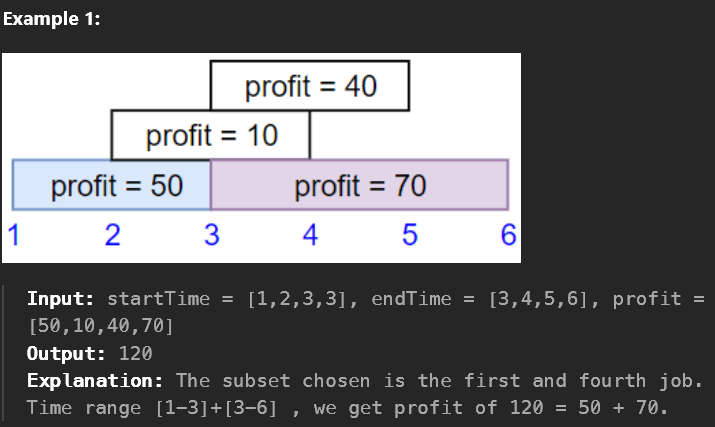

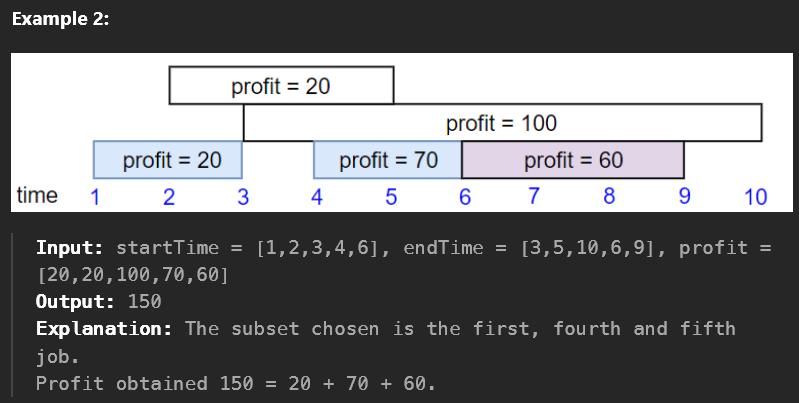

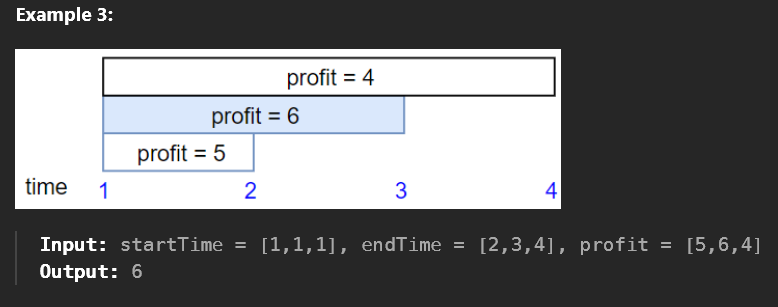

In [50]:
# I tried the same solution above (maximum earnings from taxi) 

In [62]:
from bisect import bisect_left
class Solution:
    def jobScheduling(self, startTime: List[int], endTime: List[int], profit: List[int]) -> int:
        
        jobs = []
        for i in range(len(startTime)):
            temp = []
            temp.append(startTime[i])
            temp.append(endTime[i])
            temp.append(profit[i])
            jobs.append(temp)

        
        jobs.sort()
        #print(jobs)
        n = len(jobs)
        dp = [0]*(n+1)
        start = [s for s,e,t in jobs]

        for i in range(n-1,-1,-1):
            nextIndex = bisect_left(start,jobs[i][1])
            dp[i] = max(dp[i+1], jobs[i][2] + dp[nextIndex])

        return dp[0]

In [63]:
Solution().jobScheduling([4,2,4,8,2], [5, 5, 5, 10, 8], [1,2,8,10,4])

18

#### Maximum Number of Events that can be Attended II

You are given an array of events where events[i] = [startDayi, endDayi, valuei]. The ith event starts at startDayi and ends at endDayi, and if you attend this event, you will receive a value of valuei. You are also given an integer k which represents the maximum number of events you can attend.

You can only attend one event at a time. If you choose to attend an event, you must attend the entire event. Note that the end day is inclusive: that is, you cannot attend two events where one of them starts and the other ends on the same day.

Return the maximum sum of values that you can receive by attending events.

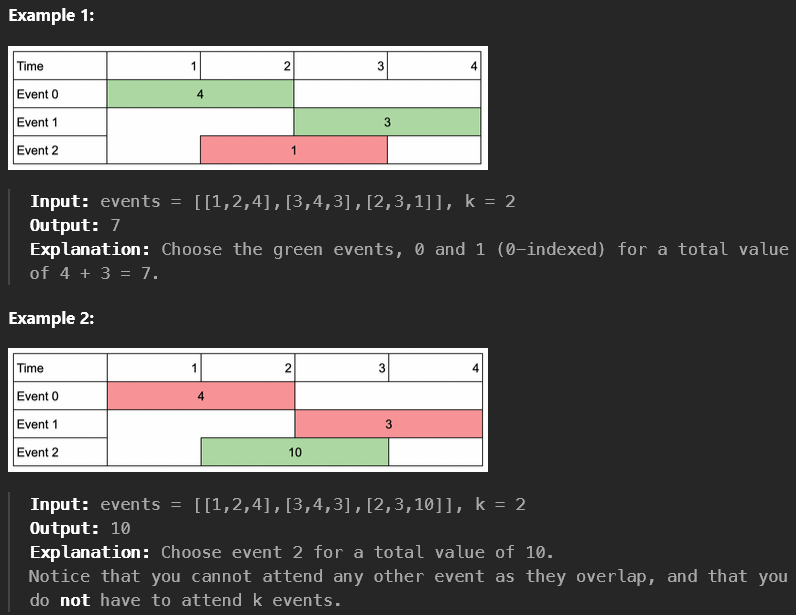

In [88]:
#Tried Bottom up approach , but because of constraint of k, top down works here like in stock case
class Solution:
    def maxValue(self, events: List[List[int]], k: int) -> int:
        events.sort()
        n = len(events)
        dp = [0]*(n+1)
        start = [s for s,e,t in events]

        for i in range(n-1,-1,-1):
            nextIndex = bisect_left(start,events[i][1]+1)
            #either you skip this or take this            
            dp[i] = max(dp[i+1], events[i][2] + dp[nextIndex])
        
        return dp[0]

In [89]:
Solution().maxValue([[1,2,4],[3,4,3],[2,3,10]],2)

10

Intuition
I have solved similar questions Maximum Earnings from Taxi and Maximum Profit in job scheduling

Approach
Sort the array rides
keep a separate array starts
n=len(events) 
dp(i) indicates the max profit we can get when we are at(NOT AT THE iTH point in the road)
At each step we can either attend the event or skip it. If we attend it we need to add the value, if you dont we dont.
Every time we attend the event we need to find the next VALID start point for us. Since we have sorted the array, we can use binary search for this. We simple search in the start array for the index that immediately follows the current end given by event[i][1]. nextIndex = bisect.bisect_left(start,event[i][1])
We then use the above mentioned recurrence relation. ans = max(profit + dp(nextIndex, remain), dp(i+1)), remain indicates the number of events more we can attend.
If we dont attend the event we simply go to i+1.

In [97]:
from functools import cache
class Solution:
    def maxValue(self, events: List[List[int]], k: int) -> int:
        @cache
        def dp(i, remain):
            if i == len(events) or remain == 0:
                return 0
            
            
            #skip
            ans = dp(i + 1, remain)  
            
            nextIndex = bisect_left(start,events[i][1]+1)
            ans = max(ans, events[i][2] + dp(nextIndex, remain-1))
            
            return ans
        events.sort()
        start = [s for s,e,t in events]
        return dp(0, k)

In [98]:
Solution().maxValue([[1,2,4],[3,4,3],[2,3,10]],2)

10

#### Two Best Non-overlapping events

You are given a 0-indexed 2D integer array of events where events[i] = [startTimei, endTimei, valuei]. The ith event starts at startTimei and ends at endTimei, and if you attend this event, you will receive a value of valuei. You can choose at most two non-overlapping events to attend such that the sum of their values is maximized.

Return this maximum sum.

Note that the start time and end time is inclusive: that is, you cannot attend two events where one of them starts and the other ends at the same time. More specifically, if you attend an event with end time t, the next event must start at or after t + 1.

In [1]:
from functools import cache
from bisect import bisect_left
from typing import List

class Solution:
    def maxTwoEvents(self, events: List[List[int]]) -> int:
        @cache
        def dp(i, remain):
            if ((i==len(events))|(remain==0)):
                return 0
            
            #skip
            ans = dp(i+1, remain)
            next_index = bisect_left(start, events[i][1]+1)
            return max(ans, events[i][2] + dp(next_index, remain-1))
        
        events.sort()
        start = [s for s, e, v in events]
        remain = 2
        return dp(0, remain)

#### Practice

You are planning to rob houses along a street. The ith house has nums[i] money. If you rob two houses beside each other, the alarm system will trigger and alert the police. What is the most money you can rob without alerting the police?

In [ ]:
#Watch Video
# the idea with dynamic programming is we are only considering a part of the input at any given time.

# These are our base cases
# suppose if you only have input at i= 0, you will rob it
# if you have 2 inputs at i = 0 and i = 1, you will rob max 


# nums = [2,7,9,3,1]
#what will the function return? -->max points collected upto i, What input will it take? -->index i 
#What is recurrence relation? -->  max(dp(i-1), cost[i] + dp(i-2))
#What is the base case? --> defined above

# if i=0 return max(nums[0], nums[1]), if you do this, its greedy approach becoz if you select 7 you will
# have to take 3 later on and max sum you will reach is 10.
# if i = 0, 
# if i =1, 

In [1]:
cost = [2,7,9,3,1]
def dp(i):
    if i==0: return cost[i]
    if i==1: return max(cost[:i+1])
    
    if i in mem:
        return mem[i] 
    
    mem[i] = max(dp(i-1), cost[i] + dp(i-2))
    
    return mem[i]

mem = {}
dp(len(cost)-1)

12

In [2]:
mem

{2: 11, 3: 11, 4: 12}

You are given an integer array cost where cost[i] is the cost of the ith step on a staircase. Once you pay the cost, you can either climb one or two steps. You can either start from the step with index 0, or the step with index 1. Return the minimum cost to reach the top of the floor (outside the array, not the last index of cost).

In [ ]:
# what will function return? what is its input? 
# what is recuurence relation? 
# what are base cases? if i = 0|i = 1, return 0

# now if your input is 3, you will directly take 2 steps from step 2
# if your input is 4, you will decide if you will take one step from i = 3 or two steps from i = 2.
# so min cost  = min(dp(i-1)+cost[i-1], dp(i-2)+cost[i-2]), where dp(i-1) is the cost of reaching the 
# (i-1)th step and dp(i-2) is the cost of reaching the (i-2)th step.


You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

In [4]:
# what will function return? what is its input? 
# what is recuurence relation? 
# what are base cases? i = 0, return 1, i = 1, either you take 1+1 steps of 2 steps together so 2 ways

# now if input is 3: you can take 1+1+1 or 2+1 or 1+2 so 3 ways
# recurrence relation is dp(i-1) + dp(i-2) where dp(i-1) denotes number of ways of reaching to (i-1)th step
# note: why are we not adding 1 here, its not adding unique pattern (think more on these lines)

Given an integer array nums, return the length of the longest strictly increasing subsequence.

How can we tell that this problem should be solved with DP? First, it asks for a maximum length. Second, whenever we decide to take an element as part of a subsequence, it changes the numbers that we can take in the future. If we have nums = [1, 2, 5, 3, 4] and iterate from left to right, how do we decide if we should take the 5 or not? If we take it, our length increases which is what we want, but then it stops us from taking the 3 and 4.

In [ ]:
#logic learnt here is very interesting:
# the idea with dynamic programming is we are only considering a part of the input at any given time.
# suppose if i = 0: return 1
# suppose if i = 1: return 2 if nums[1] > nums[0] else dont change count
# suppose if i  = 3: you start with i = 0, come all the way upto current element and increment only if you 
# find current element greater than any elemnt before current element

In [5]:
#see implementation below:

from functools import cache
class Solution:
    def lengthOfLIS(self, nums) -> int:
        @cache
        def dp(i):
            ans = 1 # Base case

            # Recurrence relation
            for j in range(i):
                if nums[i] > nums[j]:
                    ans = max(ans, dp(j) + 1)
            
            return ans

        return max(dp(i) for i in range(len(nums)))   

There are n children standing in a line. Each child is assigned a rating value given in the integer array ratings.

You are giving candies to these children subjected to the following requirements:

    Each child must have at least one candy.
    Children with a higher rating get more candies than their neighbors.

Return the minimum number of candies you need to have to distribute the candies to the children.

In [2]:

# Example 2:

# Input: ratings = [1,2,2], ratings  = [29,51,87,87,72,12]
# Output: 4
# Explanation: You can allocate to the first, second and third child with 1, 2, 1 candies respectively.
# The third child gets 1 candy because it satisfies the above two conditions.

In [3]:
# the idea with dynamic programming is we are only considering a part of the input at any given time.
# what will function return--> what is its input--> 
# what is recuurence relation-->
# what are base cases? i = 0, return 1, i = 1, if ratings[0]!ratings[1] ,return 2+1.

#now suppose i=2: 
# if ratings[2] > ratings[1]: dp(i-1)+1
# if ratings[2] <= ratings[1]: dp(i-1)-1, maintaining minimum of 1 candy
# for minimmum of 1 candy: if dp(i-1) = 1, then dp(i-1) +=1, dp(i) = 1
# the above update of dp(i-1) will shift the logical updates done before.
# We need to increment by 1 upto the point where ratings[i-x] >= ratings[i-x+1] and dp(i-x) >= dp(i-x+1) 





In [53]:
# ratings = [29,51,87,87,72,12]
ratings = [1,3,2,2,1]

mem = {}
def dp(i):
    #base case
    if i == 0:
        if ratings[i] > ratings[i+1]: return 2
        else: return 1
    
    prev = dp(i-1)
    if ratings[i] > ratings[i-1]: 
        mem[i] = prev + 1
    
    elif ratings[i] == ratings[i-1]:
        if prev > 1:
            mem[i] = prev -1
        else : mem[i] = 1
    
    else:
        if prev > 1:
            mem[i] = prev - 1
        else:            
            mem[i-1] += 1
            mem[i] = 1
            
            for j in range(i-2, -1, -1):
                if (ratings[j] >= ratings[j+1])  :
#                     mem[j] = mem[j+1]+1 
                    break 
                else:
                    mem[j] = mem[j+1]+1 
                
    return(mem[i])



total_candies = 0
for i in range(len(ratings)):
    mem[i] = dp(i)
for i, j in mem.items():
    total_candies += j    
mem, total_candies    

({0: 1, 1: 2, 2: 1, 3: 2, 4: 1}, 7)

In [ ]:
[29,51,87,87,72,12] = [1,2,3,2,2,1]

In [51]:
ratings = [1,2,87,87,87,2,1]
# ratings = [29,51,87,87,72,12]
# ratings = [1,3,2,2,1]
from functools import cache
class Solution:
    

    
    def candy(self, ratings) -> int:
        mem = {}

        @cache
        def dp(i):
            #base case
            if i == 0:
                if ratings[i] > ratings[i+1]: return 2
                else: return 1
            
            prev = dp(i-1)
            if ratings[i] > ratings[i-1]: 
                mem[i] = prev + 1
            
            elif ratings[i] == ratings[i-1]:
                if prev > 1:
                    mem[i] = prev -1
                else : mem[i] = 1
            
            else:
                if prev > 1:
                    mem[i] = prev - 1
                else:            
                    mem[i-1] += 1
                    mem[i] = 1
                    
                    for j in range(i-2, -1, -1):
                        if (ratings[j] > ratings[j+1]) :
                            mem[j] = max(mem[j], mem[j+1]+1)
#                             mem[j] = mem[j+1]+1 
                        
            return(mem[i])


        total_candies = 0
        for i in range(len(ratings)):
            mem[i] = dp(i)
        for i, j in mem.items():
            total_candies += j
        
        return total_candies

In [52]:
Solution().candy(ratings)

14

You are given an integer array coins representing coins of different denominations and an integer amount representing a total amount of money.

Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

You may assume that you have an infinite number of each kind of coin.
